<a href="https://colab.research.google.com/github/AdrianaCaetano/MasterProject/blob/main/rideshare_complete_file_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rideshare Project - Complete Class Enrollemnt Data Set Analysis
by Adriana Caetano

Fall/2022

Check Google Colab GPU Connection

In [ ]:
# Check what GPU you've been assigned at any time by executing the following cell

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Nov 10 00:31:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get class enrollment information



The file used is generated by the CSUSM system, compiled by class enrollment for the Spring 2022 term. It contains the enrolled students with some generic profile information for each student, such as gender, age, college, and zip code. We assume all out of state /international students would move to campus or close to school, so these zip codes were deleted in the original file.

Upload file

In [ ]:
# save file into Pandas dataframe
import pandas as pd

# Get complete file with all students enrolled in Spring 2022 term
file_path= '/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/Spring_2022_class_enrollment.xlsx'

classes_df = pd.read_excel(file_path)
print("done")

done


In [ ]:
# Take a look at the data

classes_df.sample(5)

Unique ID  Term Session Subject Catalog Section Meeting Pattern  \
8352        2759  2222       1    KINE     426       2              TR   
27112       8544  2222       1    CHEM     160       2             MWF   
17796       5773  2222       1    WGSS     380       1               W   
6257        2109  2222       1     AMD     120       1              TR   
20513       6625  2222       1    MATH     270       2             MWF   

      Start Time  End Time      Postal Gender  Age Acad Level   Acad Plan  \
8352    14:30:00  15:45:00  92587-9690      M   22     Junior  COMMXXXBBA   
27112   09:30:00  10:20:00  92078-5359      F   19     Junior  KINEHS-BBS   
17796   17:30:00  20:20:00  92083-5804      M   31     Junior  SOC-STNBBA   
6257    14:30:00  15:45:00       37397      F   22     Senior  CRIMXXXBBA   
20513   11:30:00  12:20:00       92078      M   22     Senior  CS--XXXBBS   

                               Descr College  
8352                Communication BA  CHABSS  
27112  Kinesiology - Health Scien BS   CEHHS  
17796        Sociology - Standard BA  CHABSS  
6257       Crim & Justice Studies BA  CHABSS  
20513     Computer Science CS Opt BS   CSTEM

Understanding the class dataset encoding



---



1. Meeting Pattern Codes:

        Monday:     M
        Tuesday:    T
        Wednesday:  W
        Thrusday:   R
        Friday:     F
        Saturday:   S

2. Term 2222: Spring 2022

3. Session:

        Regular Academic Session:       1
        Eight Week - First:           8W1
        Eight Week - Second:          8W2
        Five Week - First:            5W1
        Five Week - Second:           5W2
        Five Week - Third:            5W3
        EL 10 Week Summer:            E10
        EL 1st 8 Weeks:               E81
        EL 2nd 8 Weeks:               E82
        Winter Intersession Ext Lrn:  EIS
        EL Contract:                  ELC
        El Nonstandard:               ENS
        EL Exempt 1st 8:              ES3
        EL Exempt 2nd 8:              ES4
        EL Exempt:                    ESN
        EL Reg Acad Ses:              ESS
        EL Nonstandard 15 Weeks:      ENN

4. Colleges:

    CEHHS: College of Education and Human Health Services
        Education
        Nursing
        Kinesiology
        Public Health
        Social Work
        Speech and Language Pathology
        Human Development

    CHABSS: College of Humanities, Arts, Behavioral and Social Sciences
        American Indian Studies
        Anthropology
        Art, Media, and Design
        Child and Adolescent Development
        Communication
        Criminilogy and Justice
        Economics
        Geography
        Global Studies
        History
        Liberal Studies
        Linguistics
        Literature and Writing Studies
        Media Studies
        Political Science
        Psychological Science
        Social Sciences
        Sociology
        Theater Arts
        Women's, Gender, and Sexuality Studies
        Spanish

    COBA: College of Business Administration
        Business Analytics
        Business Administration and Management
        MBA
        Accounting
        Finance
        Global Business
        Global Suply Chain Management
        Management Information Systems
        Marketing

    CSTEM: College of Science, Technology, Engineering, and Mathematics
        Biological Sciences
        Biotechnology
        Chemistry
        Biochemistry
        Computer Science
        Software Engineering
        Electrical Engineering
        Mathematics
        Physics

    UNDECLARED: Undeclared major





Class Profile

In [ ]:
# Assess how many distinct values are in each column
classes_df.nunique()

Unique ID          10292
Term                   1
Session                9
Subject               73
Catalog              306
Section               86
Meeting Pattern       12
Start Time            31
End Time              59
Postal              5674
Gender                 4
Age                   49
Acad Level             6
Acad Plan            146
Descr                145
College                5
dtype: int64

In [ ]:
classes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33417 entries, 0 to 33416
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unique ID        33417 non-null  int64 
 1   Term             33417 non-null  int64 
 2   Session          33417 non-null  object
 3   Subject          33417 non-null  object
 4   Catalog          33417 non-null  object
 5   Section          33417 non-null  object
 6   Meeting Pattern  33417 non-null  object
 7   Start Time       33417 non-null  object
 8   End Time         33417 non-null  object
 9   Postal           33090 non-null  object
 10  Gender           33417 non-null  object
 11  Age              33417 non-null  int64 
 12  Acad Level       33417 non-null  object
 13  Acad Plan        33417 non-null  object
 14  Descr            33417 non-null  object
 15  College          33417 non-null  object
dtypes: int64(3), object(13)
memory usage: 4.1+ MB


In [ ]:
classes_df['Gender'].unique()

array(['F', 'M', 'N', 'U'], dtype=object)

In [ ]:
# Classes attendance gender ratio 
from matplotlib import pyplot as plt

def gender_pie_plot(df, title):

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = df['Gender'].unique()
    gender_count = df['Gender'].value_counts()
    print(gender_count, '\n')

    fig1, ax1 = plt.subplots()
    ax1.pie(gender_count, labels=labels, autopct='%1.1f%%')
    ax1.set(aspect='equal', title=title)  # Equal aspect ratio ensures that pie is drawn as a circle.
    

    plt.show()


F    19063
M    14321
N       28
U        5
Name: Gender, dtype: int64 



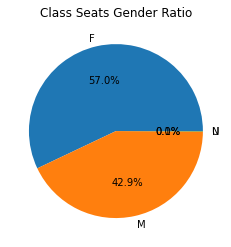

In [ ]:

gender_pie_plot(classes_df, 'Class Seats Gender Ratio')

In [ ]:
classes_df['Acad Level'].unique()

array(['Graduate', 'Senior', 'Post-Bacc', 'Junior', 'Freshman',
       'Sophomore'], dtype=object)

Text(0, 0.5, 'Seats Count')

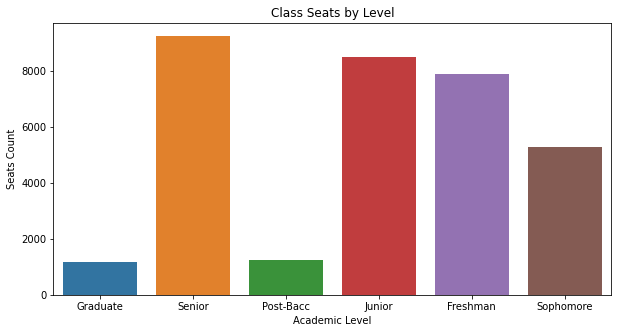

In [ ]:
# Classes offering by academic level

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=classes_df, x="Acad Level")
plt.title('Class Seats by Level')
plt.xlabel('Academic Level')
plt.ylabel('Seats Count')


There are more Seniors and Juniors than Freshmen and Sophmores. This reflects the impact in enrollment of the Covid pandemic.

In [ ]:
classes_df['College'].unique()

array(['CHABSS', 'CEHHS', 'COBA', 'CSTEM', 'UNDECLARED'], dtype=object)

Text(0, 0.5, 'Seats Count')

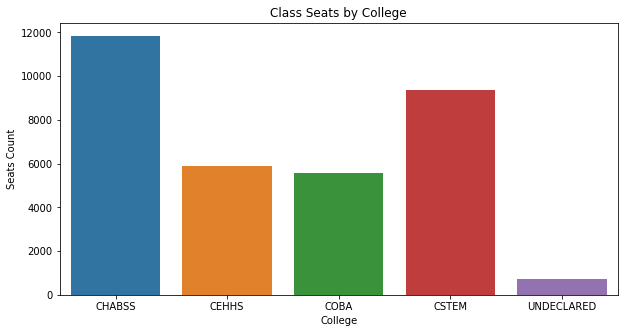

In [ ]:
# Classes offering by College

plt.figure(figsize=(10, 5))
sns.countplot(data=classes_df, x="College")
plt.title('Class Seats by College')
plt.xlabel('College')
plt.ylabel('Seats Count')

Text(0, 0.5, 'Seats Count')

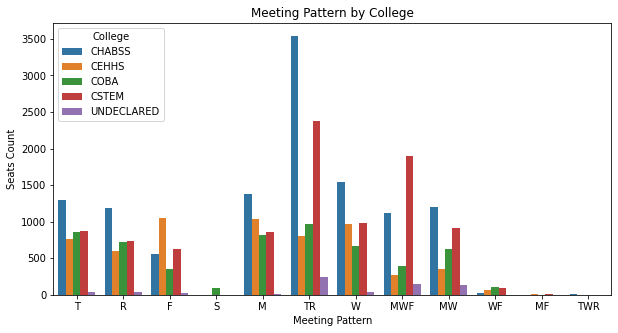

In [ ]:
# Class Seats Pattern by College

# Bar Plot 
plt.figure(figsize=(10, 5))
sns.countplot(data=classes_df, x="Meeting Pattern", hue="College")
plt.title('Meeting Pattern by College')
plt.xlabel('Meeting Pattern')
plt.ylabel('Seats Count')


In [ ]:
classes_df['Session'].unique()

array([1, '5W1', '5W3', 'ESS', 'E82', 'E81', '8W1', 'ES3', '8W2'],
      dtype=object)

Find how many students are enrolled in classes with different terms

In [ ]:
# ESS and 1 = Full term
# E81 and 8W1 = First 8 week
# 8W2, ES3 and E82 = Second 8 week
# 5W1 = First 5 week
# 5W3 = Third 5 week

by_session_df = classes_df[['Unique ID', 'Session']].copy()
print("by_session_df from classes_df")
print(by_session_df.info())
print(by_session_df.shape)

# dictionary to save students' different sessions
st_dict = dict()
i = 0
for row in by_session_df.itertuples():
    #print(row)
    id = row[1] # get ID

    # check if dictionary is empty or if student is not in the dictionary
    if (len(st_dict)== 0) or (id not in st_dict.keys() ) :
        st_dict[id] = { 'ID' : row[1] , 'Sessions': [row[2]] }

    else:
        # Student is already in the dict, add the different session 
        st_dict[id]['Sessions'].append(row[2])
        #st_dict[id]['Session'] += row[2]
        
# save dict as dataframe
by_session_df = pd.DataFrame(st_dict)
by_session_df = by_session_df.T

print("by_session_df from st_dict")
print(by_session_df.info())
print(by_session_df.shape)

by_session_df from classes_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33417 entries, 0 to 33416
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Unique ID  33417 non-null  int64 
 1   Session    33417 non-null  object
dtypes: int64(1), object(1)
memory usage: 522.3+ KB
None
(33417, 2)
by_session_df from st_dict
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10292 entries, 1 to 10292
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        10292 non-null  object
 1   Sessions  10292 non-null  object
dtypes: object(2)
memory usage: 241.2+ KB
None
(10292, 2)


Of 33417 entries (class seats) offered this semester in different sessions, there are 10292 students

In [ ]:
# Group Students with Diferent Sessions
mult_sessions_df = pd.DataFrame()
for row in by_session_df.itertuples():
    #print(row)
    id = str(row[1]) # get ID
    sessions_lst = row[2] # get sessions
    session_set = set(sessions_lst) # only unique values
    if (len(session_set) > 1):
        session = [str(x) for x in session_set] # save elements as a str
        session_str = ', '.join(session)
        new_row = {'ID':id, 'Sessions': str(session_str) }
        mult_sessions_df = mult_sessions_df.append(new_row, ignore_index=True) # append only multiple sessions 

print('\nStudents enrolled in Multiple Sessions:\n', mult_sessions_df.sample(5))
print(mult_sessions_df.shape)
print(mult_sessions_df.info())


Students enrolled in Multiple Sessions:
         ID     Sessions
239  10249       1, ESS
81    3305     E82, E81
125   5703  1, 8W2, 8W1
158   7321  1, 8W2, 8W1
254  10274       1, ESS
(258, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        258 non-null    object
 1   Sessions  258 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB
None


Only 258 students are enrolled in classes with different sessions 

In [ ]:
# Do not count students enrolled in ESS and 1 (both are full term sessions)
count = mult_sessions_df.groupby("Sessions")["Sessions"].count()
print(count)
print(mult_sessions_df.shape)

Sessions
1, 5W3            2
1, 5W3, 5W1      13
1, 8W1           34
1, 8W2            8
1, 8W2, 8W1      26
1, ESS           42
8W2, 8W1          1
E81, ES3          1
E82, E81         89
E82, E81, ES3     7
E82, E81, ESS    17
E82, ESS         18
Name: Sessions, dtype: int64
(258, 2)


In [ ]:
# Don not consider the 42 students enrolled in ESS and 1 session classes (FULL TERM)

mult_sessions_df.drop( mult_sessions_df[ mult_sessions_df["Sessions"]=='1, ESS'].index, inplace=True)
mult_sessions_df.drop( mult_sessions_df[ mult_sessions_df["Sessions"]=='ESS, 1'].index, inplace=True)
count = mult_sessions_df.groupby("Sessions")["Sessions"].count()

print(count)
print(mult_sessions_df.shape)

Sessions
1, 5W3            2
1, 5W3, 5W1      13
1, 8W1           34
1, 8W2            8
1, 8W2, 8W1      26
8W2, 8W1          1
E81, ES3          1
E82, E81         89
E82, E81, ES3     7
E82, E81, ESS    17
E82, ESS         18
Name: Sessions, dtype: int64
(216, 2)


Only 216 students are enrolled in different length sessions with a combination of differnt short term or full term with short term. 

Total Number of Students with Multiple Sessions: 216


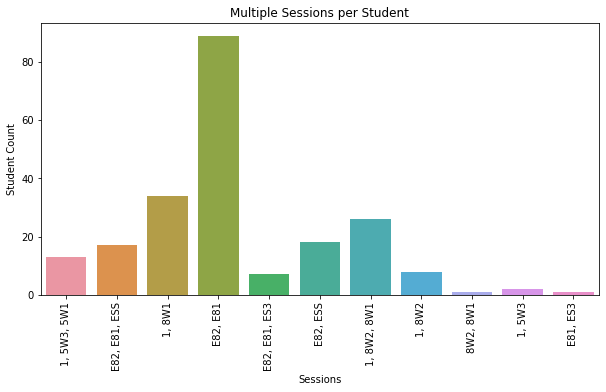

In [ ]:
# Plot the multiple sessions students are taking this term

plt.figure(figsize=(10, 5))
sns.countplot(data=mult_sessions_df, x="Sessions")
plt.xticks(rotation=90)
plt.title('Multiple Sessions per Student')
plt.xlabel('Sessions')
plt.ylabel('Student Count')

#Save who are the students with multiple sessions into a list for future reference
st_mult_sess_lst = mult_sessions_df['ID'].to_list()
#print(st_mult_sess_lst)
print('Total Number of Students with Multiple Sessions:', len(st_mult_sess_lst))

## Get Students' Schedule Based on Class Enrollment



We need to combine the class data by student because we are interested in the arrival and departure times from campus for each day of the week. 

Important fields for the Rideshare Matching:

    Unique ID: student identifier
    Meeting Pattern: which days students need to be in campus
    Start time: begining of the class
    End time: end of the class
    Postal: zip code of residency, origin of the trip 
    Gender: Female, Male, Non-binary
    Age: ranges from 17 to 74 years old
    Acad Level: bachelor year, graduate, or post bac
    College: CEHHS, CHABSS, COBA, CSTEM, Undeclared



In [ ]:
classes_df.columns

Index(['Unique ID', 'Term', 'Session', 'Subject', 'Catalog', 'Section',
       'Meeting Pattern', 'Start Time', 'End Time', 'Postal', 'Gender', 'Age',
       'Acad Level', 'Acad Plan', 'Descr', 'College'],
      dtype='object')

In [ ]:
# rename columns
classes_df = classes_df.rename(columns={"Unique ID": "Unique_ID"})

In [ ]:
print(classes_df.shape)
print(classes_df.info())

(33417, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33417 entries, 0 to 33416
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unique_ID        33417 non-null  int64 
 1   Term             33417 non-null  int64 
 2   Session          33417 non-null  object
 3   Subject          33417 non-null  object
 4   Catalog          33417 non-null  object
 5   Section          33417 non-null  object
 6   Meeting Pattern  33417 non-null  object
 7   Start Time       33417 non-null  object
 8   End Time         33417 non-null  object
 9   Postal           33090 non-null  object
 10  Gender           33417 non-null  object
 11  Age              33417 non-null  int64 
 12  Acad Level       33417 non-null  object
 13  Acad Plan        33417 non-null  object
 14  Descr            33417 non-null  object
 15  College          33417 non-null  object
dtypes: int64(3), object(13)
memory usage: 4.1+ MB
None


There are 327 entries without postal code

In [ ]:
# Drop student row with no zip code
classes_df.dropna(
    axis=0,
    how='any',
    inplace=True
)

In [ ]:
print(classes_df.shape)
print(classes_df.info())

(33090, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33090 entries, 0 to 33416
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unique_ID        33090 non-null  int64 
 1   Term             33090 non-null  int64 
 2   Session          33090 non-null  object
 3   Subject          33090 non-null  object
 4   Catalog          33090 non-null  object
 5   Section          33090 non-null  object
 6   Meeting Pattern  33090 non-null  object
 7   Start Time       33090 non-null  object
 8   End Time         33090 non-null  object
 9   Postal           33090 non-null  object
 10  Gender           33090 non-null  object
 11  Age              33090 non-null  int64 
 12  Acad Level       33090 non-null  object
 13  Acad Plan        33090 non-null  object
 14  Descr            33090 non-null  object
 15  College          33090 non-null  object
dtypes: int64(3), object(13)
memory usage: 4.3+ MB
None


Keep Students with Single Session Enrollment Only (dropping multiple)

In [ ]:
# drop rows that contain any student in the list with multiple session enrollment
test_df = classes_df[classes_df.Unique_ID.isin(st_mult_sess_lst) == False]

In [ ]:
print(test_df.shape)
print(test_df.info())

(33090, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33090 entries, 0 to 33416
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unique_ID        33090 non-null  int64 
 1   Term             33090 non-null  int64 
 2   Session          33090 non-null  object
 3   Subject          33090 non-null  object
 4   Catalog          33090 non-null  object
 5   Section          33090 non-null  object
 6   Meeting Pattern  33090 non-null  object
 7   Start Time       33090 non-null  object
 8   End Time         33090 non-null  object
 9   Postal           33090 non-null  object
 10  Gender           33090 non-null  object
 11  Age              33090 non-null  int64 
 12  Acad Level       33090 non-null  object
 13  Acad Plan        33090 non-null  object
 14  Descr            33090 non-null  object
 15  College          33090 non-null  object
dtypes: int64(3), object(13)
memory usage: 4.3+ MB
None


Keep students enrolled in full term (1, and ESS sessions)

In [ ]:
# Separate Classes by Session
full_term_df = test_df[['Unique_ID', 'Session',
       'Meeting Pattern', 'Start Time', 'End Time', 'Postal', 'Gender', 'Age',
       'Acad Level', 'College']].copy()

full_term = [1, 'ESS']
full_term_df = full_term_df[full_term_df.Session.isin(full_term) == True]
print(full_term_df.shape)
print(full_term_df.info())

(32194, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32194 entries, 0 to 33416
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unique_ID        32194 non-null  int64 
 1   Session          32194 non-null  object
 2   Meeting Pattern  32194 non-null  object
 3   Start Time       32194 non-null  object
 4   End Time         32194 non-null  object
 5   Postal           32194 non-null  object
 6   Gender           32194 non-null  object
 7   Age              32194 non-null  int64 
 8   Acad Level       32194 non-null  object
 9   College          32194 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.7+ MB
None


Organize the 32194 entries by student ID with arrival and departure of each weekday

Create students_df

In [ ]:
from datetime import datetime, time, timedelta
#import time as t

# Compute the execution time to get students data from classes data
start_time = datetime.now() # store the execution start time

# Create a dictionary for students
students_dict = dict()

#print("Empty dict:", students_dict)

# Read each row of the table to combine same student information
for ind in full_term_df.index:
    # print("Index: ", ind)
    st_id = full_term_df['Unique_ID'][ind]
    # check if students dictionary is empty or if student is not in the dictionary
    if (len(students_dict)== 0) or (st_id not in students_dict.keys()) :
        # read row information to add student
        students_dict[st_id] = { 'ID' : st_id, 'Zip' : full_term_df['Postal'][ind],
                            'Gender' : full_term_df['Gender'][ind], 'Age' : full_term_df['Age'][ind],
                            'Level' : full_term_df['Acad Level'][ind], 'College' : full_term_df['College'][ind]
                            }
        # check the 'Meeting Pattern' to add arrival and departure for each day of the week
        # Monday class
        if 'M' in full_term_df['Meeting Pattern'][ind]: 
            students_dict[st_id]['M_arr'] = full_term_df['Start Time'][ind]
            students_dict[st_id]['M_dep'] = full_term_df['End Time'][ind]
        else:  # keep schedule empty for now
            students_dict[st_id]['M_arr'] = time()
            students_dict[st_id]['M_dep'] = time()
        # Tuesday class
        if 'T' in full_term_df['Meeting Pattern'][ind]: 
            students_dict[st_id]['T_arr'] = full_term_df['Start Time'][ind]
            students_dict[st_id]['T_dep'] = full_term_df['End Time'][ind]
        else: 
            students_dict[st_id]['T_arr'] = time()
            students_dict[st_id]['T_dep'] = time()
        # Wednesday class
        if 'W' in full_term_df['Meeting Pattern'][ind]: 
            students_dict[st_id]['W_arr'] = full_term_df['Start Time'][ind]
            students_dict[st_id]['W_dep'] = full_term_df['End Time'][ind]
        else: 
            students_dict[st_id]['W_arr'] = time()
            students_dict[st_id]['W_dep'] = time()
        # Thursday class
        if 'R' in full_term_df['Meeting Pattern'][ind]: 
            students_dict[st_id]['R_arr'] = full_term_df['Start Time'][ind]
            students_dict[st_id]['R_dep'] = full_term_df['End Time'][ind]
        else: 
            students_dict[st_id]['R_arr'] = time()
            students_dict[st_id]['R_dep'] = time()
        # Friday class
        if 'F' in full_term_df['Meeting Pattern'][ind]: 
            students_dict[st_id]['F_arr'] = full_term_df['Start Time'][ind]
            students_dict[st_id]['F_dep'] = full_term_df['End Time'][ind]
        else: 
            students_dict[st_id]['F_arr'] = time()
            students_dict[st_id]['F_dep'] = time()
        # Saturday class
        if 'S' in full_term_df['Meeting Pattern'][ind]: 
            students_dict[st_id]['S_arr'] = full_term_df['Start Time'][ind]
            students_dict[st_id]['S_dep'] = full_term_df['End Time'][ind]
        else: 
            students_dict[st_id]['S_arr'] = time()
            students_dict[st_id]['S_dep'] = time()

        #print("Student ", st_id, ": ", students_dict[st_id])

    else: # student is already saved into dictionary
        # update their schedule for the earliest arrival and latest departure of each day
        # Monday class
        if 'M' in full_term_df['Meeting Pattern'][ind]: 
            # check if this class starts before or ends after of saved in schedule
            if students_dict[st_id]['M_arr']  == time() or full_term_df['Start Time'][ind] < students_dict[st_id]['M_arr']:
                students_dict[st_id]['M_arr'] = full_term_df['Start Time'][ind] # update arrival time
            if students_dict[st_id]['M_dep'] == time() or full_term_df['End Time'][ind] > students_dict[st_id]['M_dep']:
                students_dict[st_id]['M_dep'] = full_term_df['End Time'][ind] # update departure time
        # Tuesday class
        if 'T' in full_term_df['Meeting Pattern'][ind]: 
            # check if this class starts before or ends after of saved in schedule
            if students_dict[st_id]['T_arr'] == time() or full_term_df['Start Time'][ind] < students_dict[st_id]['T_arr']:
                students_dict[st_id]['T_arr'] = full_term_df['Start Time'][ind] # update arrival time
            if students_dict[st_id]['T_dep'] == time() or full_term_df['End Time'][ind] > students_dict[st_id]['T_dep']:
                students_dict[st_id]['T_dep'] = full_term_df['End Time'][ind] # update departure time
       # Wednesday class
        if 'W' in full_term_df['Meeting Pattern'][ind]: 
            # check if this class starts before or ends after of what is saved in schedule
            if students_dict[st_id]['W_arr'] == time() or full_term_df['Start Time'][ind] < students_dict[st_id]['W_arr']:
                students_dict[st_id]['W_arr'] = full_term_df['Start Time'][ind] # update arrival time
            if students_dict[st_id]['W_dep'] == time() or full_term_df['End Time'][ind] > students_dict[st_id]['W_dep']:
                students_dict[st_id]['W_dep'] = full_term_df['End Time'][ind] # update departure time
        # Thursday class
        if 'R' in full_term_df['Meeting Pattern'][ind]: 
            # check if this class starts before or ends after of saved in schedule
            if students_dict[st_id]['R_arr'] == time() or full_term_df['Start Time'][ind] < students_dict[st_id]['R_arr']:
                students_dict[st_id]['R_arr'] = full_term_df['Start Time'][ind] # update arrival time
            if students_dict[st_id]['R_dep'] == time() or full_term_df['End Time'][ind] > students_dict[st_id]['R_dep']:
                students_dict[st_id]['R_dep'] = full_term_df['End Time'][ind] # update departure time
        # Friday class
        if 'F' in full_term_df['Meeting Pattern'][ind]: 
            # check if this class starts before or ends after of saved in schedule
            if students_dict[st_id]['F_arr'] == time() or full_term_df['Start Time'][ind] < students_dict[st_id]['F_arr']:
                students_dict[st_id]['F_arr'] = full_term_df['Start Time'][ind] # update arrival time
            if students_dict[st_id]['F_dep'] == time() or full_term_df['End Time'][ind] > students_dict[st_id]['F_dep']:
                students_dict[st_id]['F_dep'] = full_term_df['End Time'][ind] # update departure time
        # Saturday class
        if 'S' in full_term_df['Meeting Pattern'][ind]: 
            # check if this class starts before or ends after of saved in schedule
            if students_dict[st_id]['S_arr'] == time() or full_term_df['Start Time'][ind] < students_dict[st_id]['S_arr']:
                students_dict[st_id]['S_arr'] = full_term_df['Start Time'][ind] # update arrival time
            if students_dict[st_id]['S_dep'] == time() or full_term_df['End Time'][ind] > students_dict[st_id]['S_dep']:
                students_dict[st_id]['S_dep'] = full_term_df['End Time'][ind] # update departure time
        
        #print("Updated Student ", st_id, ": ", students_dict[st_id])

end_time = datetime.now() # store execution end time
elapsed_time = end_time - start_time 


# print("All students:\n", students_dict)
print("Sample Student:\n", next(iter(students_dict.items())))
print("Done in %.3f seconds" % elapsed_time.seconds)

Sample Student:
 (1, {'ID': 1, 'Zip': 92054, 'Gender': 'F', 'Age': 39, 'Level': 'Graduate', 'College': 'CHABSS', 'M_arr': datetime.time(0, 0), 'M_dep': datetime.time(0, 0), 'T_arr': datetime.time(17, 30), 'T_dep': datetime.time(20, 20), 'W_arr': datetime.time(0, 0), 'W_dep': datetime.time(0, 0), 'R_arr': datetime.time(0, 0), 'R_dep': datetime.time(0, 0), 'F_arr': datetime.time(0, 0), 'F_dep': datetime.time(0, 0), 'S_arr': datetime.time(0, 0), 'S_dep': datetime.time(0, 0)})
Done in 2.000 seconds


In [ ]:
# Create a dataframe for students from dictionary

reformed_dict = {}
for outerKey, innerDict in students_dict.items():
        reformed_dict[outerKey] = innerDict
# print(reformed_dict)

students_df = pd.DataFrame(reformed_dict)

students_df = students_df.T
students_df.head()

ID         Zip Gender Age      Level College     M_arr     M_dep     T_arr  \
1  1       92054      F  39   Graduate  CHABSS  00:00:00  00:00:00  17:30:00   
2  2  92078-4575      F  66     Senior   CEHHS  00:00:00  00:00:00  00:00:00   
3  3  92008-3208      F  53   Graduate    COBA  00:00:00  00:00:00  00:00:00   
4  4  92069-7387      F  46  Post-Bacc   CEHHS  07:30:00  17:20:00  00:00:00   
5  5       92012      F  50     Senior  CHABSS  00:00:00  00:00:00  14:30:00   

      T_dep     W_arr     W_dep     R_arr     R_dep     F_arr     F_dep  \
1  20:20:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   
2  00:00:00  00:00:00  00:00:00  14:30:00  17:20:00  09:30:00  12:20:00   
3  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   
4  00:00:00  00:00:00  00:00:00  19:00:00  20:50:00  00:00:00  00:00:00   
5  15:45:00  00:00:00  00:00:00  14:30:00  15:45:00  00:00:00  00:00:00   

      S_arr     S_dep  
1  00:00:00  00:00:00  
2  00:00:00  00:00:00  
3  09:00:00  15:15:00  
4  00:00:00  00:00:00  
5  00:00:00  00:00:00

In [ ]:
students_df.shape

(10102, 18)

In [ ]:
students_df.tail()

ID       Zip Gender Age     Level     College     M_arr     M_dep  \
10288  10288     96022      M  22  Freshman  UNDECLARED  00:00:00  00:00:00   
10289  10289     92111      M  23  Freshman  UNDECLARED  00:00:00  00:00:00   
10290  10290     92115      M  24  Freshman  UNDECLARED  00:00:00  00:00:00   
10291  10291  810-0034      M  18  Freshman  UNDECLARED  13:00:00  14:15:00   
10292  10292     92009      F  17  Freshman  UNDECLARED  17:30:00  20:20:00   

          T_arr     T_dep     W_arr     W_dep     R_arr     R_dep     F_arr  \
10288  10:30:00  11:45:00  00:00:00  00:00:00  10:30:00  11:45:00  00:00:00   
10289  10:30:00  11:45:00  00:00:00  00:00:00  10:30:00  11:45:00  00:00:00   
10290  10:30:00  11:45:00  00:00:00  00:00:00  10:30:00  11:45:00  00:00:00   
10291  09:00:00  14:15:00  13:00:00  14:15:00  09:00:00  14:15:00  00:00:00   
10292  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   

          F_dep     S_arr     S_dep  
10288  00:00:00  00:00:00  00:00:00  
10289  00:00:00  00:00:00  00:00:00  
10290  00:00:00  00:00:00  00:00:00  
10291  00:00:00  00:00:00  00:00:00  
10292  00:00:00  00:00:00  00:00:00

## Save df as csv file helper functions

In [ ]:
#Save students df as a csv file into Google Drive
from datetime import date

def upload_csv_to_gdrive(df, file_name):
    ''' Upload the dataframe content as a csv file to Google Drive''' 

    path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/'
    file_path = path + file_name
    df.to_csv(file_path, index=False)

    print('Uploaded to Google Drive on', date.today())
    

In [ ]:
upload_csv_to_gdrive(students_df, 'Spring_2022_Students.csv') 

Uploaded to Google Drive on 2022-11-13


In [ ]:
# Download locally
from google.colab import files
from datetime import date

def download_as_csv(df, file_name):
    ''' Download locally a csv file created with a dataframe content'''

    df.to_csv(file_name)
    files.download(file_name)
    print('Downloaded on', date.today())

In [ ]:
download_as_csv(students_df, 'Spring_2022_Students.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-13


## Understanding the Student Data

Retrieve the data from the file

In [ ]:
import pandas as pd

students_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/Spring_2022_Students.csv')
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10102 entries, 0 to 10101
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10102 non-null  int64 
 1   ID          10102 non-null  int64 
 2   Zip         10102 non-null  object
 3   Gender      10102 non-null  object
 4   Age         10102 non-null  int64 
 5   Level       10102 non-null  object
 6   College     10102 non-null  object
 7   M_arr       10102 non-null  object
 8   M_dep       10102 non-null  object
 9   T_arr       10102 non-null  object
 10  T_dep       10102 non-null  object
 11  W_arr       10102 non-null  object
 12  W_dep       10102 non-null  object
 13  R_arr       10102 non-null  object
 14  R_dep       10102 non-null  object
 15  F_arr       10102 non-null  object
 16  F_dep       10102 non-null  object
 17  S_arr       10102 non-null  object
 18  S_dep       10102 non-null  object
dtypes: int64(3), object(16)
memory usage: 1.5+ MB


In [ ]:
# Delete column "unnamed" 
students_df.drop(columns='Unnamed: 0', inplace=True)
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10102 entries, 0 to 10101
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       10102 non-null  int64 
 1   Zip      10102 non-null  object
 2   Gender   10102 non-null  object
 3   Age      10102 non-null  int64 
 4   Level    10102 non-null  object
 5   College  10102 non-null  object
 6   M_arr    10102 non-null  object
 7   M_dep    10102 non-null  object
 8   T_arr    10102 non-null  object
 9   T_dep    10102 non-null  object
 10  W_arr    10102 non-null  object
 11  W_dep    10102 non-null  object
 12  R_arr    10102 non-null  object
 13  R_dep    10102 non-null  object
 14  F_arr    10102 non-null  object
 15  F_dep    10102 non-null  object
 16  S_arr    10102 non-null  object
 17  S_dep    10102 non-null  object
dtypes: int64(2), object(16)
memory usage: 1.4+ MB


Student Profile Analysis

F    5989
M    4104
N       9
Name: Gender, dtype: int64 



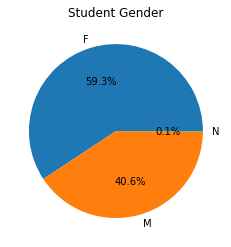

In [ ]:
gender_pie_plot(students_df, 'Student Gender')

Almost 60% of the students enrolled during Spring 22 are Female

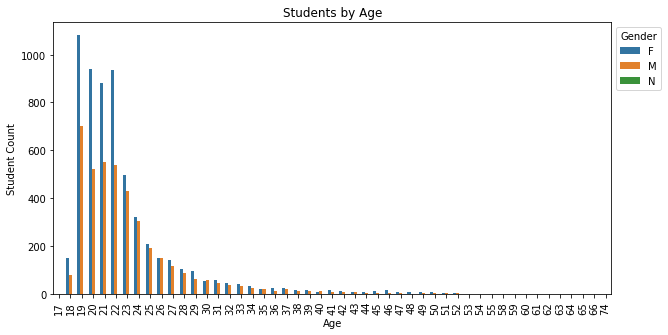

In [ ]:
import seaborn as sns

# use a dictionary to convert specific columns
convert_dict = {'Age': int , 'Zip' : str }
students_df = students_df.astype(convert_dict)

# Bar Plot Age by Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=students_df, x="Age", hue="Gender")
plt.xticks(rotation=90)
plt.title('Students by Age')
plt.xlabel('Age')
plt.ylabel('Student Count')
plt.legend(title = 'Gender', bbox_to_anchor = (1, 1)) # move legend outside


Text(0, 0.5, 'Student Count')

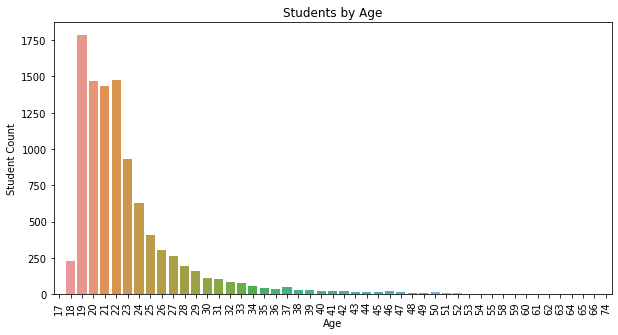

In [ ]:
# Bar Plot Age
plt.figure(figsize=(10, 5))
sns.countplot(data=students_df, x="Age", )# hue="Gender", dodge=False)
plt.xticks(rotation=90)
plt.title('Students by Age')
plt.xlabel('Age')
plt.ylabel('Student Count')
#plt.legend(title = 'Gender', bbox_to_anchor = (1, 1)) # move legend outside

In [ ]:
students_df['Age'].describe()

count    10102.000000
mean        22.962978
std          5.159376
min         17.000000
25%         20.000000
50%         22.000000
75%         24.000000
max         74.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Student Count')

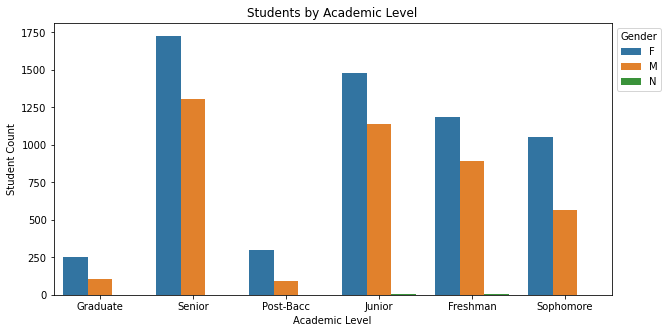

In [ ]:
# Bar Plot Gender by Level

plt.figure(figsize=(10, 5))
sns.countplot(data=students_df, x="Level", hue="Gender")
plt.legend(title = 'Gender', bbox_to_anchor = (1, 1))
plt.title('Students by Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Student Count')

In [ ]:
students_df.groupby('College')['Gender'].describe()

count unique top  freq
College                          
CEHHS       1735      3   F  1298
CHABSS      4373      3   F  3040
COBA        1807      3   M  1077
CSTEM       2065      3   M  1201
UNDECLARED   122      2   F    61

The Female/Male distribution is very similar by Academic Level, with more female students on all academic levels

Text(0, 0.5, 'Student Count')

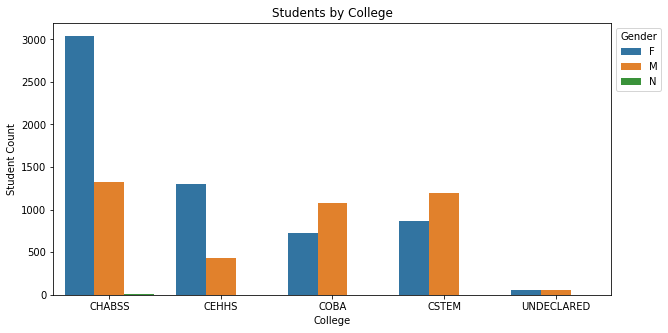

In [ ]:
# Bar Plot College

plt.figure(figsize=(10, 5))
sns.countplot(data=students_df, x="College", hue="Gender")
plt.legend(title = 'Gender', bbox_to_anchor = (1, 1))
plt.title('Students by College')
plt.xlabel('College')
plt.ylabel('Student Count')

But the concentration of Male is higher in Business and Stem. 

In [ ]:
#time.strftime('%H:%M:%S')

test = students_df.copy(deep=True)
print(students_df.sample(1))
print(test.sample(1))

# Convert multiple datetime columns to string type
dt_col = ['M_arr','M_dep','T_arr','T_dep','W_arr','W_dep','R_arr','R_dep','F_arr','F_dep','S_arr','S_dep']

#test[dt_col] = test[dt_col].astype(str).apply(lambda x: str(x)[:-8])

#test[dt_col] = pd.to_datetime(test[dt_col].astype(str), format='%H/%M/%S') # -> missing year month day


#test[dt_col] = test[dt_col].apply(lambda x: x[11:] if len(x)>8 else x)

#test['M_arr'] = test['M_arr'].apply(lambda x: str(x)[:-8])

for col in dt_col:
    test[col].apply(lambda x: str(x)[:-8])





        ID    Zip Gender  Age      Level College     M_arr     M_dep  \
4056  4110  92083      M   21  Sophomore    COBA  17:30:00  18:45:00   

         T_arr     T_dep     W_arr     W_dep     R_arr     R_dep     F_arr  \
4056  00:00:00  00:00:00  17:30:00  18:45:00  08:00:00  20:20:00  00:00:00   

         F_dep     S_arr     S_dep  
4056  00:00:00  00:00:00  00:00:00  
        ID         Zip Gender  Age     Level College     M_arr     M_dep  \
7205  7294  92064-5308      F   19  Freshman  CHABSS  09:30:00  10:20:00   

         T_arr     T_dep     W_arr     W_dep     R_arr     R_dep     F_arr  \
7205  00:00:00  00:00:00  09:30:00  10:20:00  00:00:00  00:00:00  09:30:00   

         F_dep     S_arr     S_dep  
7205  10:20:00  00:00:00  00:00:00  


Arrival or Departure at 00:00 counts students that don't go to campus on this day
Student Count per Arrival Time
+--------------+---------------+
| Arrival Time | Arrival Count |
+--------------+---------------+
|   00:00:00   |      3876     |
|   07:30:00   |      230      |
|   08:00:00   |       47      |
|   08:15:00   |       57      |
|   08:30:00   |      1002     |
|   09:00:00   |       33      |
|   09:30:00   |      1238     |
|   10:00:00   |       20      |
|   10:30:00   |      710      |
|   11:30:00   |      639      |
|   12:30:00   |      384      |
|   13:00:00   |       33      |
|   13:15:00   |       8       |
|   13:30:00   |      210      |
|   14:00:00   |       1       |
|   14:30:00   |      694      |
|   15:30:00   |       20      |
|   16:00:00   |      468      |
|   16:30:00   |       66      |
|   17:30:00   |      271      |
|   18:30:00   |       38      |
|   19:00:00   |       57      |
+--------------+---------------+
Student Count per Departure T

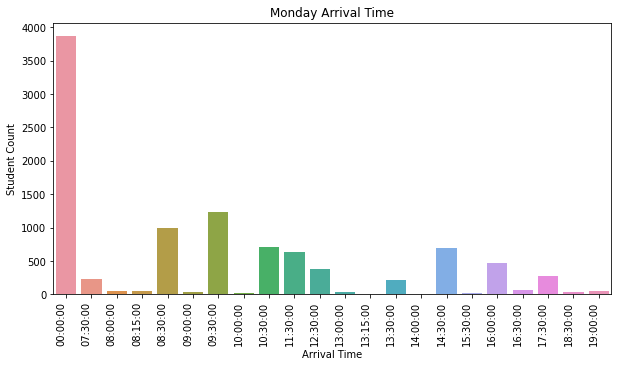

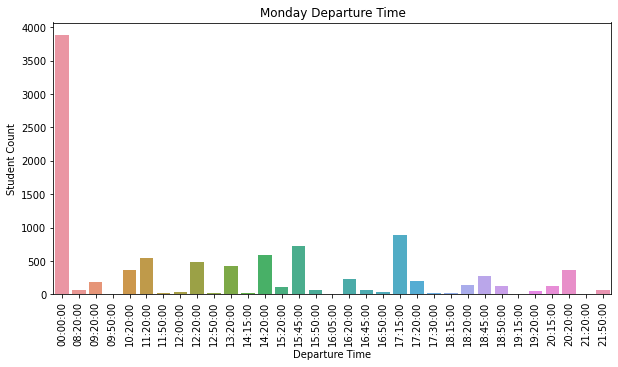

In [ ]:
from operator import index
from prettytable import PrettyTable

# Plot Arrival/Departure Time by Day of the Week
def arr_dep_plot(weekday, df):
    print("Arrival or Departure at 00:00 counts students that don't go to campus on this day")
    
    char = ''
    if weekday == "Monday":
        char = 'M'
    elif weekday == "Tuesday":
        char = 'T'
    elif weekday == "Wednesday":
        char = 'W'
    elif weekday == "Thursday":
        char = 'R'
    elif weekday == "Friday":
        char = 'F'
    elif weekday == "Saturday":
        char = 'S'

    # Arrival
    col_name = char +"_arr"
    arrival = df.groupby(col_name)[col_name].count()
    arr_ind = arrival.index
    x = PrettyTable()
    x.field_names = ["Arrival Time", "Arrival Count",]
    i = 0 # iterator
    for n in arrival: 
        x.add_row([ arr_ind[i], n ])
        i += 1
    print("Student Count per Arrival Time")
    print(x)
    
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x= col_name, order=arr_ind)
    #sns.countplot(x= col_name, data=df[-(df[col_name] == '00:00:00')]) # remove time = 00:00:00
    plt.xticks(rotation=90, ha='right')
    plt.title(weekday + ' Arrival Time')
    plt.xlabel('Arrival Time')
    plt.ylabel('Student Count')

    # Departure
    col_name = char +"_dep"
    departure = df.groupby(col_name)[col_name].count()
    dep_ind = departure.index
    x = PrettyTable()
    x.field_names = ["Departure Time", "Departure Count",]
    i = 0 # iterator
    for n in departure:
        x.add_row([ dep_ind[i], n ])
        i += 1
    print("Student Count per Departure Time")
    print(x)
    
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x= col_name, order=dep_ind)
    plt.xticks(rotation=90)
    plt.title( weekday +' Departure Time')
    plt.xlabel('Departure Time')
    plt.ylabel('Student Count')


# Monday 
arr_dep_plot("Monday", test)


Arrival or Departure at 00:00 counts students that don't go to campus on this day
Student Count per Arrival Time
+--------------+---------------+
| Arrival Time | Arrival Count |
+--------------+---------------+
|   00:00:00   |      3444     |
|   07:30:00   |      330      |
|   08:00:00   |      190      |
|   08:15:00   |       49      |
|   08:30:00   |       20      |
|   09:00:00   |      1621     |
|   10:00:00   |      281      |
|   10:30:00   |      1458     |
|   11:00:00   |       40      |
|   12:00:00   |       1       |
|   12:30:00   |       10      |
|   13:00:00   |      1096     |
|   13:45:00   |       9       |
|   14:00:00   |       48      |
|   14:30:00   |      635      |
|   15:00:00   |       28      |
|   16:00:00   |      399      |
|   17:00:00   |       84      |
|   17:30:00   |      241      |
|   18:00:00   |       32      |
|   18:30:00   |       4       |
|   19:00:00   |       73      |
|   19:30:00   |       8       |
|   20:30:00   |       1     

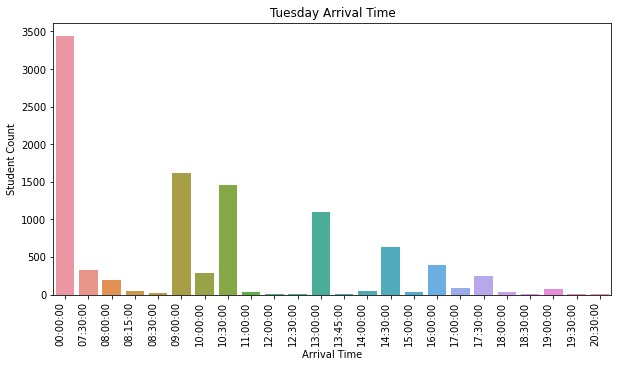

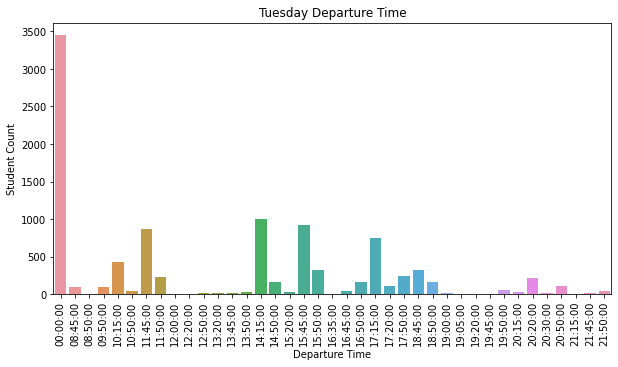

In [ ]:
arr_dep_plot("Tuesday", students_df)


Arrival or Departure at 00:00 counts students that don't go to campus on this day
Student Count per Arrival Time
+--------------+---------------+
| Arrival Time | Arrival Count |
+--------------+---------------+
|   00:00:00   |      3710     |
|   07:30:00   |      283      |
|   08:00:00   |      155      |
|   08:15:00   |       58      |
|   08:30:00   |      1045     |
|   09:00:00   |       47      |
|   09:30:00   |      1114     |
|   10:00:00   |       15      |
|   10:30:00   |      790      |
|   11:30:00   |      675      |
|   12:30:00   |      481      |
|   13:00:00   |       45      |
|   13:15:00   |       4       |
|   13:30:00   |      195      |
|   13:45:00   |       16      |
|   14:00:00   |       3       |
|   14:30:00   |      640      |
|   15:30:00   |       9       |
|   16:00:00   |      420      |
|   16:30:00   |       63      |
|   17:30:00   |      284      |
|   18:30:00   |       8       |
|   19:00:00   |       42      |
+--------------+-------------

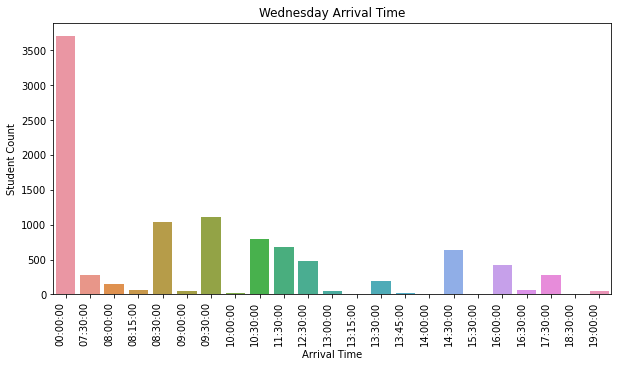

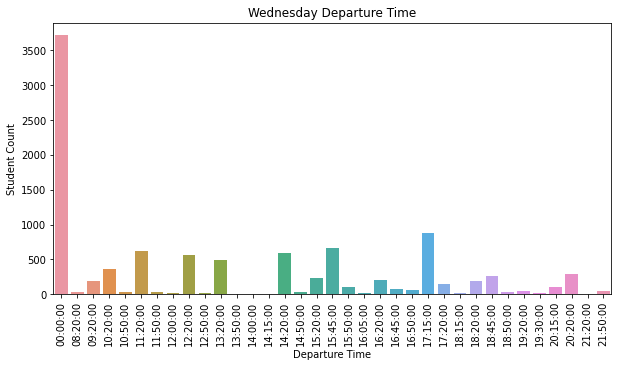

In [ ]:
arr_dep_plot("Wednesday", students_df)


Arrival or Departure at 00:00 counts students that don't go to campus on this day
Student Count per Arrival Time
+--------------+---------------+
| Arrival Time | Arrival Count |
+--------------+---------------+
|   00:00:00   |      3683     |
|   07:30:00   |      311      |
|   08:00:00   |      214      |
|   08:15:00   |       13      |
|   08:30:00   |       17      |
|   09:00:00   |      1565     |
|   10:00:00   |      263      |
|   10:30:00   |      1398     |
|   11:00:00   |       43      |
|   12:30:00   |       5       |
|   13:00:00   |      1219     |
|   13:30:00   |       4       |
|   14:00:00   |       31      |
|   14:30:00   |      589      |
|   15:00:00   |       36      |
|   16:00:00   |      284      |
|   17:00:00   |       78      |
|   17:30:00   |      245      |
|   18:00:00   |       15      |
|   19:00:00   |       89      |
+--------------+---------------+
Student Count per Departure Time
+----------------+-----------------+
| Departure Time | Depart

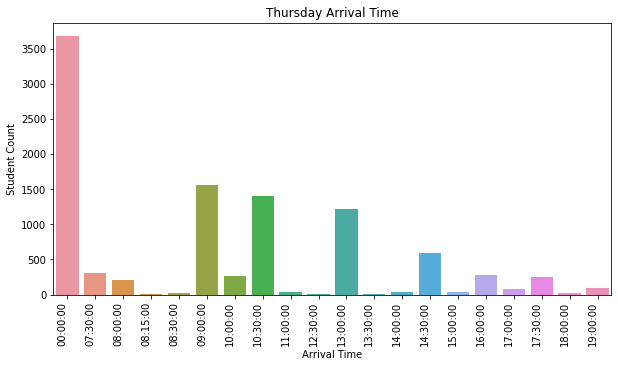

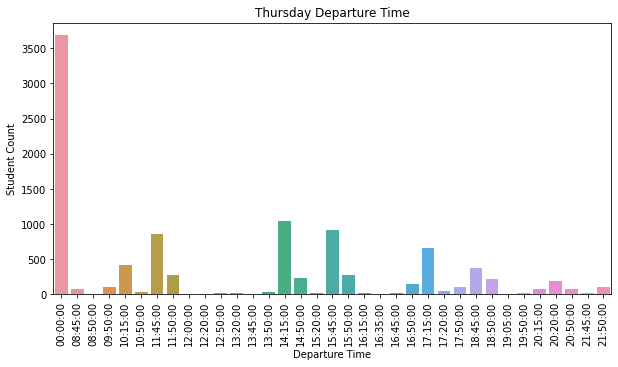

In [ ]:
arr_dep_plot("Thursday", students_df)


Arrival or Departure at 00:00 counts students that don't go to campus on this day
Student Count per Arrival Time
+--------------+---------------+
| Arrival Time | Arrival Count |
+--------------+---------------+
|   00:00:00   |      6191     |
|   07:30:00   |      309      |
|   08:00:00   |      128      |
|   08:30:00   |      736      |
|   09:00:00   |       5       |
|   09:30:00   |      1045     |
|   10:00:00   |       7       |
|   10:30:00   |      802      |
|   11:30:00   |      333      |
|   12:30:00   |      267      |
|   13:00:00   |       36      |
|   13:30:00   |      191      |
|   14:30:00   |       25      |
|   17:30:00   |       27      |
+--------------+---------------+
Student Count per Departure Time
+----------------+-----------------+
| Departure Time | Departure Count |
+----------------+-----------------+
|    00:00:00    |       6191      |
|    08:20:00    |        43       |
|    09:20:00    |       311       |
|    10:20:00    |       457       |
|

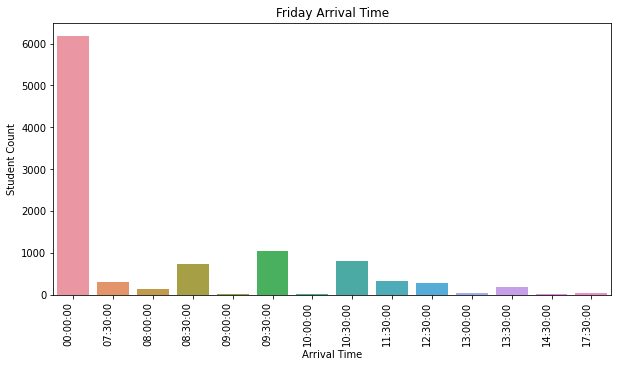

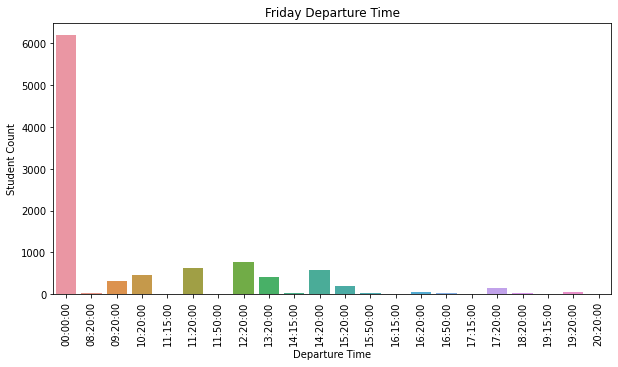

In [ ]:
arr_dep_plot("Friday", students_df)


Arrival or Departure at 00:00 counts students that don't go to campus on this day
Student Count per Arrival Time
+--------------+---------------+
| Arrival Time | Arrival Count |
+--------------+---------------+
|   00:00:00   |     10085     |
|   09:00:00   |       17      |
+--------------+---------------+
Student Count per Departure Time
+----------------+-----------------+
| Departure Time | Departure Count |
+----------------+-----------------+
|    00:00:00    |      10085      |
|    15:15:00    |        17       |
+----------------+-----------------+


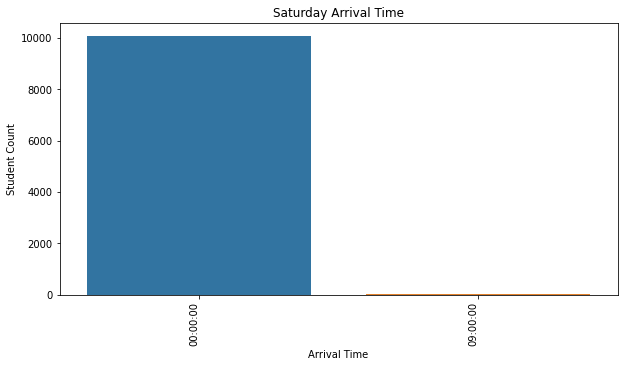

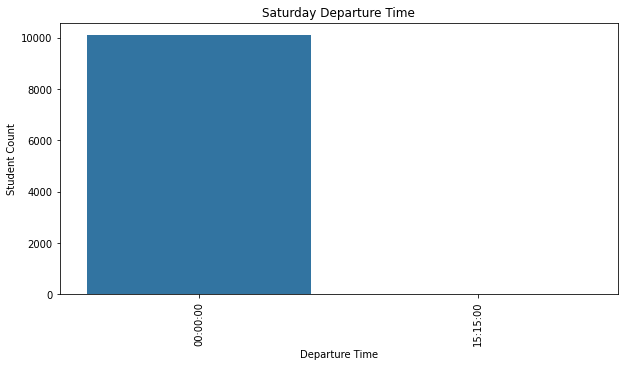

In [ ]:
arr_dep_plot("Saturday", students_df)

## Get Students Location

Retrieve data from file

In [ ]:
import pandas as pd

students_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/Spring_2022_Students.csv')
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10102 entries, 0 to 10101
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10102 non-null  int64 
 1   ID          10102 non-null  int64 
 2   Zip         10102 non-null  object
 3   Gender      10102 non-null  object
 4   Age         10102 non-null  int64 
 5   Level       10102 non-null  object
 6   College     10102 non-null  object
 7   M_arr       10102 non-null  object
 8   M_dep       10102 non-null  object
 9   T_arr       10102 non-null  object
 10  T_dep       10102 non-null  object
 11  W_arr       10102 non-null  object
 12  W_dep       10102 non-null  object
 13  R_arr       10102 non-null  object
 14  R_dep       10102 non-null  object
 15  F_arr       10102 non-null  object
 16  F_dep       10102 non-null  object
 17  S_arr       10102 non-null  object
 18  S_dep       10102 non-null  object
dtypes: int64(3), object(16)
memory usage: 1.5+ MB


In [ ]:
# Delete column "unnamed" 
students_df.drop(columns='Unnamed: 0', inplace=True)
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10102 entries, 0 to 10101
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       10102 non-null  int64 
 1   Zip      10102 non-null  object
 2   Gender   10102 non-null  object
 3   Age      10102 non-null  int64 
 4   Level    10102 non-null  object
 5   College  10102 non-null  object
 6   M_arr    10102 non-null  object
 7   M_dep    10102 non-null  object
 8   T_arr    10102 non-null  object
 9   T_dep    10102 non-null  object
 10  W_arr    10102 non-null  object
 11  W_dep    10102 non-null  object
 12  R_arr    10102 non-null  object
 13  R_dep    10102 non-null  object
 14  F_arr    10102 non-null  object
 15  F_dep    10102 non-null  object
 16  S_arr    10102 non-null  object
 17  S_dep    10102 non-null  object
dtypes: int64(2), object(16)
memory usage: 1.4+ MB


Filter CA students

In [ ]:
# Edit zip codes from students_df to the format 'ddddd'

# Create a dataframe for CA students
students_CA_df = students_df.copy()

# Edit postal codes for the first 5 digits
students_CA_df['Zip'] = students_CA_df['Zip'].str[:5]
print(students_CA_df.shape)

# Postal codes formed with less than 5 digits are not in the US
students_CA_df = students_CA_df.loc[students_CA_df['Zip'].str.len() == 5]
print(students_CA_df.shape)

# Postal codes formed with a mix of letter and digits are not in the US
students_CA_df = students_CA_df.loc[students_CA_df['Zip'].str.isdigit()]
print(students_CA_df.shape)



(10102, 18)
(10089, 18)
(10085, 18)


In [ ]:
# Save zip codes from students_df for all the US
zip_count = students_CA_df['Zip'].value_counts().to_list()
zip_list = students_CA_df.Zip.unique()
zip_list = zip_list.tolist()
#print("Zip Count:", zip_count)
#print("Zip List:", zip_list)
print("There are", len(students_CA_df.index) , "students with",
      len(zip_list),"different locations" )


There are 10085 students with 888 different locations


In [ ]:
# Keep only CA location

# Ref: https://codigo-postal.co/en-us/usa/california/
# selecting rows based on condition zip in range 90000 and 96163
students_CA_df['Zip'] = students_CA_df['Zip'].astype(int)
students_CA_df = students_CA_df.loc[(students_CA_df['Zip'] > 90000) & (students_CA_df['Zip'] < 96163)]
students_CA_df['Zip'] = students_CA_df['Zip'].astype(str)
print(students_CA_df.shape)

zip_count_CA = students_CA_df['Zip'].value_counts().to_list()
zip_list_CA = students_CA_df.Zip.unique()
zip_list_CA = zip_list_CA.tolist()
#print("Zip Count CA:", zip_count_CA)
#print("Zip List CA:", zip_list_CA)
print("There are", len(students_CA_df.index) , "students with",
      len(zip_list_CA),"different California locations" )

(9953, 18)
There are 9953 students with 763 different California locations


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


There are 9953 students with 763 different California locations

In [ ]:
# Save a list of students per zip code
CA_zip_std_dict = dict()

# Iterate through the table and save each ID to its corresponding zip location
for ind in students_CA_df.index:
    # print("Index: ", ind)
    st_id = students_CA_df['ID'][ind]
    zip = students_CA_df['Zip'][ind]

    # Check if zip is already in the dictionary
    if (len(CA_zip_std_dict)== 0) or (zip not in CA_zip_std_dict.keys()) :
        CA_zip_std_dict[zip] = {'stud_list':[st_id]}
    else: 
        # zip is already saved into dictionary, append the id to the list
        CA_zip_std_dict[zip]['stud_list'].append(st_id)

In [ ]:
# Save dict into students_CA_df as a new column 'stud_list

print(len(CA_zip_std_dict), 'students')
print(CA_zip_std_dict['92024'])


763 students
{'stud_list': [35, 121, 228, 243, 328, 456, 645, 651, 656, 758, 887, 1071, 1102, 1114, 1131, 1250, 1311, 1421, 1441, 1680, 1735, 1959, 2053, 2189, 2197, 2214, 2231, 2389, 2539, 2611, 2623, 2728, 2739, 2741, 2975, 3076, 3078, 3226, 3389, 3441, 3611, 3680, 3729, 3762, 3803, 3804, 4082, 4095, 4101, 4179, 4399, 4446, 4490, 4557, 4690, 4691, 4738, 4785, 4885, 4902, 5089, 5105, 5197, 5449, 5591, 5601, 5624, 5644, 5671, 6001, 6066, 6169, 6231, 6278, 6289, 6481, 6483, 6654, 6661, 6722, 7054, 7127, 7214, 7886, 7915, 8003, 8015, 8021, 8066, 8289, 8375, 8974, 8981, 9326, 9625, 9653, 9844]}


In [ ]:
# Save zip_stud_list into a dataframe
ca_df = pd.DataFrame(CA_zip_std_dict)
ca_df = ca_df.T
ca_df['zip'] = ca_df.index
ca_df

stud_list    zip
92054  [1, 95, 125, 192, 339, 342, 444, 579, 620, 667...  92054
92078  [2, 36, 38, 43, 56, 86, 99, 110, 135, 136, 146...  92078
92008  [3, 42, 74, 102, 277, 281, 299, 310, 453, 462,...  92008
92069  [4, 20, 30, 57, 97, 119, 186, 251, 317, 329, 3...  92069
92012                                                [5]  92012
...                                                  ...    ...
92844                                            [10154]  92844
96002                                            [10158]  96002
93446                                            [10209]  93446
94559                                            [10221]  94559
96022                                            [10288]  96022

[763 rows x 2 columns]

In [ ]:
# Add students count 
ca_df ['stud_count'] =  ca_df['stud_list'].apply(len)

ca_df.sample(2)

stud_list    zip  stud_count
95864  [7188, 7268, 8341]  95864           3
92860  [1772, 4618, 9791]  92860           3

In [ ]:
ca_df.shape

(763, 3)

In [ ]:
# Save students list into a file
upload_csv_to_gdrive(ca_df, 'ca_zip_students_list.csv')
download_as_csv(ca_df,'ca_zip_students_list.csv')

Uploaded to Google Drive on 2022-11-13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-13


In [ ]:
# Save students_CA_df into a file
upload_csv_to_gdrive(students_CA_df, 'Spring_2022_CA_students.csv')
download_as_csv(students_CA_df, 'Spring_2022_CA_students.csv')

Uploaded to Google Drive on 2022-11-13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-13


pgeocode 0.3.0

Postal code geocoding and distance calculations
pgeocode is a Python library for high performance off-line querying of GPS coordinates, region name and municipality name from postal codes. Distances between postal codes as well as general distance queries are also supported. 

In [ ]:
!pip install pgeocode


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Retrieve data from file

In [ ]:
import pandas as pd

# retrieve zip list with student list from file
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/ca_zip_students_list.csv'
ca_zip_stud_df = pd.read_csv(file_path)
ca_zip_stud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  763 non-null    int64 
 1   stud_list   763 non-null    object
 2   zip         763 non-null    int64 
 3   stud_count  763 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.0+ KB


In [ ]:
ca_zip_stud_df.drop(columns='Unnamed: 0', inplace=True)
ca_zip_stud_df.sample(2)

stud_list    zip  stud_count
732        [9514]  94025           1
723  [9323, 9618]  95823           2

In [ ]:
type(ca_zip_stud_df)

pandas.core.frame.DataFrame

In [ ]:
# make sure the zip columns is str 

ca_zip_stud_df['zip'] = ca_zip_stud_df['zip'].astype(str)

In [ ]:
ca_zip_stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stud_list   763 non-null    object
 1   zip         763 non-null    object
 2   stud_count  763 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [ ]:
# Create the CA zip list to query

zip_list_CA = ca_zip_stud_df['zip'].to_list()
type(zip_list[0])

str

Get locations using Nominatim

In [ ]:
from pgeocode import Nominatim

nomi = Nominatim('us')

# Create a dataframe to save locations based on zip codes (for the US)
locations_df = nomi.query_postal_code(zip_list)
print(locations_df.shape)
locations_df.sample(1)

(888, 12)


postal_code country_code place_name  state_name state_code county_name  \
11       92028           US  Fallbrook  California         CA   San Diego   

    county_code community_name  community_code  latitude  longitude  accuracy  
11         73.0            NaN             NaN    33.369   -117.229       4.0

In [ ]:
# USA
locations_df.info() # All students with a 5 digit postal code in the US

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     888 non-null    object 
 1   country_code    868 non-null    object 
 2   place_name      868 non-null    object 
 3   state_name      866 non-null    object 
 4   state_code      866 non-null    object 
 5   county_name     866 non-null    object 
 6   county_code     866 non-null    float64
 7   community_name  0 non-null      object 
 8   community_code  0 non-null      float64
 9   latitude        868 non-null    float64
 10  longitude       868 non-null    float64
 11  accuracy        866 non-null    float64
 12  stud_count      888 non-null    int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 97.1+ KB


Nominatim could not retrieve location information for all locations. Of 888 zip codes, only 868 has latitude and longitude information

In [ ]:
# CALIFORNIA

# Create a dataframe to save locations based on zip codes in CA
locations_CA_df = nomi.query_postal_code(zip_list_CA)
print(locations_CA_df.shape)
locations_CA_df.sample(1)

(763, 12)


postal_code country_code  place_name  state_name state_code county_name  \
647       95818           US  Sacramento  California         CA  Sacramento   

     county_code community_name  community_code  latitude  longitude  accuracy  
647         67.0            NaN             NaN   38.5568  -121.4929       4.0

In [ ]:
# Add count of students to locations dataframe 
locations_df['stud_count'] = zip_count
print(locations_df.shape)
locations_df.sample(1)

(888, 13)


postal_code country_code place_name  state_name state_code county_name  \
431       94550           US  Livermore  California         CA     Alameda   

     county_code community_name  community_code  latitude  longitude  \
431          1.0            NaN             NaN    37.683   -121.763   

     accuracy  stud_count  
431       4.0           2

In [ ]:
# CALIFORNIA

locations_CA_df.info() # Olny CA 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     763 non-null    object 
 1   country_code    761 non-null    object 
 2   place_name      761 non-null    object 
 3   state_name      761 non-null    object 
 4   state_code      761 non-null    object 
 5   county_name     761 non-null    object 
 6   county_code     761 non-null    float64
 7   community_name  0 non-null      object 
 8   community_code  0 non-null      float64
 9   latitude        761 non-null    float64
 10  longitude       761 non-null    float64
 11  accuracy        761 non-null    float64
dtypes: float64(5), object(7)
memory usage: 77.5+ KB


Nominatim could not retrieve all locations, from 763 zip codes, only 761 has latitude and longitude

Nominatim could find 868 locations from 888 different zip codes from the students population in the US, and 761 locations from 763 different zip codes from CA

In [ ]:
ca_zip_stud_df.head(4)

stud_list    zip  stud_count
0  [1, 95, 125, 192, 339, 342, 444, 579, 620, 667...  92054         111
1  [2, 36, 38, 43, 56, 86, 99, 110, 135, 136, 146...  92078         404
2  [3, 42, 74, 102, 277, 281, 299, 310, 453, 462,...  92008          78
3  [4, 20, 30, 57, 97, 119, 186, 251, 317, 329, 3...  92069         482

In [ ]:
locations_CA_df.head(4)

postal_code country_code  place_name  state_name state_code county_name  \
0       92054           US   Oceanside  California         CA   San Diego   
1       92078           US  San Marcos  California         CA   San Diego   
2       92008           US    Carlsbad  California         CA   San Diego   
3       92069           US  San Marcos  California         CA   San Diego   

   county_code community_name  community_code  latitude  longitude  accuracy  
0         73.0            NaN             NaN   33.2072  -117.3573       4.0  
1         73.0            NaN             NaN   33.1193  -117.1850       4.0  
2         73.0            NaN             NaN   33.1602  -117.3250       4.0  
3         73.0            NaN             NaN   33.1444  -117.1697       4.0

In [ ]:
ca_zip_stud_df = ca_zip_stud_df.rename(columns={'zip':'postal_code'})
ca_zip_stud_df.tail(4)

stud_list postal_code  stud_count
759   [10158]       96002           1
760   [10209]       93446           1
761   [10221]       94559           1
762   [10288]       96022           1

In [ ]:
locations_CA_df.tail(4)

postal_code country_code   place_name  state_name state_code  \
759       96002           US      Redding  California         CA   
760       93446           US  Paso Robles  California         CA   
761       94559           US         Napa  California         CA   
762       96022           US   Cottonwood  California         CA   

         county_name  county_code community_name  community_code  latitude  \
759           Shasta         89.0            NaN             NaN   40.5486   
760  San Luis Obispo         79.0            NaN             NaN   35.6406   
761             Napa         55.0            NaN             NaN   38.2904   
762           Shasta         89.0            NaN             NaN   40.3691   

     longitude  accuracy  
759  -122.3339       4.0  
760  -120.7003       4.0  
761  -122.2841       4.0  
762  -122.3375       4.0

In [ ]:
ca_zip_stud_df.shape

(763, 3)

In [ ]:
locations_CA_df.shape

(761, 15)

In [ ]:
# Merge ca_zip_stud_df to the locations_CA_df

#result = pd.merge(left, right, on="key")
locations_CA_df = pd.merge( locations_CA_df,ca_zip_stud_df, on='postal_code' )
                       

In [ ]:
locations_CA_df.sample(10)   

postal_code country_code   place_name  state_name state_code  \
5         92025           US    Escondido  California         CA   
444       93305           US  Bakersfield  California         CA   
722       94549           US    Lafayette  California         CA   
207       92118           US     Coronado  California         CA   
577       93230           US      Hanford  California         CA   
143       92346           US     Highland  California         CA   
636       95425           US   Cloverdale  California         CA   
403       92337           US      Fontana  California         CA   
592       92036           US       Julian  California         CA   
510       93292           US      Visalia  California         CA   

        county_name  county_code community_name  community_code  latitude  \
5         San Diego         73.0            NaN             NaN   33.1101   
444            Kern         29.0            NaN             NaN   35.3855   
722    Contra Costa         13.0            NaN             NaN   37.8961   
207       San Diego         73.0            NaN             NaN   32.6807   
577           Kings         31.0            NaN             NaN   36.3314   
143  San Bernardino         71.0            NaN             NaN   34.1283   
636          Sonoma         97.0            NaN             NaN   38.7931   
403  San Bernardino         71.0            NaN             NaN   34.0498   
592       San Diego         73.0            NaN             NaN   33.0534   
510          Tulare        107.0            NaN             NaN   36.3302   

     longitude  accuracy                                          stud_list  \
5    -117.0700       4.0  [6, 9, 23, 193, 233, 350, 465, 497, 503, 547, ...   
444  -118.9860       4.0                                             [3996]   
722  -122.1119       4.0                                             [9295]   
207  -117.1698       4.0                     [1309, 4524, 7412, 7537, 7698]   
577  -119.6491       4.0                                       [6276, 7766]   
143  -117.2087       4.0  [681, 3264, 4107, 5163, 5304, 5408, 6549, 7360...   
636  -123.0074       4.0                                             [7422]   
403  -117.4706       4.0                     [3415, 5893, 7015, 8009, 8434]   
592  -116.5658       4.0                                             [6749]   
510  -119.2921       4.0                                       [4949, 8174]   

     stud_count  
5           253  
444           1  
722           1  
207           5  
577           2  
143          12  
636           1  
403           5  
592           1  
510           2

In [ ]:
# CA students
print(locations_CA_df.latitude.isna().sum())

# Drop rows with no location (latitude/longitude)
locations_CA_df.dropna(subset=['latitude', 'longitude'], inplace=True)

print(locations_CA_df.latitude.isna().sum())

2
0


In [ ]:
# All students
print(locations_df.latitude.isna().sum())

# Drop rows with no location (latitude/longitude)
locations_df.dropna(subset=['latitude', 'longitude'], inplace=True)

print(locations_df.latitude.isna().sum())

20
0


In [ ]:
# CALIFORNIA

# make county_code as 3 digit string
locations_CA_df['fips']= locations_CA_df['county_code'].astype(int).astype(str)

# Add leading zeros
locations_CA_df['fips']= locations_CA_df["fips"].str.zfill(3)

# Add state prefix tpo fips CA=06
locations_CA_df["fips"]= '06' + locations_CA_df["fips"]



In [ ]:
locations_CA_df.sample(2)

postal_code country_code   place_name  state_name state_code  county_name  \
451       91803           US     Alhambra  California         CA  Los Angeles   
386       91393           US  North Hills  California         CA  Los Angeles   

     county_code community_name  community_code  latitude  longitude  \
451         37.0            NaN             NaN   34.0745  -118.1434   
386         37.0            NaN             NaN   34.2364  -118.4847   

     accuracy stud_list  stud_count   fips  
451       4.0    [4238]           1  06037  
386       4.0    [3244]           1  06037

In [ ]:
print(locations_CA_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 762
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     761 non-null    object 
 1   country_code    761 non-null    object 
 2   place_name      761 non-null    object 
 3   state_name      761 non-null    object 
 4   state_code      761 non-null    object 
 5   county_name     761 non-null    object 
 6   county_code     761 non-null    float64
 7   community_name  0 non-null      object 
 8   community_code  0 non-null      float64
 9   latitude        761 non-null    float64
 10  longitude       761 non-null    float64
 11  accuracy        761 non-null    float64
 12  stud_list       761 non-null    object 
 13  stud_count      761 non-null    int64  
 14  fips            761 non-null    object 
dtypes: float64(5), int64(1), object(9)
memory usage: 95.1+ KB
None


In [ ]:
# Change stud_count to int

#df["a"] = pd.to_numeric(df["a"])
locations_CA_df['stud_count'] = pd.to_numeric(locations_CA_df['stud_count'])

locations_CA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 762
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     761 non-null    object 
 1   country_code    761 non-null    object 
 2   place_name      761 non-null    object 
 3   state_name      761 non-null    object 
 4   state_code      761 non-null    object 
 5   county_name     761 non-null    object 
 6   county_code     761 non-null    float64
 7   community_name  0 non-null      object 
 8   community_code  0 non-null      float64
 9   latitude        761 non-null    float64
 10  longitude       761 non-null    float64
 11  accuracy        761 non-null    float64
 12  stud_list       761 non-null    object 
 13  stud_count      761 non-null    int64  
 14  fips            761 non-null    object 
dtypes: float64(5), int64(1), object(9)
memory usage: 95.1+ KB


In [ ]:
print("CA locations have %d students at %d different locations" %
      (locations_CA_df['stud_count'].sum(), len(locations_CA_df.index) )
      )

CA locations have 9951 students at 761 different locations


In [ ]:
# Save locations as csv files 
# All US locations
download_as_csv(locations_df, 'stud_locations_Nominatim.csv')
upload_csv_to_gdrive(locations_df, 'stud_locations_Nominatim.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-13
Uploaded to Google Drive on 2022-11-13


In [ ]:
# All CA locations
download_as_csv(locations_CA_df, 'stud_CA_locations_Nominatim.csv')
upload_csv_to_gdrive(locations_CA_df, 'stud_CA_locations_Nominatim.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-13
Uploaded to Google Drive on 2022-11-13


GeoPandas

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 40.9 MB/s 
     |████████████████████████████████| 16.7 MB 36.8 MB/s 


Get US Zip Code Geometry

Using the US ZCTA file dowloaded from the US Census website
https://www.census.gov/programs-surveys/geography/guidance/geo-areas/zctas.html

ZCTA file: https://www2.census.gov/geo/tiger/TIGER2022/ZCTA520/


From Stanford, CA zip boundaries 
(Census Zip Code Tabulation Areas, California, 2010) https://earthworks.stanford.edu/catalog/stanford-dc841dq9031

In [ ]:
import geopandas as gpd

# Set filepath
file_path = "/content/drive/MyDrive/Colab_Notebooks/Rideshare/CA_zip_boundaries_shapefiles/ZCTA2010.shp"

# Read file using gpd.read_file()
zip_gdf = gpd.read_file(file_path)
type(zip_gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# In most instances the ZCTA code is the same as the ZIP Code for an area

zip_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 86 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1769 non-null   int64   
 1   CNTY_FIPS   0 non-null      object  
 2   COUNTY      0 non-null      object  
 3   TRACT       0 non-null      object  
 4   TRACT_ID    0 non-null      object  
 5   CENSUS_KEY  0 non-null      object  
 6   ZCTA        1769 non-null   object  
 7   ZCTA_KEY    1769 non-null   object  
 8   LATITUDE    1769 non-null   float64 
 9   LONGITUDE   1769 non-null   float64 
 10  TOT_POP     1769 non-null   int64   
 11  AGE_UNDER5  1769 non-null   int64   
 12  AGE_5TO9    1769 non-null   int64   
 13  AGE_10TO14  1769 non-null   int64   
 14  AGE_15TO19  1769 non-null   int64   
 15  AGE_20TO24  1769 non-null   int64   
 16  AGE_25TO29  1769 non-null   int64   
 17  AGE_30TO34  1769 non-null   int64   
 18  AGE_35TO39  1769 non-null   int64   
 19

In [ ]:
zip_gdf.sample(2)

OBJECTID CNTY_FIPS COUNTY TRACT TRACT_ID CENSUS_KEY   ZCTA ZCTA_KEY  \
322       323      None   None  None     None       None  93908  0693908   
547       548      None   None  None     None       None  93223  0693223   

      LATITUDE   LONGITUDE  ...  HU_VAC  HU_VAC_REN  HU_VAC_SEA  HU_OCC_OWN  \
322  36.634241 -121.606865  ...     215          36          50        3805   
547  36.304539 -119.204896  ...     131          44           6        1590   

     HU_OCC_O_1  HU_OCC_REN  HU_OCC_R_1    Shape_area      Shape_len  \
322       10292         834        2732  5.623764e+08  260760.878416   
547        6537        1012        4067  6.399813e+06   15639.282024   

                                              geometry  
322  POLYGON ((-132015.308 -143599.421, -132018.614...  
547  POLYGON ((70894.647 -187673.605, 70917.882 -18...  

[2 rows x 86 columns]

In [ ]:
zip_gdf.columns

Index(['OBJECTID', 'CNTY_FIPS', 'COUNTY', 'TRACT', 'TRACT_ID', 'CENSUS_KEY',
       'ZCTA', 'ZCTA_KEY', 'LATITUDE', 'LONGITUDE', 'TOT_POP', 'AGE_UNDER5',
       'AGE_5TO9', 'AGE_10TO14', 'AGE_15TO19', 'AGE_20TO24', 'AGE_25TO29',
       'AGE_30TO34', 'AGE_35TO39', 'AGE_40TO44', 'AGE_45TO49', 'AGE_50TO54',
       'AGE_55TO59', 'AGE_60TO64', 'AGE_65TO69', 'AGE_70TO74', 'AGE_75TO79',
       'AGE_80TO84', 'AGE_85_OVE', 'AGE16_OVER', 'AGE18_OVER', 'AGE21_OVER',
       'AGE62_OVER', 'AGE65_OVER', 'MALE', 'FEMALE', 'AGE_MEDIAN',
       'AGE_MEDI_1', 'AGE_MEDI_2', 'ONE_RACE', 'WHITE', 'BLACK_AFAM',
       'AMIND_ALAN', 'ASIAN', 'NATHAW_ISL', 'OTHER_RACE', 'MULTI_RACE',
       'HISPANIC_L', 'NON_HISP_L', 'WHITE_NHL', 'BLACK_AF_1', 'AMIND_AL_1',
       'ASIAN_NHL', 'NATHAW_I_1', 'OTHER_NHL', 'MULTI_RA_1', 'TOT_IN_HOU',
       'TOT_IN_GC', 'GC_INST', 'GC_NONINST', 'GC_CORRECT', 'GC_JUV', 'GC_NURS',
       'GC_OTHER', 'HH_TOTAL', 'HH_FAMILY', 'HH_NONFAML', 'HH_NONFAMI',
       'HH_NONFA_1', 'HH_NON

In [ ]:
# drop all unnecessary columns 

columns_lst = ['OBJECTID', 'CNTY_FIPS', 'COUNTY', 'TRACT', 'TRACT_ID', 'CENSUS_KEY',
       'ZCTA_KEY','TOT_POP', 'AGE_UNDER5','AGE_5TO9', 'AGE_10TO14', 'AGE_15TO19', 'AGE_20TO24', 
       'AGE_25TO29','AGE_30TO34', 'AGE_35TO39', 'AGE_40TO44', 'AGE_45TO49', 'AGE_50TO54',
       'AGE_55TO59', 'AGE_60TO64', 'AGE_65TO69', 'AGE_70TO74', 'AGE_75TO79',
       'AGE_80TO84', 'AGE_85_OVE', 'AGE16_OVER', 'AGE18_OVER', 'AGE21_OVER',
       'AGE62_OVER', 'AGE65_OVER', 'MALE', 'FEMALE', 'AGE_MEDIAN',
       'AGE_MEDI_1', 'AGE_MEDI_2', 'ONE_RACE', 'WHITE', 'BLACK_AFAM',
       'AMIND_ALAN', 'ASIAN', 'NATHAW_ISL', 'OTHER_RACE', 'MULTI_RACE',
       'HISPANIC_L', 'NON_HISP_L', 'WHITE_NHL', 'BLACK_AF_1', 'AMIND_AL_1',
       'ASIAN_NHL', 'NATHAW_I_1', 'OTHER_NHL', 'MULTI_RA_1', 'TOT_IN_HOU',
       'TOT_IN_GC', 'GC_INST', 'GC_NONINST', 'GC_CORRECT', 'GC_JUV', 'GC_NURS',
       'GC_OTHER', 'HH_TOTAL', 'HH_FAMILY', 'HH_NONFAML', 'HH_NONFAMI',
       'HH_NONFA_1', 'HH_NONFA_2', 'HH_NONFA_3', 'HH_NONFA_4', 'HH_WITH_UN',
       'HH_WITH_65', 'HU_TOTAL', 'HU_OCC', 'HU_VAC', 'HU_VAC_REN',
       'HU_VAC_SEA', 'HU_OCC_OWN', 'HU_OCC_O_1', 'HU_OCC_REN', 'HU_OCC_R_1']

zip_gdf.drop(columns=columns_lst, inplace=True)

zip_gdf.sample(3)

ZCTA   LATITUDE   LONGITUDE    Shape_area     Shape_len  \
1734  93427  34.608888 -120.223819  1.450322e+08  92709.351300   
459   93901  36.638507 -121.623953  3.790846e+07  51813.661405   
1587  93551  34.601677 -118.231024  1.899257e+08  89524.519696   

                                               geometry  
1734  POLYGON ((-16826.619 -376468.280, -16836.825 -...  
459   POLYGON ((-140807.484 -155449.808, -140860.119...  
1587  POLYGON ((164842.426 -374591.108, 165013.644 -...

In [ ]:
zip_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA        1769 non-null   object  
 1   LATITUDE    1769 non-null   float64 
 2   LONGITUDE   1769 non-null   float64 
 3   Shape_area  1769 non-null   float64 
 4   Shape_len   1769 non-null   float64 
 5   geometry    1769 non-null   geometry
dtypes: float64(4), geometry(1), object(1)
memory usage: 83.0+ KB


In [ ]:
zip_gdf.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

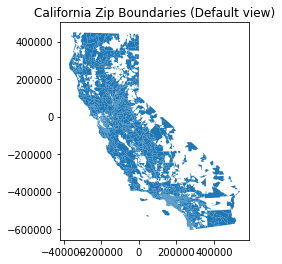

In [ ]:
# CA zip geometry
map = zip_gdf.plot()
map.set_title("California Zip Boundaries (Default view)");

In [ ]:
# Add CA student count to the zip_gdf
ca_zip_stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stud_list   763 non-null    object
 1   ZCTA        763 non-null    object
 2   stud_count  763 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [ ]:
# rename column to match on the merge
ca_zip_stud_df.rename(columns={'postal_code':'ZCTA'}, inplace=True)
ca_zip_stud_df.columns

Index(['stud_list', 'ZCTA', 'stud_count'], dtype='object')

In [ ]:
zip_gdf=zip_gdf.merge(ca_zip_stud_df, on='ZCTA', how='left') 
zip_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1769 entries, 0 to 1768
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA        1769 non-null   object  
 1   LATITUDE    1769 non-null   float64 
 2   LONGITUDE   1769 non-null   float64 
 3   Shape_area  1769 non-null   float64 
 4   Shape_len   1769 non-null   float64 
 5   geometry    1769 non-null   geometry
 6   stud_list   721 non-null    object  
 7   stud_count  721 non-null    float64 
dtypes: float64(5), geometry(1), object(2)
memory usage: 124.4+ KB


In [ ]:
#zip_gdf['stud_count'].fillna(0, inplace=True, downcast= 'infer')
#zip_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1769 entries, 0 to 1768
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA        1769 non-null   object  
 1   LATITUDE    1769 non-null   float64 
 2   LONGITUDE   1769 non-null   float64 
 3   Shape_area  1769 non-null   float64 
 4   Shape_len   1769 non-null   float64 
 5   geometry    1769 non-null   geometry
 6   stud_list   721 non-null    object  
 7   stud_count  1769 non-null   int64   
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 124.4+ KB


In [ ]:
zip_gdf.sample(3)

ZCTA   LATITUDE   LONGITUDE    Shape_area     Shape_len  \
814   90245  33.916502 -118.403861  1.514209e+07  19074.266680   
1434  92501  33.995451 -117.373620  1.546827e+07  24126.691535   
728   95697  38.732370 -121.810264  6.000305e+05   3778.020087   

                                               geometry  \
814   POLYGON ((145905.695 -453951.167, 145903.696 -...   
1434  POLYGON ((240850.084 -444052.991, 240863.057 -...   
728   POLYGON ((-156756.401 81330.657, -156743.351 8...   

                     stud_list  stud_count  
814               [3185, 9563]         2.0  
1434  [2355, 3077, 7873, 9619]         4.0  
728                        NaN         NaN

In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 11
  Warn("Warning: setting k to %d" % k_q, UserWarning)


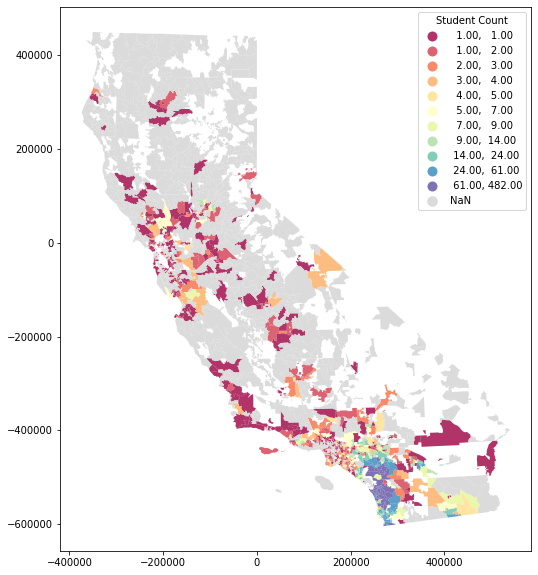

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (15,10)) #title = "California Zip Boundaries with Student Count")
zip_gdf.plot(ax=ax, 
             column='stud_count', 
             cmap= 'Spectral', 
             scheme= 'quantiles', 
             k=20,
             linewidth=0.1, 
             missing_kwds={'color': 'lightgrey'},
             alpha=0.8, 
             legend=True,
             #legend_kwds={'label': 'Student Count'}
             )

# plot circle at a location with specifc radius (128 km ~= 80 miles)
#ax.tissot(rad_km=128, lons=[-95.4,], lats=[29.7,],facecolor='green', alpha=0.4))

ax.get_legend().set_title('Student Count')

file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/images/ca_zip_count.png'
plt.savefig(file_path, dpi=300)


uszipcode search engine

uszipcode is the most powerful and easy to use programmable zipcode database in Python. It comes with a rich feature and easy-to-use zipcode search engine. And it is easy to customize the search behavior as you wish. The data is crawled from data.census.gov. There’s data tool allows you to explore 1300+ data points of a zipcode.

In [ ]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 3.1 MB/s 
     |████████████████████████████████| 121 kB 35.0 MB/s 


In [ ]:
from uszipcode import SearchEngine

# Add state and county to zip_gdf
search = SearchEngine()
zip_gdf['state'] = zip_gdf['ZCTA'].map(lambda x: search.by_zipcode(x).state)
zip_gdf['county'] = zip_gdf['ZCTA'].map(lambda x: search.by_zipcode(x).county)
#zip_df['state'] = zip_df.apply(lambda row: search.by_zipcode(row.ZCTA5CE20).state, axis=1)
#zip_df['county'] = zip_df.apply(lambda row: search.by_zipcode(row.ZCTA5CE10).county, axis=1)
zip_gdf.head()

Exception ignored in: <function SearchEngine.__del__ at 0x7f7446f44dd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1811, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1853, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2416, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2639, in _do_close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2625, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2617, in _connection_rollback_impl
  File "/usr/lo

ZCTA   LATITUDE   LONGITUDE    Shape_area     Shape_len  \
0  94601  37.776711 -122.218378  8.721649e+06  15265.093880   
1  94501  37.774084 -122.278049  2.954478e+07  27119.154912   
2  94560  37.520360 -122.031000  3.581839e+07  30752.336176   
3  94587  37.603151 -122.018626  5.107510e+07  53110.314427   
4  94580  37.676958 -122.133606  8.946896e+06  20260.685185   

                                            geometry           stud_list  \
0  POLYGON ((-195843.682 -22645.035, -195822.040 ...              [7825]   
1  POLYGON ((-201604.187 -25728.139, -202894.954 ...  [3020, 5941, 7327]   
2  POLYGON ((-181289.671 -49924.408, -181237.554 ...        [3007, 3147]   
3  POLYGON ((-182052.317 -43764.050, -182037.584 ...              [5327]   
4  POLYGON ((-187567.889 -34790.577, -187565.018 ...               [164]   

   stud_count state          county  
0         1.0    CA  Alameda County  
1         3.0    CA  Alameda County  
2         2.0    CA  Alameda County  
3         1.0    CA  Alameda County  
4         1.0    CA  Alameda County

In [ ]:
# Keep only CA
print(zip_gdf.shape)
#df = df[df.column_name == value]
zip_gdf = zip_gdf[zip_gdf.state == 'CA']
print(zip_gdf.shape)

(1769, 10)
(1763, 10)


In [ ]:
# save as a shapefile
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/CA_zip_boundaries_shapefiles/CA_zip_stud_count.shp'
zip_gdf.to_file(file_path)

# save as a geopackage
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/CA_sw_gpkg/CA_zip_stud_count.gpkg'
zip_gdf.to_file(file_path, layer='cities', driver="GPKG")

# Save zip code geometry from CA into a csv file
upload_csv_to_gdrive(zip_gdf, 'CA_zip_geometry.csv')
download_as_csv(zip_gdf, 'CA_zip_geometry.csv')

Uploaded to Google Drive on 2022-11-13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-13


Student Count by Zip Code

In [ ]:
# Sort table by stud_count

#df.sort_values(by=['col1'])
locations_CA_df = locations_CA_df.sort_values(by=['stud_count'], ascending=False)
locations_CA_df.head(3)

postal_code country_code  place_name  state_name state_code county_name  \
3        92069           US  San Marcos  California         CA   San Diego   
1        92078           US  San Marcos  California         CA   San Diego   
16       92027           US   Escondido  California         CA   San Diego   

    county_code community_name  community_code  latitude  longitude  accuracy  \
3          73.0            NaN             NaN   33.1444  -117.1697       4.0   
1          73.0            NaN             NaN   33.1193  -117.1850       4.0   
16         73.0            NaN             NaN   33.1388  -117.0520       4.0   

                                            stud_list  stud_count   fips  
3   [4, 20, 30, 57, 97, 119, 186, 251, 317, 329, 3...         482  06073  
1   [2, 36, 38, 43, 56, 86, 99, 110, 135, 136, 146...         404  06073  
16  [19, 28, 47, 53, 54, 90, 178, 183, 194, 202, 2...         319  06073

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Zip Code", "City", "Student Count"]
i = 0 # iterator
for ind in locations_CA_df.index:
    zip = locations_CA_df['postal_code'][ind]
    city = locations_CA_df['place_name'][ind]
    count = locations_CA_df['stud_count'][ind]
    x.add_row([ zip, city, count ])
    #x.add_row([ zip, count ])

    i += 1

    # Show only up to count > 50
    if count == 50:
        break

print("CA Students Count Above 50 per City")
print(x)
print('Total different locations:', len(locations_CA_df.index))

CA Students Count Above 50 per City
+----------+---------------+---------------+
| Zip Code |      City     | Student Count |
+----------+---------------+---------------+
|  92069   |   San Marcos  |      482      |
|  92078   |   San Marcos  |      404      |
|  92027   |   Escondido   |      319      |
|  92592   |    Temecula   |      291      |
|  92026   |   Escondido   |      274      |
|  92563   |    Murrieta   |      273      |
|  92025   |   Escondido   |      253      |
|  92057   |   Oceanside   |      251      |
|  92056   |   Oceanside   |      240      |
|  92084   |     Vista     |      237      |
|  92028   |   Fallbrook   |      202      |
|  92083   |     Vista     |      189      |
|  92562   |    Murrieta   |      182      |
|  92596   |   Winchester  |      139      |
|  92129   |   San Diego   |      138      |
|  92064   |     Poway     |      133      |
|  92591   |    Temecula   |      133      |
|  92584   |    Menifee    |      130      |
|  92126   |   San 

Student Count by County

In [ ]:
locations_CA_df.columns

Index(['postal_code', 'country_code', 'place_name', 'state_name', 'state_code',
       'county_name', 'county_code', 'community_name', 'community_code',
       'latitude', 'longitude', 'accuracy', 'stud_list', 'stud_count', 'fips'],
      dtype='object')

In [ ]:
county_df = locations_CA_df[['county_name', 'fips', 'stud_count']].copy()


In [ ]:
county_df = county_df.groupby(["county_name",'fips'],as_index=False)["stud_count"].sum()

In [ ]:
county_df.sample(10)

county_name   fips  stud_count
3   City and County of San Francisco  06075           3
23                            Placer  06061          29
25                        Sacramento  06067          52
18                              Mono  06051           1
32                     Santa Barbara  06083          13
7                           Humboldt  06023           6
8                           Imperial  06025          76
34                        Santa Cruz  06087          19
4                       Contra Costa  06013          28
40                            Tulare  06107          13

In [ ]:
county_df = county_df.sort_values(by=['stud_count'], ascending=False)
county_df.head()

county_name   fips  stud_count
28       San Diego  06073        5941
24       Riverside  06065        2240
22          Orange  06059         429
13     Los Angeles  06037         418
27  San Bernardino  06071         293

In [ ]:
x = PrettyTable()

x.field_names = ["County", "Student Count"]
i = 0 # iterator
for ind in county_df.index:
    county = county_df['county_name'][ind]
    count = county_df['stud_count'][ind]
    x.add_row([ county, count ])
    #x.add_row([ zip, count ])

    i += 1

    # Show only up to count > 10
    if count < 10:
        break

print("CA Students Count by County")
print(x)


CA Students Count by County
+-----------------+---------------+
|      County     | Student Count |
+-----------------+---------------+
|    San Diego    |      5941     |
|    Riverside    |      2240     |
|      Orange     |      429      |
|   Los Angeles   |      418      |
|  San Bernardino |      293      |
|     Imperial    |       76      |
|     Ventura     |       75      |
|    Sacramento   |       52      |
|   Santa Clara   |       49      |
|     Alameda     |       32      |
|      Placer     |       29      |
|   Contra Costa  |       28      |
|       Kern      |       26      |
|      Sonoma     |       25      |
|   San Joaquin   |       21      |
|    Santa Cruz   |       19      |
|    El Dorado    |       17      |
|      Fresno     |       16      |
|    San Mateo    |       16      |
|      Marin      |       15      |
|      Tulare     |       13      |
|  Santa Barbara  |       13      |
|      Solano     |       12      |
| San Luis Obispo |       11      |


In [ ]:
# Save CA student count by county into a file

download_as_csv(county_df, 'stud_by_CA_county.csv')
upload_csv_to_gdrive(county_df, 'stud_by_CA_county.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-13
Uploaded to Google Drive on 2022-11-13


## get_location_from(address) with Google API 

Used to retrieve location (latitude and longitude coordinates) from a partial address or zip code

In [ ]:
# Get location using Google Maps API

#These two unlock the Google API
from geopy.geocoders import GoogleV3
from geopy.extra.rate_limiter import RateLimiter
import time

#python_creds.py file format: 
#google_api = 'api_key'

import sys
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/Rideshare')
import python_keys # file with Google Map API key saved in my Google Drive

from geopy.geocoders import GoogleV3

def get_location_from(address):
    ''' 
    Get location using GoogleV3
    Parameter
       address : str
       the location you want to find coordinates (address or postal code)
    Returns 
        location.address: string in the format "city, state zip, country"
        location.latitude: float 
        location.longitude: float
    '''
    address = str(address) #the parameter needs to be a string

    if address is '' or address is '0':
        return 'Error - empty query', 0.0, 0.0
    
    geolocator = GoogleV3(api_key=python_keys.google_api) 
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1) #to not exceed the request limit
    location = geolocator.geocode(address, timeout=10)

    #time.sleep(2) # to avoid exceeding the request limit

    if location is not None:
        print(location.raw)
        #return location.latitude, location.longitude
        return location.address, location.latitude, location.longitude
        #return location
    else:
        return 'Error - not found', 0.0, 0.0

In [ ]:
addr, lat, lng = get_location_from('park and ride near 92596')

{'address_components': [{'long_name': '92596', 'short_name': '92596', 'types': ['postal_code']}, {'long_name': 'Menifee', 'short_name': 'Menifee', 'types': ['locality', 'political']}, {'long_name': 'Riverside County', 'short_name': 'Riverside County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'California', 'short_name': 'CA', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}], 'formatted_address': 'Menifee, CA 92596, USA', 'geometry': {'bounds': {'northeast': {'lat': 33.73600090000001, 'lng': -117.006606}, 'southwest': {'lat': 33.5415809, 'lng': -117.1453571}}, 'location': {'lat': 33.6345169, 'lng': -117.0558707}, 'location_type': 'APPROXIMATE', 'viewport': {'northeast': {'lat': 33.73600090000001, 'lng': -117.006606}, 'southwest': {'lat': 33.5415809, 'lng': -117.1453571}}}, 'partial_match': True, 'place_id': 'ChIJ32R0alZ724ARgoBDfjZE07I', 'postcode_localities': ['Dutc

In [ ]:
print(addr, lat, lng)

Menifee, CA 92596, USA 33.6345169 -117.0558707


In [ ]:
# Test the function
zip = '92024'
addr, lat, lng = get_location_from(zip)
print('Address:', addr)
print('Latitude:', lat, ", Longitude: ", lng)

Address: Encinitas, CA 92024, USA
Latitude: 33.052083 , Longitude:  -117.2793685


OBS: This solution was not working for all datapoints because it was reaching the max number of requests per day. 

DO NOT RUN NEXT CELL!

In [ ]:
# geocode the entire dataframe:
#df['geocoded'] = df['zip'].apply(function)
#df['A'],df['B'],df['C'] = df.apply(myfunc, axis=1, result_type='expand')

# create empty dataframe to save results
geocoded_df = pd.DataFrame()

#To avoid multiple requests for same location, get location from zip_list
#students_df[['Address','Latitude','Longitude']] = students_df['Zip'].apply(get_location_from, result_type='expand')
geocoded_df[['Address','Latitude','Longitude']] = students_df['Zip'].apply(lambda x: get_location_from(x))

Plot Student's Location

Import libraries

In [ ]:
!pip install plotly 
!pip install plotly-geo
!pip install pyshp
!pip install shapely
!pip install -U kaleido 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.7 MB 53.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 125 kB/s 


Plot Students in the US

In [ ]:
import pandas as pd
    
loc_df = pd.read_csv("stud_locations.csv")
print(loc_df.sample(2))

plotly.express

In [ ]:
import plotly.express as px
from plotly.io import write_image
from IPython.display import Image

def plot_scatter_geo(df, title_str, scope_str):
    ''' Plot a map using px.scatter_go for the df values'''

    fig = px.scatter_geo(df, 
                         lat= df.latitude, 
                         lon= df.longitude, 
                         scope= scope_str,
                         title= title_str,
                         template= 'plotly'
                         )
    fig.show()
'''
    # Export map to images folder
    import os
    if not os.path.exists("images"):
        os.mkdir("images")

    image_name = "images/"
    image_name += title_str 
    image_name += ".png"
    fig.write_image("images/map.png")
'''
plot_scatter_geo(locations_df, "CSUSM Spring 2022 Student Location", 'usa')


Plot the students count by county

In [ ]:
by_county_df = pd.read_csv('stud_by_CA_county.csv')
by_county_df.sample()

Unnamed: 0 county_name  fips  stud_count
26          20        Napa  6055          10

In [ ]:
def plot_choropleth(df, title_str):

    # get county shapes 
    from urllib.request import urlopen
    import json
    with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
        counties = json.load(response)

    counties["features"][0]

    # Campus location
    CSUSM_lat = 33.1298
    CSUSM_long = -117.1587

    # Use fips to plot a map
    fips = df['county_code'].to_list()
    values = df['stud_count'].to_list()
    scope=['California']

    fig = px.choropleth_mapbox(df, geojson= counties, 
                               locations='county_code', color='stud_count',
                               color_continuous_scale="Viridis",
                               range_color=(0, 2000),
                               mapbox_style="carto-positron",
                               zoom=5, 
                               center= {"lat": 37.16611, "lon":-119.44944}, # Sets the center point of the map.
                               opacity=0.5,
                               labels={'stud_count':'Student Count'},
                               title='CSUSM Spring 2022 Students by County'
                               )

    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    # Add a layer for the CSUSM cmapus marker
    fig.add_scattermapbox( 
        lat = [CSUSM_lat],
        lon = [CSUSM_long],
        mode = 'markers+text',
        marker= dict(symbol='star', color='green'),
        text = 'CSUSM',
        marker_size=12,
    )

    fig.show()

# plot_choropleth(by_county_df, 'CSUSM Spring 2022 Students by County')

In [ ]:
import plotly
import plotly.figure_factory as ff

# Use fips to plot a map
fips = by_county_df['fips'].to_list()
values = by_county_df['stud_count'].to_list()
scope=['California']

fig = ff.create_choropleth(fips=fips, values=values, scope=scope,
                           simplify_county=0, simplify_state=0,
                           round_legend_values=True,
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, 
                           state_outline={'width': 1},
                           title='CSUSM Spring 2022 Students by County',
                           legend_title='Student Count'
                           )

fig.layout.template = None

'''
# Add a layer for the CSUSM cmapus marker
CSUSM_lat = 33.1298
CSUSM_long = -117.1587

fig.add_scattermapbox(
    lat = [CSUSM_lat],
    lon = [CSUSM_long],
    mode = 'markers+text',
    text = 'CSUSM',
    marker_size=12,
    marker_color = 'rgb(0,100,20)',
)
'''
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_county_choropleth.py:361: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_county_choropleth.py:365: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_county_choropleth.py:368: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.7/dist-packages/plotly/figure_factory/_county_choropleth.py:369: ShapelyDeprecationWarning:

Iteration over multi-pa

Plot Student Origin, Park&Ride , and CSUSM Main Campus Locations

In [ ]:
loc_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/stud_CA_locations.csv')
loc_df

Unnamed: 0  postal_code country_code    place_name  state_name  \
0             0        92054           US     Oceanside  California   
1             1        92078           US    San Marcos  California   
2             2        92008           US      Carlsbad  California   
3             3        92069           US    San Marcos  California   
4             4        92025           US     Escondido  California   
..          ...          ...          ...           ...         ...   
756         756        92844           US  Garden Grove  California   
757         757        96002           US       Redding  California   
758         758        93446           US   Paso Robles  California   
759         759        94559           US          Napa  California   
760         760        96022           US    Cottonwood  California   

    state_code      county_name  county_code  community_name  community_code  \
0           CA        San Diego         73.0             NaN             NaN   
1           CA        San Diego         73.0             NaN             NaN   
2           CA        San Diego         73.0             NaN             NaN   
3           CA        San Diego         73.0             NaN             NaN   
4           CA        San Diego         73.0             NaN             NaN   
..         ...              ...          ...             ...             ...   
756         CA           Orange         59.0             NaN             NaN   
757         CA           Shasta         89.0             NaN             NaN   
758         CA  San Luis Obispo         79.0             NaN             NaN   
759         CA             Napa         55.0             NaN             NaN   
760         CA           Shasta         89.0             NaN             NaN   

     latitude  longitude  accuracy  \
0     33.2072  -117.3573       4.0   
1     33.1193  -117.1850       4.0   
2     33.1602  -117.3250       4.0   
3     33.1444  -117.1697       4.0   
4     33.1101  -117.0700       4.0   
..        ...        ...       ...   
756   33.7661  -117.9738       4.0   
757   40.5486  -122.3339       4.0   
758   35.6406  -120.7003       4.0   
759   38.2904  -122.2841       4.0   
760   40.3691  -122.3375       4.0   

                                             stud_list  stud_count  fips  \
0    [1, 95, 125, 192, 339, 342, 444, 579, 620, 667...         111  6073   
1    [2, 36, 38, 43, 56, 86, 99, 110, 135, 136, 146...         404  6073   
2    [3, 42, 74, 102, 277, 281, 299, 310, 453, 462,...          78  6073   
3    [4, 20, 30, 57, 97, 119, 186, 251, 317, 329, 3...         482  6073   
4    [6, 9, 23, 193, 233, 350, 465, 497, 503, 547, ...         253  6073   
..                                                 ...         ...   ...   
756                                            [10154]           1  6059   
757                                            [10158]           1  6089   
758                                            [10209]           1  6079   
759                                            [10221]           1  6055   
760                                            [10288]           1  6089   

       distance  
0     12.670095  
1      1.685919  
2      9.847274  
3      1.192743  
4      5.310274  
..          ...  
756   64.350135  
757  586.784616  
758  266.187835  
759  457.886316  
760  576.260876  

[761 rows x 17 columns]

In [ ]:
loc_df.columns

Index(['Unnamed: 0', 'postal_code', 'country_code', 'place_name', 'state_name',
       'state_code', 'county_name', 'county_code', 'community_name',
       'community_code', 'latitude', 'longitude', 'accuracy', 'stud_list',
       'stud_count', 'fips', 'distance'],
      dtype='object')

In [ ]:
# Drop unamed column
loc_df.drop(columns='Unnamed: 0', inplace=True)
loc_df.columns

Index(['postal_code', 'country_code', 'place_name', 'state_name', 'state_code',
       'county_name', 'county_code', 'community_name', 'community_code',
       'latitude', 'longitude', 'accuracy', 'stud_list', 'stud_count', 'fips',
       'distance'],
      dtype='object')

Haversine

Calculate the distance (in various units) between two points on Earth using the haversine formula, which determines the great-circle distance between two points on a sphere given their longitudes and latitudes. 

In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Calculate distances from origin to campus

In [ ]:
from haversine import haversine, Unit

def distance_to_csusm(origin_lat, orgin_long):
    ''' Calculate distance in miles from each zip code to school ''' 

    CSUSM_lat = 33.1298
    CSUSM_long = -117.1587
    CSUSM = (CSUSM_lat, CSUSM_long)
    
    origin = (origin_lat, orgin_long)

    return haversine(origin, CSUSM, unit=Unit.MILES)

In [ ]:
def dist_origin_dest(origin_lat, origin_long, dest_lat, dest_long):
    ''' Calculate distance in miles between two locations'''

    origin = (origin_lat, origin_long)
    destination = (dest_lat, dest_long)

    return haversine(origin, destination, unit=Unit.MILES)

In [ ]:
# create a column to save the distances to school
loc_df['distance'] =  loc_df.apply(lambda x: distance_to_csusm(x["latitude"], x["longitude"]), axis=1)

In [ ]:
print(loc_df.shape[0])
loc_df.sample(3)

761


postal_code country_code place_name  state_name state_code  county_name  \
449        91803           US   Alhambra  California         CA  Los Angeles   
252        91342           US     Sylmar  California         CA  Los Angeles   
185        92254           US      Mecca  California         CA    Riverside   

     county_code  community_name  community_code  latitude  longitude  \
449         37.0             NaN             NaN   34.0745  -118.1434   
252         37.0             NaN             NaN   34.3054  -118.4322   
185         65.0             NaN             NaN   33.5450  -116.0187   

     accuracy                                          stud_list  stud_count  \
449       4.0                                             [4238]           1   
252       4.0               [1631, 6368, 7534, 7909, 9461, 9565]           6   
185       4.0  [1041, 1535, 1549, 1761, 2208, 2676, 3098, 332...          13   

     fips    distance  
449  6037   86.437919  
252  6037  109.333559  
185  6065   71.786062

In [ ]:
loc_df['distance'].dtype

dtype('float64')

In [ ]:
loc_df['stud_count'].dtype

dtype('int64')

In [ ]:
print("There are %d students from %d locations" % (loc_df['stud_count'].sum(), loc_df.shape[0] ) )

There are 9951 students from 761 locations


There are 9951 students from 761 different locations in CA

In [ ]:
# Save CA locations with distances to school to the file

upload_csv_to_gdrive(loc_df, 'stud_CA_locations.csv')
download_as_csv(loc_df, 'stud_CA_locations.csv')

Uploaded to Google Drive on 2022-11-13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-13


Restrict students within a radius distance from CSUSM

Let's limit the radius from schoool to each location assuming that beyond a treshold students would move closer to campus instead of commuting. 

In [ ]:
close_loc_df = loc_df.copy()

# organize rows by distance, from further to closest
close_loc_df.sort_values(by=['distance'], ascending=False, inplace=True)
close_loc_df

postal_code country_code   place_name  state_name state_code county_name  \
398        95521           US       Arcata  California         CA    Humboldt   
733        95501           US       Eureka  California         CA    Humboldt   
344        95503           US       Eureka  California         CA    Humboldt   
502        95560           US       Redway  California         CA    Humboldt   
654        96019           US  Shasta Lake  California         CA      Shasta   
..           ...          ...          ...         ...        ...         ...   
17         92029           US    Escondido  California         CA   San Diego   
1          92078           US   San Marcos  California         CA   San Diego   
3          92069           US   San Marcos  California         CA   San Diego   
62         92079           US   San Marcos  California         CA   San Diego   
459        92096           US   San Marcos  California         CA   San Diego   

     county_code  community_name  community_code  latitude  longitude  \
398         23.0             NaN             NaN   40.8742  -124.0765   
733         23.0             NaN             NaN   40.7938  -124.1573   
344         23.0             NaN             NaN   40.7592  -124.1593   
502         23.0             NaN             NaN   40.1201  -123.8234   
654         89.0             NaN             NaN   40.6969  -122.3683   
..           ...             ...             ...       ...        ...   
17          73.0             NaN             NaN   33.0895  -117.1128   
1           73.0             NaN             NaN   33.1193  -117.1850   
3           73.0             NaN             NaN   33.1444  -117.1697   
62          73.0             NaN             NaN   33.1434  -117.1661   
459         73.0             NaN             NaN   33.1434  -117.1661   

     accuracy                                          stud_list  stud_count  \
398       4.0                                 [3409, 4954, 8691]           3   
733       4.0                                             [9594]           1   
344       4.0                                             [2732]           1   
502       4.0                                             [4862]           1   
654       4.0                                             [7932]           1   
..        ...                                                ...         ...   
17        4.0  [25, 69, 141, 170, 323, 398, 434, 746, 852, 98...         103   
1         4.0  [2, 36, 38, 43, 56, 86, 99, 110, 135, 136, 146...         404   
3         4.0  [4, 20, 30, 57, 97, 119, 186, 251, 317, 329, 3...         482   
62        4.0                                        [150, 8185]           2   
459       4.0                                       [4401, 7763]           2   

     fips    distance  
398  6023  656.781271  
733  6023  654.999946  
344  6023  653.190060  
502  6023  607.739890  
654  6089  596.522741  
..    ...         ...  
17   6073    3.848365  
1    6073    1.685919  
3    6073    1.192743  
62   6073    1.032610  
459  6073    1.032610  

[761 rows x 16 columns]

In [ ]:
close_loc_df.columns

Index(['postal_code', 'country_code', 'place_name', 'state_name', 'state_code',
       'county_name', 'county_code', 'community_name', 'community_code',
       'latitude', 'longitude', 'accuracy', 'stud_list', 'stud_count', 'fips',
       'distance'],
      dtype='object')

In [ ]:
columns_lst = [ 'country_code','state_name','county_code','community_name','community_code','accuracy']
close_loc_df.drop(columns= columns_lst, inplace=True)
close_loc_df.sample(2)

postal_code place_name state_code  county_name  latitude  longitude  \
559        91104   Pasadena         CA  Los Angeles   34.1678  -118.1261   
214        93726     Fresno         CA       Fresno   36.7949  -119.7604   

        stud_list  stud_count  fips    distance  
559  [5934, 9071]           2  6037   90.771109  
214        [1398]           1  6019  292.935052

In [ ]:
close_loc_df.shape

(761, 10)

## Helper function limit_radius()

In [ ]:
# Limit the radius from locations to campus
def limit_radius(df, radius):
    '''Limit the radius from locations to campus
       PARAMETER: dataframe: student locations with 'distance' from campus column
                  float: radius in miles
       RETURN: student_count and different_zip_count within this radius 
    '''

    # sort by distance
    df.sort_values(by=['distance'], ascending=False, inplace=True)

    index_max_dist = df[ (df['distance'] > radius) ].index
    df.drop(index_max_dist , inplace=True)
    #df = df[(df['distance'] < radius)]

    #print("Further distance is ",  df.iloc[0, df.columns.get_loc('distance')], 
    #      'with', len(close_loc_df.index), 'datapoints')
    
    student_count = df['stud_count'].sum()
    dif_locations = len(df['postal_code'])

    print("There are %d students from %d locations within %d mile radius from CSUSM" % 
          (student_count, dif_locations, radius) )
    
    # save into a file
    #file_name = 'loc_' + str(radius) + '.csv'
    #upload_csv_to_gdrive(df, file_name)
    #download_as_csv(df, file_name)
    
    #print(df.head(1))

    return student_count, dif_locations


from 20 to 90 miles

In [ ]:
# Save the student count per radius 
dist_stud_ratio = dict()

In [ ]:
import numpy as np

radius = np.arange(90.0, 0.0, -5.0)
radius = radius.tolist()
print(radius)

[90.0, 85.0, 80.0, 75.0, 70.0, 65.0, 60.0, 55.0, 50.0, 45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0]


In [ ]:
for r in radius:
    stud_ct, zip_ct = limit_radius(close_loc_df, r)
    dist_stud_ratio[r] = {'stud_count': stud_ct, 'zip_count': zip_ct}

There are 9148 students from 392 locations within 90 mile radius from CSUSM
There are 9092 students from 366 locations within 85 mile radius from CSUSM
There are 9021 students from 339 locations within 80 mile radius from CSUSM
There are 8886 students from 303 locations within 75 mile radius from CSUSM
There are 8704 students from 271 locations within 70 mile radius from CSUSM
There are 8479 students from 238 locations within 65 mile radius from CSUSM
There are 8245 students from 196 locations within 60 mile radius from CSUSM
There are 8063 students from 170 locations within 55 mile radius from CSUSM
There are 7978 students from 158 locations within 50 mile radius from CSUSM
There are 7730 students from 146 locations within 45 mile radius from CSUSM
There are 7424 students from 129 locations within 40 mile radius from CSUSM
There are 6885 students from 113 locations within 35 mile radius from CSUSM
There are 5965 students from 94 locations within 30 mile radius from CSUSM
There are 503

Plot how many students are within each radius distance from CSUSM

In [ ]:
dsr_df = pd.DataFrame(dist_stud_ratio)
dsr_df = dsr_df.T

In [ ]:
dsr_df

stud_count  zip_count
90.0        9148        392
85.0        9092        366
80.0        9021        339
75.0        8886        303
70.0        8704        271
65.0        8479        238
60.0        8245        196
55.0        8063        170
50.0        7978        158
45.0        7730        146
40.0        7424        129
35.0        6885        113
30.0        5965         94
25.0        5037         61
20.0        4762         48
15.0        4399         40
10.0        3303         24
5.0         1273          8

In [ ]:
# Add index as radius colummn
dsr_df['radius'] = dsr_df.index
dsr_df['radius'] = dsr_df['radius'].astype(int)
dsr_df

stud_count  zip_count  radius
90.0        9148        392      90
85.0        9092        366      85
80.0        9021        339      80
75.0        8886        303      75
70.0        8704        271      70
65.0        8479        238      65
60.0        8245        196      60
55.0        8063        170      55
50.0        7978        158      50
45.0        7730        146      45
40.0        7424        129      40
35.0        6885        113      35
30.0        5965         94      30
25.0        5037         61      25
20.0        4762         48      20
15.0        4399         40      15
10.0        3303         24      10
5.0         1273          8       5

In [ ]:
# Add a column for the percentage of students within that radius 

stud_count = loc_df['stud_count'].sum() # Total students in CA
print(stud_count)

dsr_df['%_stud'] = dsr_df['stud_count'].apply(lambda x : (x/stud_count) * 100)
dsr_df

9951


stud_count  zip_count  radius     %_stud
90.0        9148        392      90  91.930459
85.0        9092        366      85  91.367702
80.0        9021        339      80  90.654206
75.0        8886        303      75  89.297558
70.0        8704        271      70  87.468596
65.0        8479        238      65  85.207517
60.0        8245        196      60  82.855994
55.0        8063        170      55  81.027032
50.0        7978        158      50  80.172847
45.0        7730        146      45  77.680635
40.0        7424        129      40  74.605567
35.0        6885        113      35  69.189026
30.0        5965         94      30  59.943724
25.0        5037         61      25  50.618028
20.0        4762         48      20  47.854487
15.0        4399         40      15  44.206612
10.0        3303         24      10  33.192644
5.0         1273          8       5  12.792684

50% of students live within 25 miles distance from CSUSM.

Close to 75% of students live within 40 miles from CSUSM.


Student Count within each Radius Distance from CSUSM


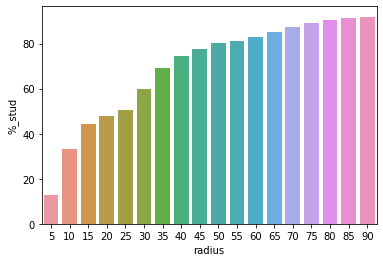

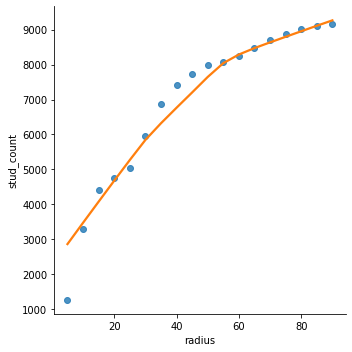

In [ ]:
import seaborn as sns 

sns.barplot(data=dsr_df, x="radius", y="%_stud")
            #title='Student Count Within Radius Distance from CSUSM')

sns.lmplot(data=dsr_df, x="radius", y="stud_count", 
           lowess=True, line_kws={"color": "C1"})

print("Student Count within each Radius Distance from CSUSM")

80% of the students live within 50 miles from campus

Park and Ride Locations near CSUSM Campus (San Diego, Orange, and Riverside Counties)

Reference: https://dot.ca.gov/programs/traffic-operations/park-ride

file: 
https://dot.ca.gov/-/media/dot-media/programs/traffic-operations/documents/managed-lanes/park-ride-inventory-external-aug21-a11y.pdf

Districts: 
    
    District 1: Del Norte, Humbolt, Lake, Mendocino
    District 2: Lassen, Modoc, Plumas, Shasta, Siskiyou, Tehama, Trinity
    District 3: Butte, Colusa, El Dorado, Glenn, Nevada, Placer, Sacramento, Sierra, Sutter, Yolo, Yuba
    District 4: Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo,Santa Clara, Solano, Sonoma
    District 5: Moterey, San Benito, San Luis Obispo, Santa Barbara, Santa Cruz
    District 6: Fresno, Kern, King, Madera, Tulare
    District 7: Los Angeles, Ventura
    District 8: Riverside, San Bernardino
    District 9: Inyo, Mono
    District 10: Alpine, Amador, Calaveras, Mariposa, Merced, San Joaquin, Stanislaus, Tuolumne
    District 11: Imperial, San Diego
    District 12: Orange

In [ ]:
import pandas as pd

# Get Park&Ride locations 
park_ride_df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/park-ride-inventory-external-aug21-a11y.xlsx') # File with Park&Ride locations in CA
print('park_ride_df\n')
print(park_ride_df.columns, '\n')
print(park_ride_df.sample(1), '\n')

park_ride_df

Index(['DISTRICT', 'LOT #', 'LOT ID #', 'ROUTE', 'COUNTY',
       'PARK AND RIDE NAME', 'ADDRESS', 'PM Prefix', 'POST MILE', 'Latitude',
       'Longitude', 'CITY', 'ZIP CODE', '# OF BIKE LOCKERS', '# OF SPACES',
       'EV Chargers'],
      dtype='object') 

    DISTRICT LOT # LOT ID # ROUTE COUNTY PARK AND RIDE NAME  \
156        7    24      724   105     LA             AVALON   

                 ADDRESS PM Prefix POST MILE   Latitude   Longitude  \
156  I-105 @ AVALON BLVD         R      8.37  33.928178 -118.262942   

            CITY ZIP CODE # OF BIKE LOCKERS # OF SPACES EV Chargers  
156  LOS ANGELES    90059                 0         160        None   



In [ ]:
park_ride_df.rename(columns={'ZIP CODE': 'ZIP_CODE'}, inplace=True)
park_ride_df["ZIP_CODE"]= park_ride_df["ZIP_CODE"].values.astype('str')
print(park_ride_df.info())
print(park_ride_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DISTRICT            301 non-null    object
 1   LOT #               301 non-null    object
 2   LOT ID #            301 non-null    object
 3   ROUTE               301 non-null    object
 4   COUNTY              301 non-null    object
 5   PARK AND RIDE NAME  301 non-null    object
 6   ADDRESS             301 non-null    object
 7   PM Prefix           301 non-null    object
 8   POST MILE           301 non-null    object
 9   Latitude            301 non-null    object
 10  Longitude           301 non-null    object
 11  CITY                301 non-null    object
 12  ZIP_CODE            301 non-null    object
 13  # OF BIKE LOCKERS   301 non-null    object
 14  # OF SPACES         301 non-null    object
 15  EV Chargers         301 non-null    object
dtypes: object(16)
memory usage

In [ ]:
# Latitude and Longitude must be Float

index_lst = []
for index, row in park_ride_df.iterrows():
    if type(row['Latitude']) is not (float):
        index_lst.append(index)

print(index_lst)

[88, 177, 266]


In [ ]:
park_ride_df.drop(index= index_lst, inplace=True)
park_ride_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 300
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DISTRICT            298 non-null    object
 1   LOT #               298 non-null    object
 2   LOT ID #            298 non-null    object
 3   ROUTE               298 non-null    object
 4   COUNTY              298 non-null    object
 5   PARK AND RIDE NAME  298 non-null    object
 6   ADDRESS             298 non-null    object
 7   PM Prefix           298 non-null    object
 8   POST MILE           298 non-null    object
 9   Latitude            298 non-null    object
 10  Longitude           298 non-null    object
 11  CITY                298 non-null    object
 12  ZIP_CODE            298 non-null    object
 13  # OF BIKE LOCKERS   298 non-null    object
 14  # OF SPACES         298 non-null    object
 15  EV Chargers         298 non-null    object
dtypes: object(16)
memory usage

In [ ]:
park_ride_df.columns

Index(['DISTRICT', 'LOT #', 'LOT ID #', 'ROUTE', 'COUNTY',
       'PARK AND RIDE NAME', 'ADDRESS', 'PM Prefix', 'POST MILE', 'Latitude',
       'Longitude', 'CITY', 'ZIP_CODE', '# OF BIKE LOCKERS', '# OF SPACES',
       'EV Chargers'],
      dtype='object')

In [ ]:
# Drop all unnecessary columns
columns_lst = ['LOT #', 'ROUTE', 'PM Prefix', 'POST MILE',
               '# OF BIKE LOCKERS', '# OF SPACES','EV Chargers']
park_ride_df.drop(columns= columns_lst, inplace= True)

park_ride_df.columns

Index(['DISTRICT', 'LOT ID #', 'COUNTY', 'PARK AND RIDE NAME', 'ADDRESS',
       'Latitude', 'Longitude', 'CITY', 'ZIP_CODE'],
      dtype='object')

In [ ]:
park_ride_df.rename(columns={'LOT ID #': 'LOT_ID'}, inplace=True)

In [ ]:
park_ride_df.rename(columns={'PARK AND RIDE NAME': 'NAME'}, inplace=True)

In [ ]:
# Rearrange columns' order
columns_lst = ['LOT_ID','ZIP_CODE','DISTRICT', 'COUNTY', 'CITY','NAME', 'ADDRESS', 'Latitude',
       'Longitude']
park_ride_df = park_ride_df.reindex(columns= columns_lst)
park_ride_df.sample(2)

LOT_ID ZIP_CODE DISTRICT COUNTY         CITY              NAME  \
43     446    95661        3    PLA    ROSEVILLE        MAIDU PARK   
230   1101    91977       11     SD  CASA DE ORO  AGUA DULCE BLVD.   

                                               ADDRESS   Latitude   Longitude  
43                     MAIDU DRIVE @ ROCKY RIDGE DRIVE  38.734352 -121.252671  
230  3642 AGUA DULCE BLVD - NE QUAD SR 94 / SWEETWA...  32.745119 -116.974555

In [ ]:
park_ride_df['Latitude'] = pd.to_numeric(park_ride_df['Latitude'])
park_ride_df['Longitude'] = pd.to_numeric(park_ride_df['Longitude'])
park_ride_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 300
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOT_ID     298 non-null    object 
 1   ZIP_CODE   298 non-null    object 
 2   DISTRICT   298 non-null    object 
 3   COUNTY     298 non-null    object 
 4   CITY       298 non-null    object 
 5   NAME       298 non-null    object 
 6   ADDRESS    298 non-null    object 
 7   Latitude   298 non-null    float64
 8   Longitude  298 non-null    float64
dtypes: float64(2), object(7)
memory usage: 23.3+ KB


In [ ]:
# Save clean park ride inventory file
file_name = 'park_ride_caltrans_inventory.csv'
upload_csv_to_gdrive(park_ride_df, file_name)
download_as_csv(park_ride_df, file_name)

Uploaded to Google Drive on 2022-11-15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-15


In [ ]:
park_ride_df['DISTRICT']= park_ride_df['DISTRICT'].astype(str)
park_ride_df['DISTRICT'].dtype

dtype('O')

Limit the Park & Ride locations to the districts of the Southern Californoa Region, which incorporates the San Diego, Imperial, Riverside, San Bernardino, and Orange counties.

In [ ]:
# Keep districts 8, 11, and 12
districts = ['8', '11', '12']
park_ride_df = park_ride_df[(park_ride_df['DISTRICT'].isin(districts))]
park_ride_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 190 to 300
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOT_ID     106 non-null    object 
 1   ZIP_CODE   106 non-null    object 
 2   DISTRICT   106 non-null    object 
 3   COUNTY     106 non-null    object 
 4   CITY       106 non-null    object 
 5   NAME       106 non-null    object 
 6   ADDRESS    106 non-null    object 
 7   Latitude   106 non-null    float64
 8   Longitude  106 non-null    float64
dtypes: float64(2), object(7)
memory usage: 8.3+ KB


In [ ]:
file_name = 'park_ride.csv'
upload_csv_to_gdrive(park_ride_df, file_name)
download_as_csv(park_ride_df, file_name)

Uploaded to Google Drive on 2022-11-15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-15


Get locations using Google API - Nominatin cannot handle Park&Ride incomplete information

Not necessary with the Caltrans file, which has the complete location info with latitude and longitude

In [ ]:
# DO NOT RUN, Caltrans file already has coordinates

ind = 0
for row in park_ride_df.itertuples():
    #print(row)
    address = str(row[2]) + ", " + str(row[3]) # 2 = Address, 3 = City, 4 = zip
    address += ", " + str(row[4]) 
    #print(address, '\n')
    addr, latit, longit = get_location_from(address) # using the Google Maps API
    #print("Latitude:", latit, "Longitude:", longit, '\n')
    park_ride_df.at[ind,'Latitude'] = latit
    park_ride_df.at[ind,'Longitude'] = longit
    ind += 1

print("done")
error_df = park_ride_df.loc[park_ride_df['Latitude'] == 0]
print(error_df)

In [ ]:
park_ride_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 190 to 300
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DISTRICT            106 non-null    object
 1   LOT #               106 non-null    object
 2   LOT ID #            106 non-null    object
 3   ROUTE               106 non-null    object
 4   COUNTY              106 non-null    object
 5   PARK AND RIDE NAME  106 non-null    object
 6   ADDRESS             106 non-null    object
 7   PM Prefix           106 non-null    object
 8   POST MILE           106 non-null    object
 9   Latitude            106 non-null    object
 10  Longitude           106 non-null    object
 11  CITY                106 non-null    object
 12  ZIP                 106 non-null    object
 13  # OF BIKE LOCKERS   106 non-null    object
 14  # OF SPACES         106 non-null    object
 15  EV Chargers         106 non-null    object
dtypes: object(16)
memory usa

Plot using Folium

In [ ]:
import pandas as pd
close_loc_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/stud_CA_locations.csv')
park_ride_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/park_ride.csv')

In [ ]:
close_loc_df.sample(2)

Unnamed: 0  postal_code country_code      place_name  state_name  \
584         584        91351           US  Canyon Country  California   
632         632        94556           US          Moraga  California   

    state_code   county_name  county_code  community_name  community_code  \
584         CA   Los Angeles         37.0             NaN             NaN   
632         CA  Contra Costa         13.0             NaN             NaN   

     latitude  longitude  accuracy     stud_list  stud_count  fips    distance  
584   34.4262  -118.4490       4.0  [6606, 7965]           2  6037  116.248894  
632   37.8437  -122.1242       4.0        [7395]           1  6013  428.942903

In [ ]:
close_loc_df.columns

Index(['Unnamed: 0', 'postal_code', 'country_code', 'place_name', 'state_name',
       'state_code', 'county_name', 'county_code', 'community_name',
       'community_code', 'latitude', 'longitude', 'accuracy', 'stud_list',
       'stud_count', 'fips', 'distance'],
      dtype='object')

In [ ]:
columns_lst = ['Unnamed: 0','country_code','county_code','state_name','community_name',
       'community_code','accuracy']
close_loc_df.drop(columns=columns_lst, inplace=True)

In [ ]:
close_loc_df.sample(2)

postal_code place_name state_code county_name  latitude  longitude  \
38         91942    La Mesa         CA   San Diego   32.7835  -117.0189   
297        92880     Corona         CA   Riverside   33.9208  -117.6096   

                                             stud_list  stud_count  fips  \
38   [70, 73, 799, 827, 1269, 1463, 1871, 2327, 278...          24  6073   
297  [2022, 2454, 3070, 3161, 4200, 4493, 5193, 535...          18  6065   

      distance  
38   25.262481  
297  60.509753

In [ ]:
# All zip code locations within the threshold distance to campus with student count
dist= 90.0 # radius in miles

limit_radius(close_loc_df, dist) # call the helper fucntion
close_loc_df.head(5)

There are 9148 students from 392 locations within 90 mile radius from CSUSM


postal_code   place_name state_code     county_name  latitude  longitude  \
285        92345     Hesperia         CA  San Bernardino   34.4222  -117.3025   
71         90062  Los Angeles         CA     Los Angeles   34.0032  -118.3073   
656        91106     Pasadena         CA     Los Angeles   34.1435  -118.1266   
212        90301    Inglewood         CA     Los Angeles   33.9550  -118.3556   
736        90009  Los Angeles         CA     Los Angeles   34.0522  -118.2437   

              stud_list  stud_count  fips   distance  
285  [1870, 3067, 3689]           3  6071  89.677391  
71                [175]           1  6037  89.521986  
656        [8011, 8013]           2  6037  89.473293  
212        [1381, 7296]           2  6037  89.450966  
736              [9638]           1  6037  89.225605

In [ ]:
file_name = 'close_loc_90.csv'
upload_csv_to_gdrive(close_loc_df, file_name)
download_as_csv(close_loc_df, file_name )

Uploaded to Google Drive on 2022-11-13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-13


In [ ]:
# Using folium
import folium

map = folium.Map(location=[33.1298, -117.1587], default_zoom_start=100)

tooltip = "Click Here For More Info"

# Add a marker for the main campus
marker = folium.Marker(
    location=[33.1298, -117.1587],
    popup="<stong>CSUSM</stong>",
    tooltip=tooltip, 
    icon=folium.Icon(color="green"),
    ).add_to(map)

marker = folium.CircleMarker(
    location=[33.1298, -117.1587],
    radius=200,
    popup="CSUSM",
    color="green",
    fill=True,
    fill_color="green",
    ).add_to(map)

# Add a marker for each student zip code in CA
for ind in close_loc_df.index:
    latit = close_loc_df['latitude'][ind]
    longit = close_loc_df['longitude'][ind]
    name = close_loc_df['place_name'][ind]
    county = close_loc_df['county_name'][ind]
    zip = close_loc_df['postal_code'][ind]
    std_ct = close_loc_df['stud_count'][ind]
    dist = close_loc_df['distance'][ind]
    text = name + ", " + county + "\nZip: "+ str(zip) + " \n# Stud: "+ str(std_ct) +"\nDist: "+ "{:.2f}".format(dist)

    folium.Marker(
        location=[latit, longit],
        popup= text, min_width=600,
        icon= folium.Icon(prefix='fa', icon= "home")
        ).add_to(map)

# Add a marker for each park and ride location 
for ind in park_ride_df.index:
    latit = park_ride_df['Latitude'][ind]
    longit = park_ride_df['Longitude'][ind]
    zip = park_ride_df['ZIP'][ind]
    name= park_ride_df['PARK AND RIDE NAME'][ind]
    spaces = park_ride_df['# OF SPACES'][ind]

    text= str(name) + "\nZip: "+ str(zip) + '\n# Spaces: ' + str(spaces)

    marker = folium.Marker(
        location = [latit, longit],
        popup = text, min_width=600,
        icon = folium.Icon(color="lightgray", prefix='fa',icon= 'car'),
        ).add_to(map)



map

In [ ]:
# Save html map
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/folium/folium_map.html'
map.save(file_path)

# Create a graph of nodes to find paths to/from campus from/to each location (zip code)


Open Street Map
Creates and distributes free geographic data for the world. 

OSMnx is a Python package that lets you download geospatial data from OpenStreetMap and model, project, visualize, and analyze real-world street networks and any other geospatial geometries.

Reference: Boeing, G. 2017. OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

In [ ]:
# Trying to solve the problem with ploting OSMnx with a different version of matplotlib
!pip uninstall matplotlib 

# Then, install the stable version
!pip install -U matplotlib 

# Restart runtime when done

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

In [ ]:
# Intall osmnx, networkx and geopandas

!pip install osmnx
!pip install networkx
!pip install geopandas
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.8 MB/s 
     |████████████████████████████████| 1.0 MB 26.6 MB/s 
     |████████████████████████████████| 6.3 MB 48.3 MB/s 
     |████████████████████████████████| 11.2 MB 47.7 MB/s 
     |████████████████████████████████| 1.0 MB 57.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 16.7 MB 50.4 MB/s 
     |████████████████████████████████| 965 kB 62.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# source: https://github.com/gboeing/osmnx-examples/blob/main/notebooks/01-overview-osmnx.ipynb
from datetime import timedelta

import geopandas as gpd
import osmnx as ox
import networkx as nx
from geopy.geocoders import Nominatim


%matplotlib inline
ox.__version__

geolocator = Nominatim(user_agent="carpool")

ox.config(use_cache=True, log_console=True)

Create network drive graphs for counties around CSUSM

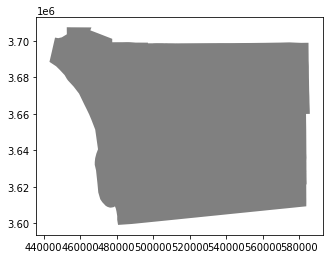

In [ ]:
# get the boundary polygon for San Diego County, project it, and plot it
graph_area = ox.geocode_to_gdf("San Diego County, California, USA")
area_proj = ox.project_gdf(graph_area)
ax = area_proj.plot(fc="gray", ec="none")
#ax = ax.axis("off")

In [ ]:
G_sd = ox.graph_from_place('San Diego County, California, USA')

# save the graph
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_county.graphml'
ox.save_graphml(G_sd, filepath=file_path)

San Diego county


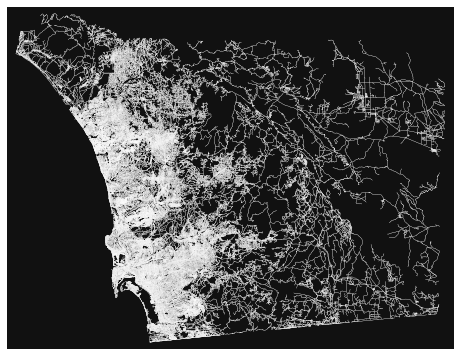

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
print('San Diego county')
G_sd = ox.load_graphml('/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_county.graphml')
ox.plot_graph(G_sd, node_size=0, edge_color='w', edge_linewidth=0.2)

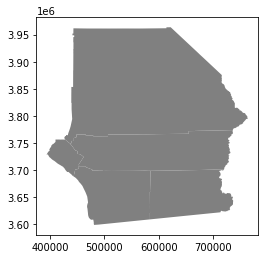

In [ ]:
# get boundary polygons for several cities,  project to UTM, and plot
place_names = [
    "San Diego County, California, USA",
    "Riverside County, California, USA",
    "Orange County, California, USA",
    "Imperial County, California, USA",
    "San Bernardino County, CA, USA",
]
southwestCA = ox.geocode_to_gdf(place_names)
southwestCA = ox.project_gdf(southwestCA)

ax = southwestCA.plot(fc="gray", ec="none")
#_ = ax.axis("off")


In [ ]:
southwestCA.type


0    Polygon
1    Polygon
2    Polygon
3    Polygon
4    Polygon
dtype: object

In [ ]:
G_sw = ox.graph_from_place(place_names, network_type='drive')

# save into a file
print('saving...')
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_orange_river_sb_imp.graphml'
ox.save_graphml(G_sw, filepath=file_path)
print('done')

In [ ]:
print('San Diego, Imperial, Orange, Riverside, and San Bernardino Counties')
#G_sw = ox.load_graphml('/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_orange_river_sb_imp.graphml')
ox.plot_graph(G_sw, node_size=0, edge_color='w', edge_linewidth=0.2)

San Diego, Imperial, Orange, Riverside, and San Bernardino Counties


NameError: ignored

In [ ]:
# graph counties from SW CA
place_names = [
    "San Diego County, California, USA",
    "Riverside County, California, USA",
    "Orange County, California, USA",
    "Imperial County, California, USA"
]
G = ox.graph_from_place(place_names, network_type='drive')

# save into a file
print('saving...')
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_orange_river_imp.graphml'
ox.save_graphml(G, filepath=file_path)
print('done')

saving...
done


San Diego, Orange, Riverside, and Imperial Counties


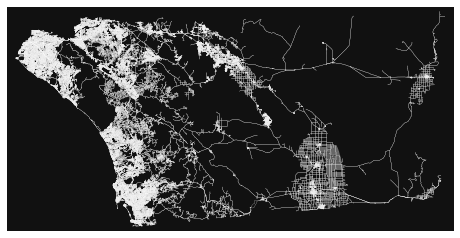

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
print('San Diego, Orange, Riverside, and Imperial Counties')
G = ox.load_graphml('/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_orange_river_imp.graphml')
ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2)

In [ ]:
place_names1 = [
    "San Diego County, California, USA",
    "Riverside County, California, USA",
]

G1 = ox.graph_from_place(place_names1, network_type='drive')

In [ ]:
# save the graph with SD and Riverside counties
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_riverside.graphml'
ox.save_graphml(G1, filepath=file_path)

In [ ]:
print('San Diego and Riverside Counties')
G1 = ox.load_graphml('/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_riverside.graphml')
ox.plot_graph(G1, node_size=0, edge_color='w', edge_linewidth=0.2)

In [ ]:
place_names2 = [
    "San Diego County, California, USA",
    "Orange County, California, USA"
]
G2 = ox.graph_from_place(place_names2, network_type='drive')

# save the graph with SD and Orange counties
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_orange.graphml'
ox.save_graphml(G2, filepath=file_path)
print('saved')

saved


In [ ]:
print('San Diego and Orange counties')
G2 = ok.load_graphml('/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_orange.graphml')
ox.plot_graph(G2, node_size=0, edge_color='w', edge_linewidth=0.2)

In [ ]:
place_names3 = [
    "San Diego County, California, USA",
    "Imperial County, California, USA"
]
G3 = ox.graph_from_place(place_names3, network_type='drive')
print('graph 3...')
# save the graph with SD and Imperial counties
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_imperial.graphml'
ox.save_graphml(G3, filepath=file_path)
print('saved')

graph 3...
saved


In [ ]:
print('San Diego and Imperial counties')
G3 = ox.load_graphml('/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_imperial.graphml')
ox.plot_graph(G3, node_size=0, edge_color='w', edge_linewidth=0.2)

In [ ]:
place_names4 = [
    "San Diego County, California, USA",
    "Orange County, California, USA",
    "Riverside County, California, USA",
]
G4 = ox.graph_from_place(place_names3, network_type='drive')
print('graph 4...')
# save the graph with SD, Orange, and Riverside counties
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_orange_riverside.graphml'
ox.save_graphml(G4, filepath=file_path)
print('saved')

graph 4...
saved


In [ ]:
print('San Diego, Orange, and Riverside counties')
G4 = ox.load_graphml('/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_orange_riverside.graphml')
ox.plot_graph(G4, node_size=0, edge_color='w', edge_linewidth=0.2)

In [ ]:
#save as GeoPackage
path= '/content/drive/MyDrive/Colab_Notebooks/Rideshare/geopackages/'
file_name= 'southwestCA.gpkg'
file_path = path + file_name
southwestCA.to_file(file_path, driver="GPKG")

In [ ]:
# create network from point, inside bounding box of N, S, E, W each 750m from point
csusm_point=(33.1298, 117.1587) #CSUSM main campus location
#G = ox.graph_from_point(csusm_point, dist=750, dist_type="bbox", network_type="drive")

# OR
# same point again, but create network only of nodes within 100000m (60miles) along the network from point
G_csusm = ox.graph_from_point(csusm_point, dist=100000, dist_type="bbox", network_type="drive") #dist in meters


In [ ]:
# Save graph to disk if you want to reuse it
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/csusm_60miles.graphml'
ox.save_graphml(G_csusm, filepath=file_path)


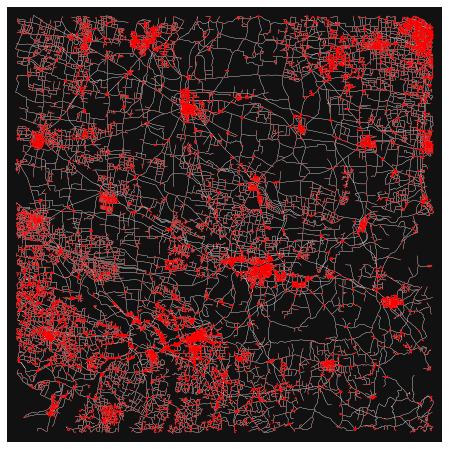

In [ ]:
G_csusm = load_graph('/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/csusm_60miles.graphml')

#fig, ax = ox.plot_graph(G_csusm, node_color="r", figsize(20,20), node_size=1, edge_color='w', edge_linewidth=0.2)
fig, ax = ox.plot_graph(G_csusm, node_color="w", node_size=1, edge_color='w', edge_linewidth=0.2)

In [ ]:
# Create a bounding box map within the coordinates
# From Covina on North, to Imperial Beach on South
# From Long Beach on West, to the end of SD county on East
G_box = ox.graph_from_bbox(north=34.201971, 
                           south=32.529999, 
                           east=-118.223883, 
                           west=-116.085241, 
                           network_type='drive'
                           )

# impute edge (driving) speeds and calculate edge traversal times
G_box = ox.add_edge_speeds(G_box)
G_box = ox.add_edge_travel_times(G_box)

In [ ]:
# save the graph
print('saving...')
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/box.graphml'
ox.save_graphml(G_box, filepath=file_path)
print('done')

saving...
done


In [ ]:
# save graph as geopackage
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/geopackages/box.gpkg'
ox.save_graph_geopackage(G_box, filepath=file_path)

In [ ]:
# save graph as shapefile (WARNING: field osmid has been truncated to 254 characters)
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/box_shapefile/'
ox.save_graph_shapefile(G_box, filepath=file_path)

# Column names longer than 10 characters will be truncated
# 'street_count' to 'street_cou'
# 'travel_time' to 'travel_tim'

/usr/local/lib/python3.7/dist-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/usr/local/lib/python3.7/dist-packages/osmnx/io.py:109: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


In [ ]:
# Load the graph
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/box.graphml'
G_box = ox.load_graphml(file_path)


Road Network within the coordinates of:
	Covina on North, to Imperial Beach on South
	Long Beach on West, to the end of SD county on East


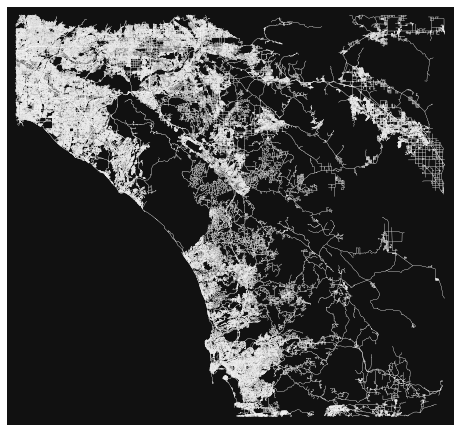

In [ ]:
# Plot the graph
print('''Road Network within the coordinates of:
\tCovina on North, to Imperial Beach on South
\tLong Beach on West, to the end of SD county on East''')
fig, ax = ox.plot_graph(G_box, node_size=0, edge_color='w', edge_linewidth=0.2)

Add Park & Ride into network

In [ ]:
# Park and ride points
import pandas as pd

file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/park_ride_caltrans_inventory.csv'
pr_df = pd.read_csv(file_path)

pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          298 non-null    int64  
 1   ZIP                 298 non-null    int64  
 2   DISTRICT            298 non-null    int64  
 3   COUNTY              298 non-null    object 
 4   CITY                298 non-null    object 
 5   PARK AND RIDE NAME  298 non-null    object 
 6   ADDRESS             298 non-null    object 
 7   Latitude            298 non-null    float64
 8   Longitude           298 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.1+ KB


In [ ]:
pr_df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP                 298 non-null    int64  
 1   DISTRICT            298 non-null    int64  
 2   COUNTY              298 non-null    object 
 3   CITY                298 non-null    object 
 4   PARK AND RIDE NAME  298 non-null    object 
 5   ADDRESS             298 non-null    object 
 6   Latitude            298 non-null    float64
 7   Longitude           298 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 18.8+ KB


In [ ]:
pr_df.sample(3)

DISTRICT  LOT #  LOT ID #  ROUTE COUNTY PARK AND RIDE NAME  \
68          4     11       411    680     CC            RUDGEAR   
128         6      9       609    155    KER      LAKE ISABELLA   
123         6      3       603    168    FRE       AUBERRY ROAD   

                                ADDRESS PM Prefix POST MILE   Latitude  \
68         S.E. quad. I-680/Rudgear Rd.    (none)      12.6  37.879595   
128  NW QUAD SR 178 INT @ LAKE ISABELLA         R      70.9  35.628850   
123    NE CNR INT SR 168 & AUBERRY ROAD         T     31.31  37.042853   

      Longitude           CITY  ZIP CODE  # OF BIKE LOCKERS  # OF SPACES  \
68  -122.048248   WALNUT CREEK     94596                  4           63   
128 -118.479590  LAKE ISABELLA     93240                  0           11   
123 -119.498822        AUBERRY     93602                  0           15   

    EV Chargers  
68         None  
128        None  
123        None

In [ ]:
pr_df.columns

Index(['ZIP', 'DISTRICT', 'COUNTY', 'CITY', 'PARK AND RIDE NAME', 'ADDRESS',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# for each row, append (lat,lng) to pr_points
pr_points = []

for index, row in pr_df.iterrows():
    lat = row['Latitude']
    lng = row['Longitude']
    pr_points.append( (lat, lng) )

print(len(pr_points))
print(pr_points[0])

298
(40.575225, -124.14793)


In [ ]:
# Find nearest node for each park and ride location within the G_box

import numpy as np
# Find closest nodes to the points

# boundaries 
north= 34.201971
south= 32.529999
east= -118.223883
west= -116.085241

pr_nodes = []
for point in pr_points:
    x = float(point[0])
    y = float(point[1])
    if (x < north and x > south) and (y < west and y > east):
        #print(point)
        nearest_node = ox.distance.nearest_nodes(G_box, x, y)
        pr_nodes.append(nearest_node)
    else:
        #print(point, 'out of boundaries')


In [ ]:
len(pr_nodes)

116

In [ ]:
pr_nodes

116 locations are within the G_box boundaries, however, the nearest_node always returns the same node

Get geometry using geopandas

In [ ]:
import geopandas as gpd

# pass a polygon from a shapefile, then downloads the network within its bounding box, 
# then prunes all nodes that lie outside the place's boundary polygon.

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Keep only California 06
keep_state = ['06']
geoData = geoData[geoData.STATE.isin(keep_state)]

# keep only sw counties San Diego, San Bernardino, Riverside, Orange, Imperial
keep_counties = ['San Diego', 'San Bernardino', 'Riverside', 'Orange', 'Imperial']
geoData= geoData[geoData.NAME.isin(keep_counties)]

# Save into a shapefile
geoData.to_file("/content/drive/MyDrive/Colab_Notebooks/Rideshare/CA_sw_counties_boundaries/ca_sw_counties.shp")


In [ ]:
geoData

In [ ]:
#Save as a geopackage
geoData.to_file("/content/drive/MyDrive/Colab_Notebooks/Rideshare/CA_sw_gpkg/sw_counties_package.gpkg", driver="GPKG")

In [ ]:
geoData = gpd.read_file('/content/drive/MyDrive/Colab_Notebooks/Rideshare/CA_sw_counties_boundaries/ca_sw_counties.shp')
polygon = geoData["geometry"].iloc[0]

sw_graph = ox.graph_from_polygon(polygon, network_type="drive")

# save to disk as GeoPackage file
#ox.save_graph_geopackage(sw_graph)


In [ ]:
# save graph to shapefile, geopackage, or graphml
#ox.save_graph_shapefile(G, filepath="./graph_shapefile/")
#ox.save_graph_geopackage(G, filepath="./graph.gpkg")
#ox.save_graphml(G, filepath="./graph.graphml")

file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/ca_sw_drive.graphml'
ox.save_graphml(sw_graph, filepath=file_path)

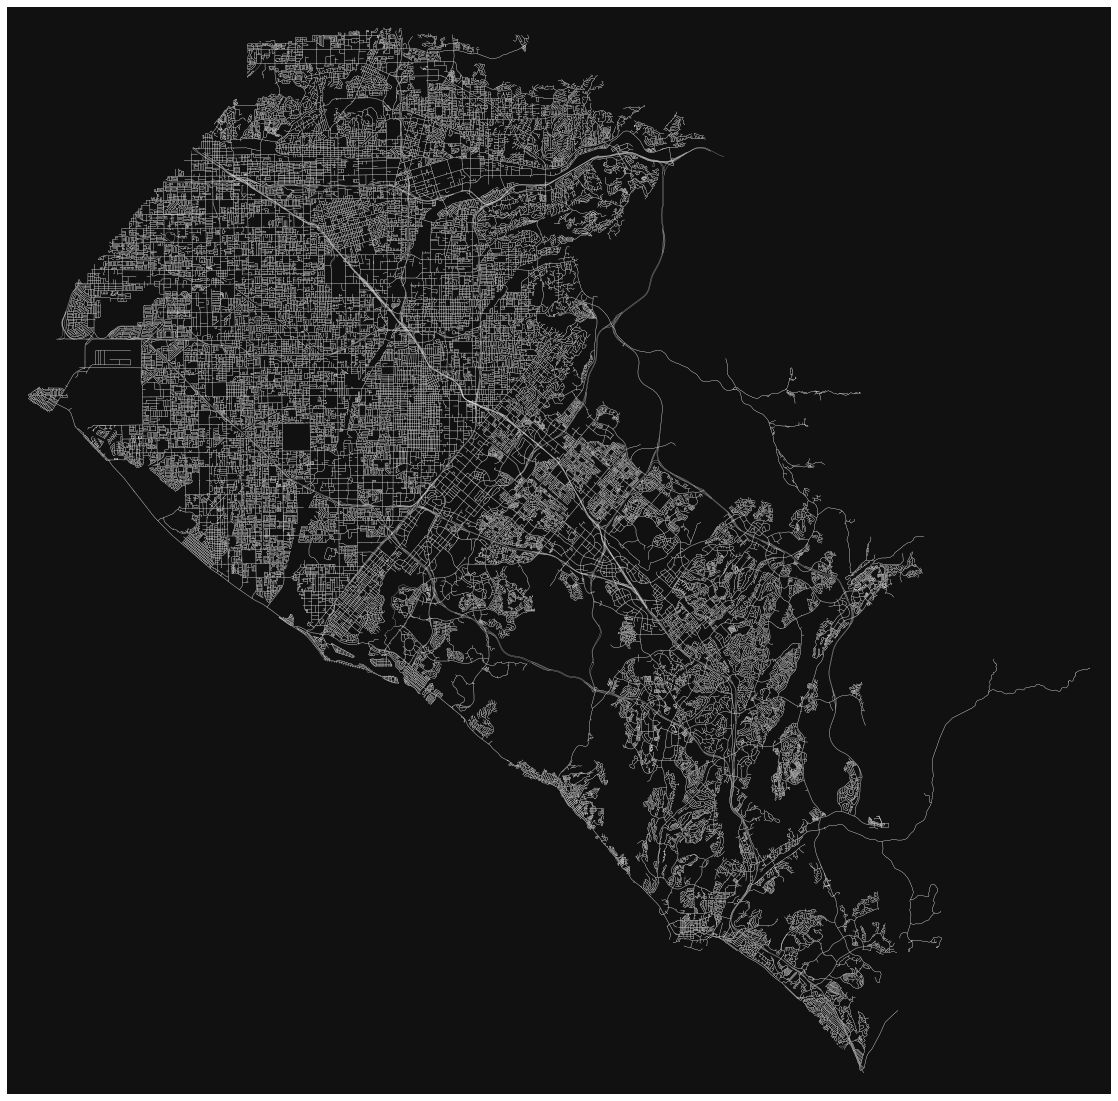

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/sd_orange_river_sb_imp.graphml'
G_sw = ox.load_graphml(file_path)
fig, ax = ox.plot_graph(G_sw, figsize=(20, 20), node_size=0, edge_color="w", edge_linewidth=0.2)

### Helper functions shortest_route to/from campus

In [ ]:
# Outbound

# Get the shortest path from origin to CSUSM
def shortest_route_to_csusm(graph, origin_lat, origin_lng):
    ''' Get a list with intermediary nodes of a route from origin to CSUSM
    Parameters: origin_lat: the y(latitude) coordinate
                origin_lng: the x(longitude) coordinate
                graph: the base network to find the route
    Return: a list of the shortest route by distance 
            a list of the shortest route by time
            travel time as a string
            total distance of the route in miles
    '''
    # X_longitude, Y_latitude from destination
    csusm = {'x': -117.1587, 'y': 33.1298}   
    # In the graph, get the nodes closest to the points
    destination_node = ox.distance.nearest_nodes(graph, X= csusm.get('x'), Y= csusm.get('y'))

    x = origin_lng # x(longitude)
    y = origin_lat # y(latitude)
    # In the graph, get the nodes closest to the points
    origin_node = ox.distance.nearest_nodes(graph, X= x, Y= y,)
    
    # Get the shortest route by distance and by time from origin to destination
    shortest_route_by_distance = ox.shortest_path(graph, origin_node, destination_node, weight='length')
    shortest_route_by_travel_time = ox.shortest_path(graph, origin_node, destination_node, weight='travel_time')

    # Get the travel time, in seconds
    # use "nx" (networkx), not "ox" (osmnx)
    try:
        travel_time_in_seconds = nx.shortest_path_length(graph, origin_node, destination_node, weight='travel_time')       
        # The travel time in "HOURS:MINUTES:SECONDS" format
        travel_time_str = str(timedelta(seconds=travel_time_in_seconds))
        # print('\tTravel time' , travel_time_str)
    except nx.NetworkXNoPath:
        travel_time_str= '00:00:00'
        print('Travel time cannot be computed from origin (%f,%f)' % (origin_lat, origin_lng))

    # Get the distance in meters
    try:
        distance_in_meters = nx.shortest_path_length(graph, origin_node, destination_node, weight='length')
        # Distance in kilometers and miles
        distance_in_kilometers = distance_in_meters / 1000
        distance_in_miles = distance_in_kilometers * 0.62137
        # print('\tDistance: %.2f Km or %.2f miles' % (distance_in_kilometers, distance_in_miles) )
    except nx.NetworkXNoPath:
        distance_in_miles = 0
        print('Path length cannot be computed from origin (%f,%f)' % (origin_lat, origin_lng))
    
    return shortest_route_by_distance, shortest_route_by_travel_time, travel_time_str, distance_in_miles

In [ ]:
# Return 

# Get the shortest path from CSUSM to destination
def shortest_route_from_csusm(graph, destination_lat, destination_lng):
    ''' Get a list with intermediary nodes of a route from CSUSM to destination
    Parameters: destination_lat: the y(latitude) coordinate
                destination_lng: the x(longitude) coordinate
                graph: the base network to find the route
    Return: a list of the shortest route by distance 
            a list of the shortest route by time
            travel time as a string
            total distance of the route in miles
    '''
    # X_longitude, Y_latitude from origin
    csusm = {'x': -117.1587, 'y': 33.1298}   
    # In the graph, get the nodes closest to the points
    origin_node = ox.distance.nearest_nodes(graph, X= csusm.get('x'), Y= csusm.get('y'))
    
    # Destination
    x = destination_lng # x(longitude)
    y = destination_lat # y(latitude)
    # In the graph, get the nodes closest to the points
    destination_node = ox.distance.nearest_nodes(graph, X= x, Y= y,)
    
    # Get the shortest route by distance and by time from origin to destination
    shortest_route_by_distance = ox.shortest_path(graph, origin_node, destination_node, weight='length')
    shortest_route_by_travel_time = ox.shortest_path(graph, origin_node, destination_node, weight='travel_time')

    # Get the travel time, in seconds
    # use "nx" (networkx), not "ox" (osmnx)
    try:
        travel_time_in_seconds = nx.shortest_path_length(graph, origin_node, destination_node, weight='travel_time')       
        # The travel time in "HOURS:MINUTES:SECONDS" format
        travel_time_str = str(timedelta(seconds=travel_time_in_seconds))
        # print('\tTravel time' , travel_time_str)
    except nx.NetworkXNoPath:
        travel_time_str= '00:00:00'
        print('Travel time cannot be computed from destination (%f,%f)' % (destination_lat, destination_lng))

    # Get the distance in meters
    try:
        distance_in_meters = nx.shortest_path_length(graph, origin_node, destination_node, weight='length')
        # Distance in kilometers and miles
        distance_in_kilometers = distance_in_meters / 1000
        distance_in_miles = distance_in_kilometers * 0.62137
        # print('\tDistance: %.2f Km or %.2f miles' % (distance_in_kilometers, distance_in_miles) )
    except nx.NetworkXNoPath:
        distance_in_miles = 0
        print('Path length cannot be computed from destination (%f,%f)' % (destination_lat, destination_lng))
    
    return shortest_route_by_distance, shortest_route_by_travel_time, travel_time_str, distance_in_miles

In [ ]:
# convert string into list helper function for the next funciton
def convert(string):
    ''' Receives a list in a string format and converts it back to a list'''
    li = list(string.split(","))
    first = li[0]
    last = li[-1]

    if (first[0] == '['): 
        first = first[1:]
        li[0] = first
    if (last[-1] == ']'): 
        last = last[:-1] 
        li[-1] = last

    return li

In [ ]:
def find_zips_on_route(graph, route):
    ''' Retrieve coordinates from nodes on the route, then find zip codes for each coord
        Return: set of zip codes on the route
    '''

    route_lst = convert(route) #convert from str to list
    path_coordinates = []

    for node in route_lst:
        node = int(node) #make sure the node is a number

        # get node attributes in the Graph using
        lat = graph.nodes[node]['y']
        lng = graph.nodes[node]['x']        
        path_coordinates.append((lat,lng))

    # create a list zip codes on the route (whe need to preserve the order)
    path_zip_codes = []

    for coord in path_coordinates:
        try:
            location = geolocator.reverse(coord)
            #print('postal code:', location.raw['address']['postcode'])
            path_zip_codes.append(location.raw['address']['postcode'])
        except:
            print('Location:', location)
            print("Postal code not found for node ", node)

    # keep only unique values into the list
    path_zip_codes = list(dict.fromkeys(path_zip_codes)) 

    print(path_zip_codes)
    return path_zip_codes


Plot routes

In [ ]:
# Retrieve the drive network graph within the 'box'
graph_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/box.graphml'

# Load the graph
G = ox.load_graphml(graph_path)

# impute edge (driving) speeds and calculate edge traversal times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

Road Network


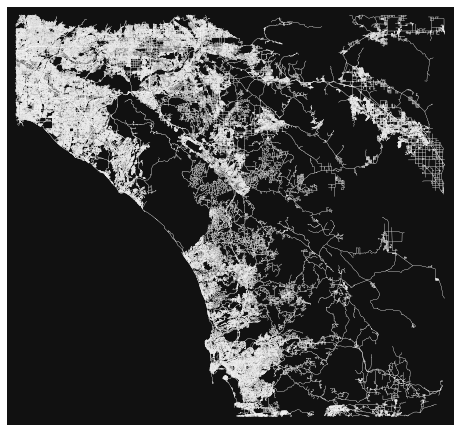

In [ ]:
# Plot the graph
print("Road Network")
fig, ax = ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2)

In [ ]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [ ]:
# Two pairs of (lat,lng) coordinates
csusm_coordinates= (33.1298, 117.1587)

# If you want to take an address (osmx will use Nominatim service for this)
# origin_coordinates = ox.geocode("2 Broad St, New York, NY 10005")

# X_longitude, Y_latitude from origin and destination
csusm = {'x': -117.1587, 'y': 33.1298}   # destination
places = {'Imperial_Beach': {'x': -117.125262 , 'y': 32.573069},
          'San_Clemente': {'x': -117.623257 , 'y': 33.478213},
          'Perris': {'x': -117.201214, 'y': 33.801501},
          'Lake_Elsinore': {'x': -117.373108, 'y': 33.688027},
          'Temecula': {'x': -117.095584, 'y': 33.518082},
          'Valley_Center': {'x': -117.052282 , 'y': 33.239219},
          'Camp_Pendleton': {'x': -117.325166, 'y': 33.307958},
          'Murieta': {'x': -117.573807, 'y': 33.573807},
          'Poway': {'x': -117.034553, 'y': 32.956003},
          'Clairemont': {'x': -117.178472, 'y': 32.833134},
          'La_Mesa': {'x': -117.018894, 'y': 32.777229},
          'Chula_vista': {'x': -117.020472, 'y': 32.623475},
          'Hemet': {'x': -117.031287, 'y': 33.729507},
          'Spring_Valley': {'x': -116.959869, 'y': 32.713867},
          'Carmel_Valley': {'x': -117.237230, 'y': 32.947056},
          'La_Jolla': {'x': -117.273124, 'y': 32.839922 },
          'Linda_Vista': {'x': -117.167411, 'y': 32.788932},
          'Point_Loma': {'x': -117.230682, 'y': 32.749258},
          'Black_Mountain': {'x': -117.153679, 'y':32.997159},
          'Corona': {'x': -117.566036, 'y': 33.868710},
          'Lake_Forest': {'x': -117.654832, 'y': 33.657903},
          'Covina': {'x': -117.876011, 'y':34.060988},
          'Alpine': {'x': -116.760323, 'y': 32.816748},
          'Campo': {'x': -116.473171, 'y': 32.645719},
          'Ramona': {'x': -116.787571, 'y': 33.001512},
          'Borrego_Springs': {'x':-116.380948, 'y': 33.227980}
}

In [ ]:
# Test the function shortest_route_to_csusm
all_origins = []
all_routes_by_dist = []
all_routes_by_time = []
all_travel_time = []
all_total_dist = []

for origin in places:
    origin_lat = places[origin].get('y')
    origin_lng = places[origin].get('x')
    route_by_dist, route_by_time, travel_time, total_dist = shortest_route_to_csusm(G,origin_lat, origin_lng)
    all_origins.append(origin)
    all_routes_by_dist.append(route_by_dist)
    all_routes_by_time.append(route_by_time)
    all_travel_time.append(travel_time)
    all_total_dist.append(total_dist)

print('done')

done


In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Origin", "Travel Time", 'Travel Distance']
i = 0 # iterator
for origin, time, dist in zip(all_origins, all_travel_time, all_total_dist): 
    time = time[:7].zfill(8)
    dist = '%.2f miles' % dist
    x.add_row([ origin, time, dist ])

print(x)

+-----------------+-------------+-----------------+
|      Origin     | Travel Time | Travel Distance |
+-----------------+-------------+-----------------+
|  Imperial_Beach |   00:46:07  |   46.04 miles   |
|   San_Clemente  |   00:43:04  |   42.05 miles   |
|      Perris     |   00:51:56  |   52.27 miles   |
|  Lake_Elsinore  |   00:46:53  |   48.27 miles   |
|     Temecula    |   00:32:22  |   32.55 miles   |
|  Valley_Center  |   00:19:50  |   15.39 miles   |
|  Camp_Pendleton |   00:20:25  |   15.99 miles   |
|     Murieta     |   00:52:35  |   52.39 miles   |
|      Poway      |   00:20:18  |   17.69 miles   |
|    Clairemont   |   00:29:31  |   28.31 miles   |
|     La_Mesa     |   00:34:06  |   34.71 miles   |
|   Chula_vista   |   00:41:35  |   42.36 miles   |
|      Hemet      |   00:49:38  |   49.26 miles   |
|  Spring_Valley  |   00:40:58  |   40.07 miles   |
|  Carmel_Valley  |   00:25:06  |   18.76 miles   |
|     La_Jolla    |   00:35:00  |   28.06 miles   |
|   Linda_Vi

Routes to CSUSM by Distance


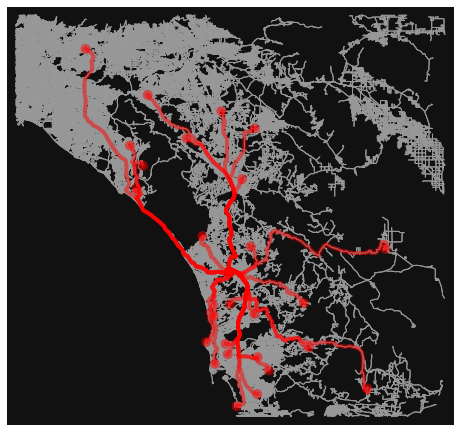

Routes to CSUSM by Travel Time


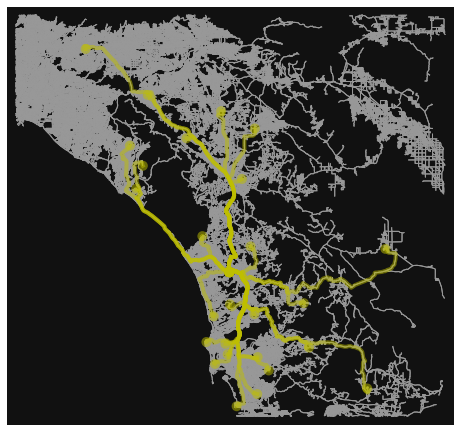

In [ ]:
# Plot the routes
print("Routes to CSUSM by Distance")
fig, ax = ox.plot_graph_routes(G, routes= all_routes_by_dist, route_colors= 'r', route_linewidth=2, node_size=0)

print("Routes to CSUSM by Travel Time")
fig, ax = ox.plot_graph_routes(G, routes= all_routes_by_time, route_colors= 'y', route_linewidth=2, node_size=0)


In [ ]:
# Test the function shortest_route_from_csusm
all_origins = []
all_routes_by_dist = []
all_routes_by_time = []
all_travel_time = []
all_total_dist = []

for origin in places:
    dest_lat = places[origin].get('y')
    dest_lng = places[origin].get('x')
    route_by_dist, route_by_time, travel_time, total_dist = shortest_route_from_csusm(G,dest_lat, dest_lng)
    all_origins.append(origin)
    all_routes_by_dist.append(route_by_dist)
    all_routes_by_time.append(route_by_time)
    all_travel_time.append(travel_time)
    all_total_dist.append(total_dist)

print('done')

done


In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Destination", "Travel Time", 'Travel Distance']
i = 0 # iterator
for origin, time, dist in zip(all_origins, all_travel_time, all_total_dist): 
    time = time[:7].zfill(8)
    dist = '%.2f miles' % dist
    x.add_row([ origin, time, dist ])

print(x)

+-----------------+-------------+-----------------+
|   Destination   | Travel Time | Travel Distance |
+-----------------+-------------+-----------------+
|  Imperial_Beach |   00:45:55  |   45.90 miles   |
|   San_Clemente  |   00:43:16  |   41.87 miles   |
|      Perris     |   00:50:50  |   52.40 miles   |
|  Lake_Elsinore  |   00:47:18  |   48.99 miles   |
|     Temecula    |   00:32:49  |   32.69 miles   |
|  Valley_Center  |   00:19:57  |   15.34 miles   |
|  Camp_Pendleton |   00:21:12  |   16.23 miles   |
|     Murieta     |   00:52:57  |   52.28 miles   |
|      Poway      |   00:20:14  |   17.86 miles   |
|    Clairemont   |   00:29:13  |   27.98 miles   |
|     La_Mesa     |   00:34:13  |   34.70 miles   |
|   Chula_vista   |   00:41:48  |   42.50 miles   |
|      Hemet      |   00:50:32  |   49.34 miles   |
|  Spring_Valley  |   00:40:58  |   40.00 miles   |
|  Carmel_Valley  |   00:25:55  |   19.35 miles   |
|     La_Jolla    |   00:34:48  |   28.01 miles   |
|   Linda_Vi

Routes from CSUSM by Distance


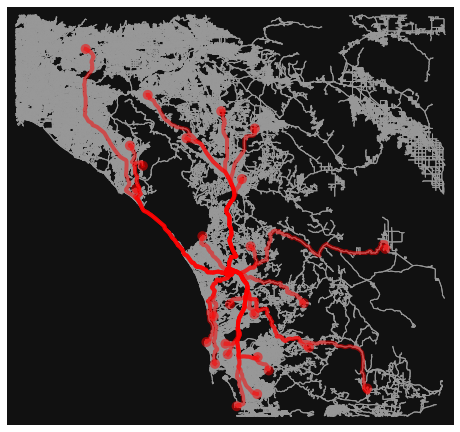

Routes from CSUSM by Travel Time


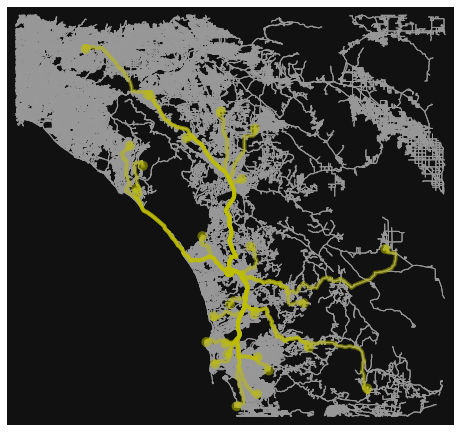

In [ ]:
# Plot the routes
print("Routes from CSUSM by Distance")
fig, ax = ox.plot_graph_routes(G, routes= all_routes_by_dist, route_colors= 'r', route_linewidth=2, node_size=0)

print("Routes from CSUSM by Travel Time")
fig, ax = ox.plot_graph_routes(G, routes= all_routes_by_time, route_colors= 'y', route_linewidth=2, node_size=0)


Google Directions API 

In [ ]:
# TODO

def create_route(origin):
    ''' Create a route to campus from origin location
    Return: route path as an array of coordinates latitude/longitude pairs
    '''
    csusm_campus = (33.1298, 117.1587) # CRS Coordinate Reference System (latid, longit)
    
    





## Create the routes from zip location as origin to campus

Get stud_CA_locations from file

In [ ]:
import pandas as pd

# All CA zip code locations with student list and student count
file_path= '/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/close_loc_90.csv'
close_loc_df = pd.read_csv(file_path)
close_loc_df.shape

(392, 11)

In [ ]:
close_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   392 non-null    int64  
 1   postal_code  392 non-null    int64  
 2   place_name   392 non-null    object 
 3   state_code   392 non-null    object 
 4   county_name  392 non-null    object 
 5   latitude     392 non-null    float64
 6   longitude    392 non-null    float64
 7   stud_list    392 non-null    object 
 8   stud_count   392 non-null    int64  
 9   fips         392 non-null    int64  
 10  distance     392 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 33.8+ KB


In [ ]:
close_loc_df.sample(3)

Unnamed: 0  postal_code   place_name state_code  county_name  latitude  \
283           6        92596   Winchester         CA    Riverside   33.6243   
63          692        90601     Whittier         CA  Los Angeles   34.0011   
158          79        92683  Westminster         CA       Orange   33.7524   

     longitude                                          stud_list  stud_count  \
283  -117.0885  [8, 151, 173, 292, 420, 424, 427, 442, 533, 55...         139   
63   -118.0371                                             [8721]           1   
158  -117.9939                            [227, 5158, 8081, 8945]           4   

     fips   distance  
283  6065  34.405936  
63   6037  78.622711  
158  6059  64.569471

In [ ]:
close_loc_df.columns

Index(['Unnamed: 0', 'postal_code', 'place_name', 'state_code', 'county_name',
       'latitude', 'longitude', 'stud_list', 'stud_count', 'fips', 'distance'],
      dtype='object')

In [ ]:
columns_lst = ['Unnamed: 0']
close_loc_df.drop(columns=columns_lst, inplace=True)

In [ ]:
print("%d CA zip codes with %d students" % 
      (close_loc_df.shape[0], close_loc_df['stud_count'].sum()) ) 

close_loc_df.rename(columns={'state_code':'state'}, inplace=True)
close_loc_df.sample(3)

392 CA zip codes with 9148 students


postal_code   place_name state  county_name  latitude  longitude  \
63         90601     Whittier    CA  Los Angeles   34.0011  -118.0371   
296        92536      Aguanga    CA    Riverside   33.4473  -116.7997   
242        92630  Lake Forest    CA       Orange   33.6437  -117.6868   

                                             stud_list  stud_count  fips  \
63                                              [8721]           1  6037   
296                                 [3968, 6662, 7652]           3  6065   
242  [391, 592, 594, 908, 947, 1185, 1491, 1934, 22...          22  6059   

      distance  
63   78.622711  
296  30.185378  
242  46.786349

Get locations within distance treshold to campus

In [ ]:
# All zip code locations within the threshold distance to campus with student count
dist= 90.0 # radius in miles

limit_radius(close_loc_df, dist) # call the helper fucntion
close_loc_df.head(5)

There are 9148 students from 392 locations within 90 mile radius from CSUSM


postal_code   place_name state     county_name  latitude  longitude  \
0        92345     Hesperia    CA  San Bernardino   34.4222  -117.3025   
1        90062  Los Angeles    CA     Los Angeles   34.0032  -118.3073   
2        91106     Pasadena    CA     Los Angeles   34.1435  -118.1266   
3        90301    Inglewood    CA     Los Angeles   33.9550  -118.3556   
4        90009  Los Angeles    CA     Los Angeles   34.0522  -118.2437   

            stud_list  stud_count  fips   distance  
0  [1870, 3067, 3689]           3  6071  89.677391  
1               [175]           1  6037  89.521986  
2        [8011, 8013]           2  6037  89.473293  
3        [1381, 7296]           2  6037  89.450966  
4              [9638]           1  6037  89.225605

In [ ]:
close_loc_df.head(5)

postal_code   place_name state     county_name  latitude  longitude  \
0        92345     Hesperia    CA  San Bernardino   34.4222  -117.3025   
1        90062  Los Angeles    CA     Los Angeles   34.0032  -118.3073   
2        91106     Pasadena    CA     Los Angeles   34.1435  -118.1266   
3        90301    Inglewood    CA     Los Angeles   33.9550  -118.3556   
4        90009  Los Angeles    CA     Los Angeles   34.0522  -118.2437   

            stud_list  stud_count  fips   distance  
0  [1870, 3067, 3689]           3  6071  89.677391  
1               [175]           1  6037  89.521986  
2        [8011, 8013]           2  6037  89.473293  
3        [1381, 7296]           2  6037  89.450966  
4              [9638]           1  6037  89.225605

In [ ]:
# Retrieve the drive network graph within the 'box'
graph_path = '/content/drive/MyDrive/Colab_Notebooks/Rideshare/OpenStreetMaps/box.graphml'

# Load the graph
G = ox.load_graphml(graph_path)


Find routes from each zip

In [ ]:
close_loc_df.shape

(392, 10)

In [ ]:
#  use the shortest_route_to_csusm function to create routes from each zip and add to df
#create a dataframe to store the results with the same number of rows
routes_df = close_loc_df[['postal_code', 'latitude', 'longitude']].copy()
type(routes_df)


pandas.core.frame.DataFrame

In [ ]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   postal_code  392 non-null    int64  
 1   latitude     392 non-null    float64
 2   longitude    392 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 20.4 KB


In [ ]:
columns_lst = ['s_dist_route', 's_time_route', 'travel_time', 'travel_dist']

routes_df[columns_lst] = None

routes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   postal_code   392 non-null    int64  
 1   latitude      392 non-null    float64
 2   longitude     392 non-null    float64
 3   s_dist_route  0 non-null      object 
 4   s_time_route  0 non-null      object 
 5   travel_time   0 non-null      object 
 6   travel_dist   0 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 32.6+ KB


In [ ]:
for index, row in routes_df.iterrows():
    print('index:', index, '= (', row['latitude'],',', row['longitude'] ,')')

    # compute shortest routes by length/time and travel time/dist
    short_route_by_dist, short_route_by_time, travel_time, travel_dist = shortest_route_to_csusm(G, row['latitude'], row['longitude'])

    if len(travel_time) ==7 or len(travel_time) > 8 :
        travel_time = travel_time[:7].zfill(8)

#    print('\tshortest route by dist:', short_route_by_dist,
#          '\n\tshortest route by time:', short_route_by_time, 
#          '\n\ttravel time:', travel_time, 
#          '\n\ttravel dist:', travel_dist
#          )
    # save values into df
    routes_df.at[index,'s_dist_route'] = short_route_by_dist
    routes_df.at[index,'s_time_route'] = short_route_by_time
    routes_df.at[index,'travel_time'] = travel_time
    routes_df.at[index,'travel_dist'] = travel_dist


index: 0 = ( 34.4222 , -117.3025 )
index: 1 = ( 34.0032 , -118.3073 )
index: 2 = ( 34.1435 , -118.1266 )
index: 3 = ( 33.955 , -118.3556 )
index: 4 = ( 34.0522 , -118.2437 )
index: 5 = ( 34.1109 , -118.1547 )
index: 6 = ( 33.8896 , -118.3996 )
index: 7 = ( 34.151 , -118.0889 )
index: 8 = ( 33.9583 , -118.3259 )
index: 9 = ( 34.1651 , -118.0519 )
index: 10 = ( 34.0818 , -118.1753 )
index: 11 = ( 33.9143 , -118.3493 )
index: 12 = ( 33.9569 , -118.3073 )
index: 13 = ( 34.0914 , -118.1293 )
index: 14 = ( 33.8707 , -118.3715 )
index: 15 = ( 33.9551 , -118.2901 )
index: 16 = ( 34.0451 , -118.1859 )
index: 17 = ( 34.1155 , -118.0857 )
index: 18 = ( 34.0745 , -118.1434 )
index: 19 = ( 33.8879 , -118.351 )
index: 20 = ( 34.1502 , -116.3038 )
index: 21 = ( 34.1243 , -118.0515 )
index: 22 = ( 33.8307 , -118.3832 )
index: 23 = ( 33.8998 , -118.3199 )
index: 24 = ( 34.089 , -118.0955 )
index: 25 = ( 34.144 , -118.0014 )
index: 26 = ( 34.0534 , -118.1271 )
index: 27 = ( 33.8708 , -118.3295 )
index: 

In [ ]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   postal_code   392 non-null    int64  
 1   latitude      392 non-null    float64
 2   longitude     392 non-null    float64
 3   s_dist_route  390 non-null    object 
 4   s_time_route  390 non-null    object 
 5   travel_time   392 non-null    object 
 6   travel_dist   392 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 32.6+ KB


In [ ]:
# drop rows with index 225 and 184 
routes_df.drop(index= [184, 225], inplace= True)


In [ ]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   postal_code   390 non-null    int64  
 1   latitude      390 non-null    float64
 2   longitude     390 non-null    float64
 3   s_dist_route  390 non-null    object 
 4   s_time_route  390 non-null    object 
 5   travel_time   390 non-null    object 
 6   travel_dist   390 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.4+ KB


In [ ]:
routes_df = routes_df.reset_index(drop=True)

In [ ]:
type(routes_df['s_time_route'][0])

list

In [ ]:
# save routes from postal codes into a file
upload_csv_to_gdrive(routes_df,'routes_from_zip.csv')
download_as_csv(routes_df,'routes_from_zip.csv')

Uploaded to Google Drive on 2022-11-14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-14


Find zip codes on the route to campus

In [ ]:
import pandas as pd

# Import routes from file
routes_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/routes_from_zip.csv')
routes_df.shape

(390, 8)

In [ ]:
routes_df

postal_code  latitude  longitude  \
0          92345   34.4222  -117.3025   
1          90062   34.0032  -118.3073   
2          91106   34.1435  -118.1266   
3          90301   33.9550  -118.3556   
4          90009   34.0522  -118.2437   
..           ...       ...        ...   
385        92029   33.0895  -117.1128   
386        92078   33.1193  -117.1850   
387        92069   33.1444  -117.1697   
388        92079   33.1434  -117.1661   
389        92096   33.1434  -117.1661   

                                          s_dist_route  \
0    [4606538377, 2479290528, 54483175, 1763820390,...   
1    [122598930, 74475686, 123463287, 1774094983, 1...   
2    [122826414, 601849357, 123043139, 122948655, 1...   
3    [307508526, 307508512, 307508487, 307508467, 3...   
4    [268545891, 250052546, 123185027, 123185022, 1...   
..                                                 ...   
385  [49053720, 49053726, 49204518, 49189492, 49058...   
386  [2005935202, 49115762, 49115761, 49115760, 491...   
387  [49069603, 49069600, 49069599, 49659963, 38505...   
388  [49069599, 49659963, 385055219, 385055267, 385...   
389  [49069599, 49659963, 385055219, 385055267, 385...   

                                          s_time_route travel_time  \
0    [4606538377, 2479290528, 54483175, 1763820390,...    01:21:03   
1    [122598930, 74475686, 8658148963, 8658148969, ...    01:32:06   
2    [122826414, 122707100, 122707103, 122779088, 1...    01:41:05   
3    [307508526, 307508512, 307508487, 307508467, 3...    01:30:35   
4    [268545891, 250052546, 123185027, 123185022, 1...    01:32:07   
..                                                 ...         ...   
385  [49053720, 49053726, 49204518, 49189492, 49058...    00:09:28   
386  [2005935202, 49115762, 49115761, 49115760, 491...    00:05:22   
387  [49069603, 49069600, 49069599, 49659963, 38505...    00:02:38   
388  [49069599, 49659963, 385055219, 385055267, 385...    00:02:17   
389  [49069599, 49659963, 385055219, 385055267, 385...    00:02:17   

     travel_dist                                         zips_route  
0      82.809971  ['92404', '92405', '92411', '92401', '92410', ...  
1      95.112427  ['90058', '90040', '90023', '90201', '90240', ...  
2     101.835860  ['91106', '91101', '91125', '91030', '91108', ...  
3      92.484878  ['90255', '90262', '90280', '90267', '90723', ...  
4      97.216107  ['90033', '90023', '90022', '90040', '90240', ...  
..           ...                                                ...  
385     6.280291               ['92029', '92025', '92069', '92096']  
386     2.441234                                 ['92078', '92096']  
387     1.618662                                 ['92096', '92069']  
388     1.360812                                 ['92069', '92096']  
389     1.360812                                 ['92069', '92096']  

[390 rows x 8 columns]

In [ ]:
#routes_df.drop(columns='Unnamed: 0', inplace= True)

#create new column to store zip codes on the route_df
#routes_df['zips_route'] = None 


In [ ]:
# Find zip codes crossed through routes
for index, row in routes_df.iterrows():
        # find all zip codes on the shortest route by time
        zips_on_route = find_zips_on_route(G, row['s_time_route'])

        # save values into df
        routes_df.at[index,'zips_route'] = zips_on_route


In [ ]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   postal_code   390 non-null    int64  
 1   latitude      390 non-null    float64
 2   longitude     390 non-null    float64
 3   s_dist_route  390 non-null    object 
 4   s_time_route  390 non-null    object 
 5   travel_time   390 non-null    object 
 6   travel_dist   390 non-null    float64
 7   zips_route    390 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 24.5+ KB


In [ ]:
# Save routes into file with zips on route information

file_name = 'routes_from_zip.csv'
upload_csv_to_gdrive(routes_df, file_name)
download_as_csv(routes_df, file_name)

Uploaded to Google Drive on 2022-11-16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-16


In [ ]:
max=0
for ind in routes_df.index:
    r_lst = routes_df['zips_route'][ind]
    length= len(r_lst) * 9
    if length > max:
        max = length

max

3969

Plot routes to campus

In [ ]:
# Plot all shortest_route_to_csusm from student's zip codes

all_routes_by_dist = []
all_routes_by_time = []

for index, row in routes_df.iterrows():

    all_routes_by_dist.append(row['s_dist_route'])
    all_routes_by_time.append(row['s_time_route'])

print('done')

done


Routes from CSUSM by Distance


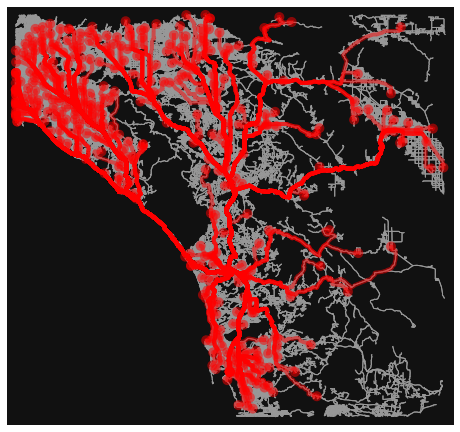

Routes from CSUSM by Travel Time


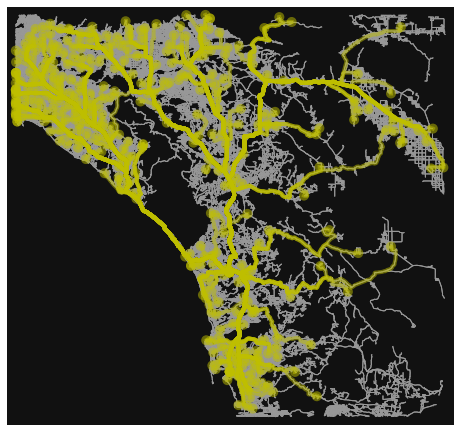

In [ ]:
# Plot the routes to CSUSM from all zip codees
print("Routes to CSUSM by Distance")
fig, ax = ox.plot_graph_routes(G, routes= all_routes_by_dist, route_colors= 'r', route_linewidth=2, node_size=0)

print("Routes to CSUSM by Travel Time")
fig, ax = ox.plot_graph_routes(G, routes= all_routes_by_time, route_colors= 'y', route_linewidth=2, node_size=0)


Calculate overlap and similarity of routes from origin points (postal codes)

In [ ]:
# Check routes' similarity and overlap
# jaccard formula source: https://stackoverflow.com/questions/71635040/get-jaccard-similarity-by-comparing-all-rows-in-a-pandas-dataframe-while-keeping

import itertools
import pandas as pd

# copied from link above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists 
        js(x,y) = (x intersection y)/ (x union y)
        Definition: the size of the intersection of set A and set B (i.e. the number of common elements) 
        over the size of the union of set A and set B (i.e. the number of unique elements).
    """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

def overlap_coeficient(x, y):
    """ returns the overlap coeficient between two lists 
        oc(x,y) = (x intersection y) / min(x, y)
        Definition: defined as the size of the intersection of set A and set B 
        over the size of the smaller set between A and B.
    """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    min_set = min( len(set(x)), len(set(y)) )
    return intersection_cardinality/float(min_set)

In [ ]:
# create list of tuples like [(zip, route), (zip, route)]
zip_routes = list(zip(routes_df["s_time_route"], routes_df["postal_code"]))

result = []

# create list of all possible combinations between sets of (zip, routes) and loop through them
for item in list(itertools.combinations(zip_routes, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    overlap = overlap_coeficient(item[0][0], item[1][0])

    data = {"origin 1": item[0][1], "origin 2": item[1][1], "similarity": similarity, 'overlap': overlap}
    result.append(data)

js_oc_df = pd.DataFrame(result)
js_oc_df

origin 1  origin 2  similarity   overlap
0         92345     90062    0.016949  0.041667
1         92345     91106    0.014675  0.041667
2         92345     90301    0.016055  0.041667
3         92345     90009    0.017115  0.041667
4         92345     91030    0.016393  0.041667
...         ...       ...         ...       ...
75850     92078     92079    0.026316  0.071429
75851     92078     92096    0.026316  0.071429
75852     92069     92079    0.875000  1.000000
75853     92069     92096    0.875000  1.000000
75854     92079     92096    1.000000  1.000000

[75855 rows x 4 columns]

In [ ]:
js_oc_df = js_oc_df.sort_values(by = ['overlap','similarity'], ascending = False)

In [ ]:
js_oc_df = js_oc_df.reset_index(drop=True)
js_oc_df

origin 1  origin 2  similarity   overlap
0         90301     90305    1.000000  1.000000
1         90301     90047    1.000000  1.000000
2         90301     90044    1.000000  1.000000
3         90266     90260    1.000000  1.000000
4         90305     90047    1.000000  1.000000
...         ...       ...         ...       ...
75850     90047     92252    0.012238  0.025455
75851     90044     92252    0.012238  0.025455
75852     91775     92252    0.011885  0.023973
75853     92252     91007    0.011686  0.023179
75854     91106     92252    0.011419  0.023026

[75855 rows x 4 columns]

In [ ]:
js_oc_df.sample()

origin 1  origin 2  similarity   overlap
23574     91730     92376         0.2  0.355422

In [ ]:
# save similarity/overlap of routes from zip code origins into a file
upload_csv_to_gdrive(routes_df,'routes_similarity_overlap.csv')
download_as_csv(routes_df,'routes_similarity_overlap.csv')

Uploaded to Google Drive on 2022-11-14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-14


In [ ]:
# Create clusters of zip code origins with overlap == 1



# Set up Student Preferences

Get students' schedules from file Spring_2022_CA_students

In [ ]:
import pandas as pd

# All CA students with profile info, schedule, and zip code

file_path= '/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/Spring_2022_CA_students.csv'
stud_df = pd.read_csv(file_path) #, index_col='id')
stud_df.head(2)

Unnamed: 0  ID    Zip Gender  Age     Level College     M_arr     M_dep  \
0           0   1  92054      F   39  Graduate  CHABSS  00:00:00  00:00:00   
1           1   2  92078      F   66    Senior   CEHHS  00:00:00  00:00:00   

      T_arr     T_dep     W_arr     W_dep     R_arr     R_dep     F_arr  \
0  17:30:00  20:20:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   
1  00:00:00  00:00:00  00:00:00  00:00:00  14:30:00  17:20:00  09:30:00   

      F_dep     S_arr     S_dep  
0  00:00:00  00:00:00  00:00:00  
1  12:20:00  00:00:00  00:00:00

In [ ]:
print(stud_df.columns)
stud_df.tail(2)

Index(['Unnamed: 0', 'ID', 'Zip', 'Gender', 'Age', 'Level', 'College', 'M_arr',
       'M_dep', 'T_arr', 'T_dep', 'W_arr', 'W_dep', 'R_arr', 'R_dep', 'F_arr',
       'F_dep', 'S_arr', 'S_dep'],
      dtype='object')


Unnamed: 0     ID    Zip Gender  Age     Level     College     M_arr  \
9951       10099  10290  92115      M   24  Freshman  UNDECLARED  00:00:00   
9952       10101  10292  92009      F   17  Freshman  UNDECLARED  17:30:00   

         M_dep     T_arr     T_dep     W_arr     W_dep     R_arr     R_dep  \
9951  00:00:00  10:30:00  11:45:00  00:00:00  00:00:00  10:30:00  11:45:00   
9952  20:20:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   

         F_arr     F_dep     S_arr     S_dep  
9951  00:00:00  00:00:00  00:00:00  00:00:00  
9952  00:00:00  00:00:00  00:00:00  00:00:00

In [ ]:
# Delete column "unnamed" 
stud_df.drop(columns='Unnamed: 0', inplace=True)
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       9953 non-null   int64 
 1   Zip      9953 non-null   int64 
 2   Gender   9953 non-null   object
 3   Age      9953 non-null   int64 
 4   Level    9953 non-null   object
 5   College  9953 non-null   object
 6   M_arr    9953 non-null   object
 7   M_dep    9953 non-null   object
 8   T_arr    9953 non-null   object
 9   T_dep    9953 non-null   object
 10  W_arr    9953 non-null   object
 11  W_dep    9953 non-null   object
 12  R_arr    9953 non-null   object
 13  R_dep    9953 non-null   object
 14  F_arr    9953 non-null   object
 15  F_dep    9953 non-null   object
 16  S_arr    9953 non-null   object
 17  S_dep    9953 non-null   object
dtypes: int64(3), object(15)
memory usage: 1.4+ MB


In [ ]:
print("All %d CA students with %d different zip codes" % 
      (len(stud_df['ID']), stud_df['Zip'].nunique()) )
stud_df.sample(3)

All 9953 CA students with 763 different zip codes


ID    Zip Gender  Age     Level College     M_arr     M_dep     T_arr  \
2077  2136  91739      F   21    Senior  CHABSS  09:30:00  17:15:00  10:00:00   
8882  9106  92563      M   18  Freshman    COBA  09:30:00  11:20:00  10:30:00   
1788  1839  92610      M   22    Senior   CEHHS  17:30:00  20:20:00  07:30:00   

         T_dep     W_arr     W_dep     R_arr     R_dep     F_arr     F_dep  \
2077  11:50:00  09:30:00  17:15:00  10:00:00  11:50:00  00:00:00  00:00:00   
8882  11:45:00  09:30:00  12:20:00  10:30:00  14:15:00  09:30:00  12:20:00   
1788  17:15:00  08:30:00  11:20:00  07:30:00  20:20:00  00:00:00  00:00:00   

         S_arr     S_dep  
2077  00:00:00  00:00:00  
8882  00:00:00  00:00:00  
1788  00:00:00  00:00:00

Create group columns for age range (Under_25), and level (Undergrad)

In [ ]:
age_list = stud_df.Age.unique()
age_list.sort()
age_list

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 74])

In [ ]:
# Create a column for age group Under_25 years old with True or False values

stud_df['Under_25'] = stud_df['Age'] < 25
stud_df.sample(5)

ID    Zip Gender  Age     Level College     M_arr     M_dep     T_arr  \
7325  7523  92127      F   19  Freshman  CHABSS  00:00:00  00:00:00  10:30:00   
7614  7818  92064      M   20  Freshman    COBA  08:30:00  17:20:00  00:00:00   
9494  9724  92083      M   23    Junior  CHABSS  00:00:00  00:00:00  00:00:00   
9600  9834  92081      M   19  Freshman   CEHHS  07:30:00  15:45:00  10:30:00   
7617  7821  92203      F   19  Freshman  CHABSS  09:30:00  16:20:00  13:00:00   

         T_dep     W_arr     W_dep     R_arr     R_dep     F_arr     F_dep  \
7325  14:15:00  00:00:00  00:00:00  10:30:00  14:15:00  00:00:00  00:00:00   
7614  00:00:00  08:30:00  11:20:00  13:00:00  14:15:00  08:30:00  11:20:00   
9494  00:00:00  00:00:00  00:00:00  10:30:00  16:50:00  00:00:00  00:00:00   
9600  11:45:00  07:30:00  15:45:00  10:30:00  11:45:00  07:30:00  08:20:00   
7617  14:15:00  09:30:00  16:20:00  13:00:00  14:15:00  09:30:00  12:20:00   

         S_arr     S_dep  Under_25  
7325  00:00:00  00:00:00      True  
7614  00:00:00  00:00:00      True  
9494  00:00:00  00:00:00      True  
9600  00:00:00  00:00:00      True  
7617  00:00:00  00:00:00      True

In [ ]:
stud_df.Level.unique()

array(['Graduate', 'Senior', 'Post-Bacc', 'Junior', 'Freshman',
       'Sophomore'], dtype=object)

In [ ]:
# Create a column to group undergrad students
undergrad = ['Senior', 'Junior','Sophomore', 'Freshman']
stud_df['Undergrad'] = stud_df['Level'].isin(undergrad)
stud_df.sample(3)

ID    Zip Gender  Age      Level College     M_arr     M_dep  \
8351  8564  92154      M   19   Freshman  CHABSS  16:00:00  17:15:00   
8398  8611  92563      F   21     Junior  CHABSS  11:30:00  14:20:00   
3006  3085  92596      F   21  Sophomore   CSTEM  00:00:00  00:00:00   

         T_arr     T_dep     W_arr     W_dep     R_arr     R_dep     F_arr  \
8351  07:30:00  15:45:00  14:30:00  17:15:00  07:30:00  15:45:00  12:30:00   
8398  10:30:00  17:15:00  00:00:00  00:00:00  13:00:00  17:15:00  00:00:00   
3006  14:30:00  15:45:00  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   

         F_dep     S_arr     S_dep  Under_25  Undergrad  
8351  13:20:00  00:00:00  00:00:00      True       True  
8398  00:00:00  00:00:00  00:00:00      True       True  
3006  00:00:00  00:00:00  00:00:00      True       True

Create Smoker column and Smoker Preference

On a survey at CSUSM campus before turning it into a smoke-free campus, 10% of the campus community used some form of tobacco on the last 30 days. Based on this result, create a column 'Smoker' and randomly select 10% of the students to be smokers, so we can use it when selecting preferences. 

0 False, 1 True

30% of the non-smokers prefer to ride with non-smokers

In [ ]:
stud_df['Smoker'] = False # assign all students as False

# select random 10% of students to be smokers
index_lst = stud_df.sample(frac=0.1, random_state=42).index # use random_state for reproducibility
print('type:', type(index_lst))
print(index_lst)
for i in index_lst:
    stud_df.at[i,'Smoker'] = True

type: <class 'pandas.core.indexes.numeric.Int64Index'>
Int64Index([2935, 9547, 7136, 1253, 3438, 1496,  789, 2020, 8751, 7697,
            ...
            7834, 4149, 9569, 8596, 8197,  592, 7194, 2540, 7183, 1569],
           dtype='int64', length=995)


In [ ]:
stud_df.Smoker.value_counts(normalize=True)

False    0.90003
True     0.09997
Name: Smoker, dtype: float64

In [ ]:
stud_df.sample(10)

ID    Zip Gender  Age      Level College     M_arr     M_dep  \
6803  6992  92782      F   23     Senior  CHABSS  11:30:00  13:20:00   
2962  3040  92056      M   21  Sophomore    COBA  14:30:00  17:15:00   
6711  6895  92122      F   29  Post-Bacc   CEHHS  00:00:00  00:00:00   
4482  4601  92081      F   24     Senior  CHABSS  00:00:00  00:00:00   
9399  9626  92129      F   27     Junior  CHABSS  19:00:00  21:50:00   
4564  4687  92532      F   19  Sophomore  CHABSS  09:30:00  20:15:00   
4826  4955  92069      M   20  Sophomore    COBA  00:00:00  00:00:00   
2064  2123  94513      F   22     Senior   CSTEM  08:30:00  16:50:00   
9324  9551  91701      M   19   Freshman    COBA  09:30:00  18:45:00   
1371  1414  92057      M   24     Junior    COBA  14:30:00  16:20:00   

         T_arr     T_dep  ...     W_dep     R_arr     R_dep     F_arr  \
6803  00:00:00  00:00:00  ...  13:20:00  00:00:00  00:00:00  00:00:00   
2962  00:00:00  00:00:00  ...  17:15:00  00:00:00  00:00:00  07:30:00   
6711  00:00:00  00:00:00  ...  00:00:00  00:00:00  00:00:00  08:00:00   
4482  09:00:00  10:50:00  ...  00:00:00  09:00:00  11:50:00  00:00:00   
9399  00:00:00  00:00:00  ...  00:00:00  00:00:00  00:00:00  00:00:00   
4564  00:00:00  00:00:00  ...  20:15:00  00:00:00  00:00:00  00:00:00   
4826  09:00:00  17:15:00  ...  00:00:00  10:30:00  17:15:00  00:00:00   
2064  08:15:00  15:45:00  ...  18:15:00  13:00:00  15:45:00  08:30:00   
9324  10:30:00  15:45:00  ...  18:45:00  10:30:00  15:45:00  09:30:00   
1371  00:00:00  00:00:00  ...  20:20:00  00:00:00  00:00:00  00:00:00   

         F_dep     S_arr     S_dep Under_25  Undergrad  Smoker  
6803  00:00:00  00:00:00  00:00:00     True       True   False  
2962  10:20:00  00:00:00  00:00:00     True       True   False  
6711  17:20:00  00:00:00  00:00:00    False      False   False  
4482  00:00:00  00:00:00  00:00:00     True       True   False  
9399  00:00:00  00:00:00  00:00:00    False       True   False  
4564  00:00:00  00:00:00  00:00:00     True       True   False  
4826  00:00:00  00:00:00  00:00:00     True       True   False  
2064  09:20:00  00:00:00  00:00:00     True       True   False  
9324  10:20:00  00:00:00  00:00:00     True       True   False  
1371  00:00:00  00:00:00  00:00:00     True       True   False  

[10 rows x 21 columns]

In [ ]:
stud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         9953 non-null   int64 
 1   Zip        9953 non-null   int64 
 2   Gender     9953 non-null   object
 3   Age        9953 non-null   int64 
 4   Level      9953 non-null   object
 5   College    9953 non-null   object
 6   M_arr      9953 non-null   object
 7   M_dep      9953 non-null   object
 8   T_arr      9953 non-null   object
 9   T_dep      9953 non-null   object
 10  W_arr      9953 non-null   object
 11  W_dep      9953 non-null   object
 12  R_arr      9953 non-null   object
 13  R_dep      9953 non-null   object
 14  F_arr      9953 non-null   object
 15  F_dep      9953 non-null   object
 16  S_arr      9953 non-null   object
 17  S_dep      9953 non-null   object
 18  Under_25   9953 non-null   bool  
 19  Undergrad  9953 non-null   bool  
 20  Smoker     9953 non-null   boo

In [ ]:
!pip install pyprobs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyprobs import Probability as pr

def nonsmoker_preference(x):
    ''' Set preference for non-smoker to 30% of the non-smokers '''

    if x == False: # non-smoker
        return bool(pr.prob(30/100))
    else:
        return False
 
stud_df['Pref_NSm'] = stud_df['Smoker'].apply(nonsmoker_preference)

print(stud_df.Pref_NSm.value_counts(normalize=True) )
stud_df.sample(3)

False    0.731438
True     0.268562
Name: Pref_NSm, dtype: float64


ID    Zip Gender  Age     Level College     M_arr     M_dep     T_arr  \
2040  2097  92057      F   21    Senior  CHABSS  11:30:00  14:20:00  10:00:00   
4728  4856  92111      M   19  Freshman   CSTEM  08:30:00  17:15:00  00:00:00   
6612  6785  92870      F   24    Senior   CEHHS  00:00:00  00:00:00  00:00:00   

         T_dep  ...     R_arr     R_dep     F_arr     F_dep     S_arr  \
2040  11:50:00  ...  10:00:00  20:20:00  00:00:00  00:00:00  00:00:00   
4728  00:00:00  ...  00:00:00  00:00:00  08:30:00  12:20:00  00:00:00   
6612  00:00:00  ...  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   

         S_dep Under_25 Undergrad  Smoker  Pref_NSm  
2040  00:00:00     True      True   False      True  
4728  00:00:00     True      True   False     False  
6612  00:00:00     True      True   False     False  

[3 rows x 22 columns]

In [ ]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         9953 non-null   int64 
 1   Zip        9953 non-null   int64 
 2   Gender     9953 non-null   object
 3   Age        9953 non-null   int64 
 4   Level      9953 non-null   object
 5   College    9953 non-null   object
 6   M_arr      9953 non-null   object
 7   M_dep      9953 non-null   object
 8   T_arr      9953 non-null   object
 9   T_dep      9953 non-null   object
 10  W_arr      9953 non-null   object
 11  W_dep      9953 non-null   object
 12  R_arr      9953 non-null   object
 13  R_dep      9953 non-null   object
 14  F_arr      9953 non-null   object
 15  F_dep      9953 non-null   object
 16  S_arr      9953 non-null   object
 17  S_dep      9953 non-null   object
 18  Under_25   9953 non-null   bool  
 19  Undergrad  9953 non-null   bool  
 20  Smoker     9953 non-null   boo

Assign Role and number of seats

Roles:

    P : Passenger   49%
    D : Driver  9%
    E : Either passenger or driver  42%

Available Seats (aplicable only to D and E):

    1: 14%
    2: 11%
    3: 75% 


In [ ]:
from numpy.random import choice as npchoice
from numpy.random import seed

seed(0)

roles = ['P','D','E']
roles_prob = [.49, .09, .42] 
roles_lst = npchoice(roles, size= stud_df.shape[0], p = roles_prob)

stud_df.insert(loc=6, column='Role', value= roles_lst)

print(stud_df.Role.value_counts(normalize=True))
stud_df.sample(3)

P    0.496634
E    0.412438
D    0.090927
Name: Role, dtype: float64


ID    Zip Gender  Age      Level College Role     M_arr     M_dep  \
45      46  92028      F   29  Post-Bacc   CEHHS    E  08:30:00  15:20:00   
9587  9821  92677      M   19   Freshman    COBA    E  09:30:00  10:20:00   
2461  2523  92274      F   22     Junior  CHABSS    E  00:00:00  00:00:00   

         T_arr  ...     R_arr     R_dep     F_arr     F_dep     S_arr  \
45    09:00:00  ...  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   
9587  14:30:00  ...  00:00:00  00:00:00  09:30:00  11:20:00  00:00:00   
2461  16:00:00  ...  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   

         S_dep Under_25 Undergrad Smoker  Pref_NSm  
45    00:00:00    False     False  False     False  
9587  00:00:00     True      True  False      True  
2461  00:00:00     True      True  False      True  

[3 rows x 23 columns]

In [ ]:
def available_seats(x):
    ''' Set number of seats available only for Drive or Either roles 
        1 seat : 14%
        2 seats: 11%
        3 seats: 75% 
    '''
    seats_lst = (1, 2, 3)
    prob = [.14, .11, .75]
    if x == 'P': # passenger
        return 0
    else:
        return int(npchoice(seats_lst, size= 1, p = prob))
 
stud_df['Seats'] = stud_df['Role'].apply(available_seats)

print(stud_df.Seats.value_counts(normalize=True) )

# See results only for D and E
print( stud_df.groupby("Role")["Seats"].value_counts(normalize=True) )


0    0.496634
3    0.377675
1    0.070431
2    0.055260
Name: Seats, dtype: float64
Role  Seats
D     3        0.752486
      1        0.133702
      2        0.113812
E     3        0.749817
      1        0.141291
      2        0.108892
P     0        1.000000
Name: Seats, dtype: float64


Create preferences for same gender, same status, and same age group
   

In [ ]:
def gender_preference(x):
    ''' Set preference for same gender to 12% of the non-male students '''

    choices_lst = (True, False)
    if x == 'M': # male gender do not have same gender preference
        return False
    else:
        return bool(pr.prob(12/100))
 
stud_df['Pref_Gender'] = stud_df['Gender'].apply(gender_preference)

print(stud_df.Pref_Gender.value_counts(normalize=True) )
stud_df.sample(3)

False    0.926454
True     0.073546
Name: Pref_Gender, dtype: float64


ID    Zip Gender  Age   Level College Role     M_arr     M_dep  \
154    157  92083      F   28  Junior   CSTEM    P  14:30:00  18:45:00   
1446  1493  92130      M   22  Senior   CSTEM    E  00:00:00  00:00:00   
6895  7087  92069      M   22  Junior  CHABSS    E  09:30:00  15:45:00   

         T_arr  ...     F_arr     F_dep     S_arr     S_dep Under_25  \
154   14:30:00  ...  00:00:00  00:00:00  00:00:00  00:00:00    False   
1446  00:00:00  ...  00:00:00  00:00:00  00:00:00  00:00:00     True   
6895  10:30:00  ...  09:30:00  10:20:00  00:00:00  00:00:00     True   

     Undergrad Smoker Pref_NSm Seats  Pref_Gender  
154       True  False    False     0        False  
1446      True   True    False     1        False  
6895      True  False     True     1        False  

[3 rows x 25 columns]

In [ ]:
print( stud_df.groupby("Gender")["Pref_Gender"].count() )
print( stud_df.groupby("Gender")["Pref_Gender"].value_counts(normalize=True) )

Gender
F    5898
M    4046
N       9
Name: Pref_Gender, dtype: int64
Gender  Pref_Gender
F       False          0.87589
        True           0.12411
M       False          1.00000
N       False          1.00000
Name: Pref_Gender, dtype: float64


In [ ]:
# Assign same status and same age preferences for 25% of all students

pref = [True, False]
prob = [.25, .75] 
lst_age = npchoice(pref, size= stud_df.shape[0], p = prob)
lst_status = npchoice(pref, size= stud_df.shape[0], p = prob)

#stud_df.insert(loc=6, column='Pref_Age', value= lst_age)
#stud_df.insert(loc=6, column='Pref_Status', value= lst_status)

stud_df['Pref_Age'] = lst_age
stud_df['Pref_Status'] = lst_status

print('Same age preference:\n', stud_df.Pref_Age.value_counts(normalize=True) )
print('\nSame status preference:\n', stud_df.Pref_Status.value_counts(normalize=True))
stud_df.sample(3)


In [ ]:
# How many students do not have any preferences

bool_pref = ((stud_df['Pref_NSm'] == False) & (stud_df['Pref_Age'] == False) & (stud_df['Pref_Gender'] == False) & (stud_df['Pref_Status'] == False))

#print(bool_pref)
print("Students with no preferences: %.2f%%" % ((bool_pref.sum()/len(bool_pref))*100))
print(bool_pref.value_counts(normalize=True))


Students with no preferences: 37.77%
False    0.622325
True     0.377675
dtype: float64


In [ ]:
# drop age and level
stud_df.drop(columns=['Level', 'Age'], inplace=True)
stud_df.columns

Index(['ID', 'Zip', 'Gender', 'College', 'Role', 'M_arr', 'M_dep', 'T_arr',
       'T_dep', 'W_arr', 'W_dep', 'R_arr', 'R_dep', 'F_arr', 'F_dep', 'S_arr',
       'S_dep', 'Under_25', 'Undergrad', 'Smoker', 'Pref_NSm', 'Seats',
       'Pref_Gender', 'Pref_Age', 'Pref_Status'],
      dtype='object')

In [ ]:
# Rearrange columns 
stud_df = stud_df[['ID', 'Zip', 'Role', 'Seats', 'Gender','Under_25', 'Undergrad', 'Smoker', 'College', 
                   'Pref_Gender','Pref_Age', 'Pref_Status','Pref_NSm', 
                   'M_arr', 'M_dep', 'T_arr','T_dep', 'W_arr', 'W_dep', 
                   'R_arr', 'R_dep', 'F_arr', 'F_dep', 'S_arr','S_dep']]

stud_df.columns

Index(['ID', 'Zip', 'Role', 'Seats', 'Gender', 'Under_25', 'Undergrad',
       'Smoker', 'College', 'Pref_Gender', 'Pref_Age', 'Pref_Status',
       'Pref_NSm', 'M_arr', 'M_dep', 'T_arr', 'T_dep', 'W_arr', 'W_dep',
       'R_arr', 'R_dep', 'F_arr', 'F_dep', 'S_arr', 'S_dep'],
      dtype='object')

In [ ]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9953 non-null   int64 
 1   Zip          9953 non-null   int64 
 2   Role         9953 non-null   object
 3   Seats        9953 non-null   int64 
 4   Gender       9953 non-null   object
 5   Under_25     9953 non-null   bool  
 6   Undergrad    9953 non-null   bool  
 7   Smoker       9953 non-null   bool  
 8   College      9953 non-null   object
 9   Pref_Gender  9953 non-null   bool  
 10  Pref_Age     9953 non-null   bool  
 11  Pref_Status  9953 non-null   bool  
 12  Pref_NSm     9953 non-null   bool  
 13  M_arr        9953 non-null   object
 14  M_dep        9953 non-null   object
 15  T_arr        9953 non-null   object
 16  T_dep        9953 non-null   object
 17  W_arr        9953 non-null   object
 18  W_dep        9953 non-null   object
 19  R_arr        9953 non-null 

In [ ]:
stud_df.sample(3)

ID    Zip Role  Seats Gender  Under_25  Undergrad  Smoker College  \
266    275  92083    P      0      F     False       True   False  CHABSS   
3091  3171  92007    E      2      F      True       True   False   CEHHS   
3373  3463  92563    P      0      F      True       True   False   CSTEM   

      Pref_Gender  ...     T_arr     T_dep     W_arr     W_dep     R_arr  \
266          True  ...  14:30:00  15:45:00  00:00:00  00:00:00  14:30:00   
3091        False  ...  00:00:00  00:00:00  00:00:00  00:00:00  09:00:00   
3373        False  ...  00:00:00  00:00:00  08:30:00  12:20:00  00:00:00   

         R_dep     F_arr     F_dep     S_arr     S_dep  
266   18:45:00  00:00:00  00:00:00  00:00:00  00:00:00  
3091  17:20:00  12:30:00  15:20:00  00:00:00  00:00:00  
3373  00:00:00  08:30:00  12:20:00  00:00:00  00:00:00  

[3 rows x 25 columns]

In [ ]:
# Save stud_df as csv file 
import datetime # to print timestamp

file_name = 'Spring_2022_CA_students_pref.csv'

upload_csv_to_gdrive(stud_df, file_name)
download_as_csv(stud_df, file_name)

print(datetime.date.today())

Uploaded to Google Drive on 2022-11-14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-14
2022-11-14


### Helper functions to check schedule constraint

In [ ]:
def check_schedule(stud_A, stud_B):
    ''' Check if arrival and departure time for all days of the week
    are the same. 
    Return: true or false '''

    if stud_A.M_arr == stud_B.M_arr and stud_A.M_dep == stud_B.M_dep :
        if stud_A.T_arr == stud_B.T_arr and stud_A.T_dep == stud_B.T_dep :
            if stud_A.W.arr == stud_B.W_arr and stud_A.W_dep == stud_B.W_dep :
                if stud_A.R.arr == stud_B.R_arr and stud_A.R_dep == stud_B.R_dep :
                    if stud_A.F_arr == stud_B.F_arr and stud_A.F_dep == stud_B.F_dep :
                        if stud_A.S_arr == stud_B.S_arr and stud_A.S_dep == stud_B.S_d :
                            return True
    else : 
        return False

In [ ]:
def check_schedule_MWF(stud_A, stud_B):
    ''' Check if arrival and departure time for Mondays, Wednesdays, and Fridays
    are the same. 
    Return: true or false '''

    if (stud_A.M_arr == stud_B.M_arr and stud_A.M_dep == stud_B.M_dep ) :
        if (stud_A.W.arr == stud_B.W_arr and stud_A.W_dep == stud_B.W_dep ) :
            if (stud_A.F_arr == stud_B.F_arr and stud_A.F_dep == stud_B.F_dep ) :
                return True
    else : 
        return False

In [ ]:
def check_schedule_TR (stud_A, stud_B):
    ''' Check if arrival and departure time for Tuesdays and Thursdays
    are the same. 
    Return: true or false '''

    if (stud_A.T_arr == stud_B.T_arr and stud_A.T_dep == stud_B.T_dep ) :
        if (stud_A.R.arr == stud_B.R_arr and stud_A.R_dep == stud_B.R_dep ) :
            return True
    else : 
        return False

In [ ]:
def check_schedule_S (stud_A, stud_B):
    ''' Check if arrival and departure time for Tuesdays and Thursdays
    are the same. 
    Return: true or false '''

    if (stud_A.S_arr == stud_B.S_arr and stud_A.S_dep == stud_B.S_dep ) :
        return True
    else : 
        return False

### Helper fucntions to check compatibility

In [ ]:
def check_same_gender (stud_A, stud_B):
    ''' Check if student A and student B are of the same gender. 
    Return: true or false '''

    if (stud_A.Gender == stud_B.Gender) :
        return True
    else : 
        return False

In [ ]:
def check_same_college (stud_A, stud_B):
    ''' Check if student A and student B are of the same college. 
    Return: true or false '''

    if (stud_A.College == stud_B.College) :
        return True
    else : 
        return False

In [ ]:
def check_same_age_group(stud_A, stud_B):
    ''' Check if student A and student B are of the same age group. 
    Return: true or false '''

    if (stud_A.Under_25 == stud_B.Under_25) :
        return True
    else : 
        return False

In [ ]:
def check_same_level (stud_A, stud_B) :
    ''' Check if student A and student B are of the same level.
    Undergrad == True if ['Senior', 'Junior','Sophomore','Freshman']
    Undergrad == False if ['Graduate', 'Post-Bacc']
    Return: true or false '''

    if (stud_A.Undergrad == stud_B.Undergrad) :
        return True
    else : 
        return False   

In [ ]:
def check_smoker (stud_A, stud_B):
    ''' Check if student A and student B are of both smokers or both non_smokers. 
    Return: true or false '''

    if stud_A.Smoker == stud_B.Smoker :
        return True
    else : 
        return False

In [ ]:
def comp_score(stud_A, stud_B, factor):
    ''' Compute the compatibility score between two ride-mates
    Parameters: stud_A and stud_B = potential ride-mates, 
                factor = weight for preferences
        Base value:    0     for features with differentt characteristics but not choosen as preference
                       1     for feature with same characteristic, 
                      -1     for feature with different characteristics choosen as preference
        Factor:        1     for no preference
                   'factor'  weight for selected feature preference   
    Return score: the sum of the base value of each feature multiplied by students' preference factor 
    '''

    # factor must be between 2 and 5
    if factor <= 1: factor = 2     # Score range = [-17, 17]
    if factor > 5: factor = 5      # Score range = [-101, 101]
    
    # Default base values, assume no characteristic match
    base_age = base_gender = base_level = base_smoker = base_college = 0
    # Default factor values, assume student A has no preferences
    factor_age_A = factor_gender_A = factor_level_A = factor_nonsmoker_A = 1
    # Default factor values, assume student B has no preferences
    factor_age_B = factor_gender_B = factor_level_B = factor_nonsmoker_B = 1
    
    # Update factor value for stud_A preferences
    if (stud_A.Pref_Age)    :  factor_age_A = factor
    if (stud_A.Pref_Gender) :  factor_gender_A = factor
    if (stud_A.Pref_Status) :  factor_level_A = factor
    if (stud_A.Pref_NSm)    :  factor_nonsmoker_A = factor

    # Update factor value for stud_B preferences
    if (stud_B.Pref_Age)    : factor_age_B = factor
    if (stud_B.Pref_Gender) : factor_gender_B = factor
    if (stud_B.Pref_Status) : factor_level_B = factor
    if (stud_B.Pref_NSm)    : factor_nonsmoker_B = factor

    # Update base value for 1 when feature matches or -1 when different if pref is selected by any stud
    if (check_same_age_group(stud_A, stud_B)) : 
        # same age group
        base_age = 1
    else: 
        # not the same age group
        if (stud_A.Pref_Age) or (stud_B.Pref_Age) : 
            # stud selects this feature as preference
            base_age = -1
    if (check_same_gender(stud_A, stud_B)) : 
        base_gender = 1
    else:
        if (stud_A.Pref_Gender) or (stud_B.Pref_Gender):
            base_age = -1
    if (check_same_level(stud_A, stud_B)) :  
        base_level = 1 
    else:
        if (stud_A.Pref_Status) or (stud_B.Pref_Status):
            base_age = -1
    if (check_smoker(stud_A, stud_B)) : 
        base_smoker = 1
    else: 
        if (stud_A.Pref_NSm) or (stud_B.Pref_NSm):
            base_age = -1
    if (check_same_college(stud_A, stud_B)) :  base_college = 1

    # Compute weighted values
    w_age = (factor_age_A * factor_age_B * base_age)
    w_gender = (factor_gender_A * factor_gender_B *base_gender)
    w_status = (factor_level_A * factor_level_B * base_level)
    w_NSmoker= (factor_nonsmoker_A * factor_nonsmoker_B * base_smoker)

    # final score = sum(weighted values) + base_college
    final_score = w_age + w_gender + w_status + w_NSmoker + base_college
   
    # (command + /) to comment blocs of lines
    # print("(factor_age_A:", factor_age_A ,
    #       "* factor_age_B:", factor_age_B  ,
    #       "* base_age:", base_age, ") = ", w_age,
    #       "\n+ (factor_gender_A:", factor_gender_A ,
    #       "* factor_gender_B:", factor_gender_B  ,
    #       "* base_gender:", base_gender, ") = ", w_gender, 
    #       "\n+ (factor_level_A:", factor_level_A ,
    #       "* factor_level_B:", factor_level_B  ,
    #       "* base_level:", base_level, ") = ", w_status, 
    #       "\n+ (factor_nonsmoker_A:", factor_nonsmoker_A ,
    #       "* factor_nonsmoker_B:", factor_nonsmoker_B  ,
    #       "* base_smoker:", base_smoker, ") = ", w_NSmoker,
    #       "\n+ base_college:", base_college
    #     )
    
    return final_score


### Compute compatibility score

Get students with preferences from file 'Spring_2022_CA_students_pref.csv'

In [ ]:
import pandas as pd

# All CA students with profile info, schedule, and zip code

path= '/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/'
file_name = 'Spring_2022_CA_students_pref.csv'
file_path = path + file_name

stud_df = pd.read_csv(file_path) #, index_col='id')
stud_df.sample(3)

Unnamed: 0    ID    Zip Role  Seats Gender  Under_25  Undergrad  Smoker  \
7348        7348  7546  92883    P      0      F      True       True   False   
689          689   714  92595    P      0      F      True       True   False   
4514        4514  4635  92592    P      0      M      True       True   False   

     College  ...     T_arr     T_dep     W_arr     W_dep     R_arr     R_dep  \
7348  CHABSS  ...  00:00:00  00:00:00  14:30:00  15:45:00  19:00:00  21:50:00   
689   CHABSS  ...  13:00:00  15:50:00  00:00:00  00:00:00  13:00:00  14:50:00   
4514    COBA  ...  10:30:00  14:15:00  00:00:00  00:00:00  10:30:00  14:15:00   

         F_arr     F_dep     S_arr     S_dep  
7348  00:00:00  00:00:00  00:00:00  00:00:00  
689   00:00:00  00:00:00  00:00:00  00:00:00  
4514  00:00:00  00:00:00  00:00:00  00:00:00  

[3 rows x 26 columns]

In [ ]:
stud_df.drop(columns='Unnamed: 0', inplace=True)
stud_df.sample(3)

ID    Zip Role  Seats Gender  Under_25  Undergrad  Smoker College  \
4805  4933  92129    P      0      F      True       True   False  CHABSS   
2509  2571  92563    E      1      F      True       True   False  CHABSS   
8738  8962  91977    E      3      F      True       True   False  CHABSS   

      Pref_Gender  ...     T_arr     T_dep     W_arr     W_dep     R_arr  \
4805        False  ...  00:00:00  00:00:00  08:30:00  20:20:00  00:00:00   
2509         True  ...  00:00:00  00:00:00  11:30:00  15:45:00  00:00:00   
8738         True  ...  07:30:00  13:50:00  07:30:00  09:20:00  10:30:00   

         R_dep     F_arr     F_dep     S_arr     S_dep  
4805  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00  
2509  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00  
8738  11:45:00  07:30:00  08:20:00  00:00:00  00:00:00  

[3 rows x 25 columns]

Testing compatibility score

In [ ]:
stud_df.columns

Index(['ID', 'Zip', 'Role', 'Seats', 'Gender', 'Under_25', 'Undergrad',
       'Smoker', 'College', 'Pref_Gender', 'Pref_Age', 'Pref_Status',
       'Pref_NSm', 'M_arr', 'M_dep', 'T_arr', 'T_dep', 'W_arr', 'W_dep',
       'R_arr', 'R_dep', 'F_arr', 'F_dep', 'S_arr', 'S_dep'],
      dtype='object')

In [ ]:
from prettytable import PrettyTable


def print_compatibility_table(stud_A, stud_B): 
    ''' Print a Pretty Table with features and preferences of both students'''
    
    x = PrettyTable()

    x.field_names = ["Feature", "A", "A Pref", "B", "B Pref"]
    x.add_row([ 'Age', stud_A['Under_25'], stud_A['Pref_Age'],stud_B['Under_25'], stud_B['Pref_Age'] ])
    x.add_row([ 'Gender', stud_A['Gender'], stud_A['Pref_Gender'],stud_B['Gender'], stud_B['Pref_Gender'] ])
    x.add_row([ 'Status', stud_A['Undergrad'], stud_A['Pref_Status'],stud_B['Undergrad'], stud_B['Pref_Status'] ])
    x.add_row([ 'Smoker', stud_A['Smoker'], stud_A['Pref_NSm'],stud_B['Smoker'], stud_B['Pref_NSm'] ])
    x.add_row([ 'College', stud_A['College'], 'N/A',stud_B['College'], 'N/A' ])

    print("Compatibility Student",stud_A['ID'], ' vs Student',stud_B['ID'] )
    print(x)


In [ ]:
stud_A =  stud_df.iloc[3013]
stud_B = stud_df.iloc[4544]

print_compatibility_table(stud_A, stud_B)
print("Score (factor= 2): ", comp_score( stud_A, stud_B, 2 ) )
#print()
print("Score (factor= 5): ", comp_score( stud_A, stud_B, 5 ) )

Compatibility Student 3092  vs Student 4666
+---------+-------+--------+--------+--------+
| Feature |   A   | A Pref |   B    | B Pref |
+---------+-------+--------+--------+--------+
|   Age   |  True |  True  |  True  | False  |
|  Gender |   M   | False  |   F    | False  |
|  Status |  True | False  |  True  | False  |
|  Smoker | False |  True  | False  | False  |
| College | CSTEM |  N/A   | CHABSS |  N/A   |
+---------+-------+--------+--------+--------+
Score (factor= 2):  5
Score (factor= 5):  11


In [ ]:
# select random .1% of students 
index_lstA = stud_df.sample(frac=0.001).index
index_lstB = stud_df.sample(frac=0.001).index


In [ ]:
# Iterate over the lstA and lstB in parallel
for a, b in zip(index_lstA, index_lstB):
    stud_A = stud_df.iloc[a]
    stud_B = stud_df.iloc[b]

    print()
    print_compatibility_table(stud_A, stud_B)
    print("Score (factor=2): ", comp_score( stud_A, stud_B , 2) )
    #print()
    print("Score (factor=5): ", comp_score( stud_A, stud_B, 5 ) )  


Compatibility Student 8256  vs Student 8708
+---------+-------+--------+-------+--------+
| Feature |   A   | A Pref |   B   | B Pref |
+---------+-------+--------+-------+--------+
|   Age   |  True | False  |  True |  True  |
|  Gender |   M   | False  |   M   | False  |
|  Status |  True |  True  |  True |  True  |
|  Smoker | False | False  | False | False  |
| College | CSTEM |  N/A   | CSTEM |  N/A   |
+---------+-------+--------+-------+--------+
Score (factor=2):  9
Score (factor=5):  33

Compatibility Student 346  vs Student 1769
+---------+--------+--------+--------+--------+
| Feature |   A    | A Pref |   B    | B Pref |
+---------+--------+--------+--------+--------+
|   Age   | False  |  True  | False  | False  |
|  Gender |   F    | False  |   M    | False  |
|  Status |  True  | False  |  True  |  True  |
|  Smoker |  True  | False  | False  | False  |
| College | CHABSS |  N/A   | CHABSS |  N/A   |
+---------+--------+--------+--------+--------+
Score (factor=2):  5
S

# Separate students in training and testing sets

In [ ]:
import pandas as pd

# All CA students with profile info, schedule, and zip code
path= '/content/drive/MyDrive/Colab_Notebooks/Rideshare/data/'
file_name = 'Spring_2022_CA_students_pref.csv'
file_path = path + file_name

stud_df = pd.read_csv(file_path) #, index_col='id')
stud_df.columns

Index(['Unnamed: 0', 'ID', 'Zip', 'Role', 'Seats', 'Gender', 'Under_25',
       'Undergrad', 'Smoker', 'College', 'Pref_Gender', 'Pref_Age',
       'Pref_Status', 'Pref_NSm', 'M_arr', 'M_dep', 'T_arr', 'T_dep', 'W_arr',
       'W_dep', 'R_arr', 'R_dep', 'F_arr', 'F_dep', 'S_arr', 'S_dep'],
      dtype='object')

In [ ]:
stud_df.drop(columns='Unnamed: 0', inplace=True)
stud_df.sample(3)

ID    Zip Role  Seats Gender  Under_25  Undergrad  Smoker College  \
2576  2639  92571    D      1      M      True       True   False  CHABSS   
9528  9759  92056    E      3      F      True       True   False  CHABSS   
1667  1718  92251    E      1      F      True       True   False    COBA   

      Pref_Gender  ...     T_arr     T_dep     W_arr     W_dep     R_arr  \
2576        False  ...  09:00:00  20:20:00  00:00:00  00:00:00  09:00:00   
9528         True  ...  16:00:00  17:15:00  08:30:00  11:20:00  16:00:00   
1667        False  ...  14:30:00  15:45:00  07:30:00  13:20:00  14:30:00   

         R_dep     F_arr     F_dep     S_arr     S_dep  
2576  14:15:00  00:00:00  00:00:00  00:00:00  00:00:00  
9528  18:45:00  00:00:00  00:00:00  00:00:00  00:00:00  
1667  15:45:00  00:00:00  00:00:00  00:00:00  00:00:00  

[3 rows x 25 columns]

In [ ]:
stud_df.shape

(9953, 25)

In [ ]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9953 non-null   int64 
 1   Zip          9953 non-null   int64 
 2   Role         9953 non-null   object
 3   Seats        9953 non-null   int64 
 4   Gender       9953 non-null   object
 5   Under_25     9953 non-null   bool  
 6   Undergrad    9953 non-null   bool  
 7   Smoker       9953 non-null   bool  
 8   College      9953 non-null   object
 9   Pref_Gender  9953 non-null   bool  
 10  Pref_Age     9953 non-null   bool  
 11  Pref_Status  9953 non-null   bool  
 12  Pref_NSm     9953 non-null   bool  
 13  M_arr        9953 non-null   object
 14  M_dep        9953 non-null   object
 15  T_arr        9953 non-null   object
 16  T_dep        9953 non-null   object
 17  W_arr        9953 non-null   object
 18  W_dep        9953 non-null   object
 19  R_arr        9953 non-null 

In [ ]:
# Change all bool values of True and False to 1 and 0
stud_df = stud_df.astype({'Under_25': int, 'Undergrad': int, 'Smoker': int, 'Pref_Gender': int,'Pref_Age': int,'Pref_Status': int,'Pref_NSm': int })
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9953 non-null   int64 
 1   Zip          9953 non-null   int64 
 2   Role         9953 non-null   object
 3   Seats        9953 non-null   int64 
 4   Gender       9953 non-null   object
 5   Under_25     9953 non-null   int64 
 6   Undergrad    9953 non-null   int64 
 7   Smoker       9953 non-null   int64 
 8   College      9953 non-null   object
 9   Pref_Gender  9953 non-null   int64 
 10  Pref_Age     9953 non-null   int64 
 11  Pref_Status  9953 non-null   int64 
 12  Pref_NSm     9953 non-null   int64 
 13  M_arr        9953 non-null   object
 14  M_dep        9953 non-null   object
 15  T_arr        9953 non-null   object
 16  T_dep        9953 non-null   object
 17  W_arr        9953 non-null   object
 18  W_dep        9953 non-null   object
 19  R_arr        9953 non-null 

In [ ]:
stud_df.sample(3)

ID    Zip Role  Seats Gender  Under_25  Undergrad  Smoker College  \
9537  9768  92119    E      1      F         0          0       0   CEHHS   
2012  2069  92019    P      0      F         0          1       1   CSTEM   
6194  6341  92113    E      1      M         0          1       0  CHABSS   

      Pref_Gender  ...     T_arr     T_dep     W_arr     W_dep     R_arr  \
9537            0  ...  00:00:00  00:00:00  00:00:00  00:00:00  13:00:00   
2012            0  ...  00:00:00  00:00:00  14:30:00  15:45:00  08:30:00   
6194            0  ...  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00   

         R_dep     F_arr     F_dep     S_arr     S_dep  
9537  15:50:00  08:30:00  11:20:00  00:00:00  00:00:00  
2012  12:20:00  00:00:00  00:00:00  00:00:00  00:00:00  
6194  00:00:00  00:00:00  00:00:00  00:00:00  00:00:00  

[3 rows x 25 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# split the students dataset into 70% as train and 30% as test datasets
train, test = train_test_split(stud_df, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
train.shape

(6967, 25)

In [ ]:
test.shape

(2986, 25)

In [ ]:
# save train dataset into file
download_as_csv(train, 'train_dataset.csv')
upload_csv_to_gdrive(train, 'train_dataset.csv')

# save test dataset into file
download_as_csv(test, 'test_dataset.csv')
upload_csv_to_gdrive(test, 'test_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-16
Uploaded to Google Drive on 2022-11-16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded on 2022-11-16
Uploaded to Google Drive on 2022-11-16
